# Kurs Data Science - projekt końcowy Lending Club

Lending Club to firma pożyczkowa typu peer-to-peer, która łączy pożyczkobiorców z inwestorami za pośrednictwem platformy internetowej. Obsługuje osoby, które potrzebują pożyczek osobistych w wysokości od 1000 do 40 000 USD. Pożyczkobiorcy otrzymują pełną kwotę udzielonej pożyczki pomniejszoną o opłatę początkową, która jest uiszczana firmie. Inwestorzy kupują weksle zabezpieczone osobistymi pożyczkami i płacą Lending Club opłatę za usługę.

Na potrzeby tego projektu zostały użyte dane dotyczące pożyczek udzielonych za pośrednictwem Lending Club na przestrzeni lat 2007 -2011. Każda pożyczka jest opatrzona informacją o tym, czy ostatecznie została spłacona (Fully Paid lub Charged off w kolumnie loan_status). Dane zawierają również informacje o płatnościach, dochodzie, jak również o wynikach kredytowych, powodzie pożyczki, adresie z kodem pocztowym. Zbór danych zawiera 151 kolumn z informacjami reprezentującymi indywidualne rachunki kredytowe. Każdy rekord określony jest unikalnym numerem id.

Celem projektu jest zbudowanie modelu klasyfikacyjnego, który na podstawie tych danych będzie przewidywał z określoną dokładnością, czy potencjalny pożyczkobiorca spłaci swój dług z tytułu zaciągniętej pozyczki. 

# Część 1 - Data Processing

Przetwarzanie danych to zadanie polegające na przekształceniu danych ze zbioru w znacznie bardziej użyteczną i pożądaną formę, tj. nadanie jej znaczenia i informacji. Wykonam je w kilku nastęujących krokach.

**Import potrzebnych bibliotek**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

**Ładowanie danych**

In [2]:
#wczytuję plik z danymi
ds = pd.read_csv('Loan_data.csv', delimiter="," )

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#wyświetlam 5 pierwszych rekordów z tabeli
ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#sprawdzam kształt tabeli (ilość wierszy i kolumn)
ds.shape

(42536, 151)

In [5]:
#usuwam spację tzn leading spaces w nazwach kolumn
ds.columns = ds.columns.str.strip()

In [6]:
#sprawdzam kolumny obiektu DataFrame
ds.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [7]:
#sprawdzam zajętość obiektu DataFrame
ds.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [8]:
#zliczam wartości dla targetu
ds['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [9]:
#sprawdzam rozkład targetu procentowo
ds['loan_status'].value_counts()/np.float(len(ds))

Fully Paid                                             0.802050
Charged Off                                            0.133299
Does not meet the credit policy. Status:Fully Paid     0.046737
Does not meet the credit policy. Status:Charged Off    0.017891
Name: loan_status, dtype: float64

**Czyszczenie danych**

In [10]:
#zliczam ilość i wartość procentową pustych wartości
ds_emp = pd.DataFrame({'Percent': 100*ds.isnull().sum()/len(ds), 'Count': ds.isnull().sum()})

#wyświetlam kolumny gdzie ilość null >0 i prezentuję w ramce danych
ds_emp[ds_emp['Count'] > 0]

,Percent,Count
member_id,100.000000,42536
loan_amnt,0.002351,1
funded_amnt,0.002351,1
funded_amnt_inv,0.002351,1
term,0.002351,1
...,...,...
settlement_status,99.623848,42376
settlement_date,99.623848,42376
settlement_amount,99.623848,42376
settlement_percentage,99.623848,42376


W zbiorze danych znajduje się wiele kolumn które nie zawierają wartości. W powyższej ramce danych wyświetlam nazwę każdej kolumny z reprezentatywną wartością, która określa procent brakujących wartości w tej konkretnej kolumnie. 100% oznacza, że ta kolumna nie zawiera żadnych wartości. 0% oznacza, że w kolumnie nie brakuje żadnych wartości. Chcę utworzyć nową ramkę danych, która zawiera tylko kolumny z zachowaniem wartości co najmniej 75%.

In [11]:
df = ds.dropna(axis=1, thresh=int(0.75*len(ds)))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [12]:
df.shape

(42536, 59)

In [13]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42536 non-null  object 
 1   loan_amnt                   42535 non-null  float64
 2   funded_amnt                 42535 non-null  float64
 3   funded_amnt_inv             42535 non-null  float64
 4   term                        42535 non-null  object 
 5   int_rate                    42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   grade                       42535 non-null  object 
 8   sub_grade                   42535 non-null  object 
 9   emp_title                   39909 non-null  object 
 10  emp_length                  41423 non-null  object 
 11  home_ownership              42535 non-null  object 
 12  annual_inc                  42531 non-null  float64
 13  verification_status         425

In [15]:
# pobieram puste wartości dla każdej kolumny
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

id : 0
loan_amnt : 1
funded_amnt : 1
funded_amnt_inv : 1
term : 1
int_rate : 1
installment : 1
grade : 1
sub_grade : 1
emp_title : 2627
emp_length : 1113
home_ownership : 1
annual_inc : 5
verification_status : 1
issue_d : 1
loan_status : 1
pymnt_plan : 1
url : 1
purpose : 1
title : 14
zip_code : 1
addr_state : 1
dti : 1
delinq_2yrs : 30
earliest_cr_line : 30
fico_range_low : 1
fico_range_high : 1
inq_last_6mths : 30
open_acc : 30
pub_rec : 30
revol_bal : 1
revol_util : 91
total_acc : 30
initial_list_status : 1
out_prncp : 1
out_prncp_inv : 1
total_pymnt : 1
total_pymnt_inv : 1
total_rec_prncp : 1
total_rec_int : 1
total_rec_late_fee : 1
recoveries : 1
collection_recovery_fee : 1
last_pymnt_d : 84
last_pymnt_amnt : 1
last_credit_pull_d : 5
last_fico_range_high : 1
last_fico_range_low : 1
collections_12_mths_ex_med : 146
policy_code : 1
application_type : 1
acc_now_delinq : 30
chargeoff_within_12_mths : 146
delinq_amnt : 30
pub_rec_bankruptcies : 1366
tax_liens : 106
hardship_flag : 1
di

**Zrozumienie danych**

Wczytuję plik 'LCDataDictionary' by zrozumieć opis kolumn zawartych w mojej tabeli

In [16]:
ds_description = pd.read_csv('LCDataDictionary.csv', delimiter="," )
ds_description = ds_description.dropna(axis=1)
ds_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


**Przygotowuję tabelę do dalszej eksploracji**

In [17]:
#tworzę ramkę danych zawierającą kolumny do prognozowania
df = df.filter(['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'installment', 'int_rate', 'issue_d', 'last_fico_range_high', 'last_fico_range_low', 'loan_amnt', 'open_acc', 'purpose', 'pymnt_plan', 'revol_bal','revol_util','inq_last_6mths','sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'hardship_flag', 'disbursement_method', 'delinq_2yrs', 'loan_status'])
df.dtypes

addr_state               object
annual_inc              float64
dti                     float64
earliest_cr_line         object
emp_length               object
fico_range_high         float64
fico_range_low          float64
funded_amnt             float64
funded_amnt_inv         float64
grade                    object
home_ownership           object
installment             float64
int_rate                 object
issue_d                  object
last_fico_range_high    float64
last_fico_range_low     float64
loan_amnt               float64
open_acc                float64
purpose                  object
pymnt_plan               object
revol_bal               float64
revol_util               object
inq_last_6mths          float64
sub_grade                object
term                     object
title                    object
total_acc               float64
verification_status      object
hardship_flag            object
disbursement_method      object
delinq_2yrs             float64
loan_sta

In [18]:
df.head()

,addr_state,annual_inc,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,...,inq_last_6mths,sub_grade,term,title,total_acc,verification_status,hardship_flag,disbursement_method,delinq_2yrs,loan_status
0,AZ,24000.0,27.65,Jan-1985,10+ years,739.0,735.0,5000.0,4975.0,B,...,1.0,B2,36 months,Computer,9.0,Verified,N,Cash,0.0,Fully Paid
1,GA,30000.0,1.00,Apr-1999,< 1 year,744.0,740.0,2500.0,2500.0,C,...,5.0,C4,60 months,bike,4.0,Source Verified,N,Cash,0.0,Charged Off
2,IL,12252.0,8.72,Nov-2001,10+ years,739.0,735.0,2400.0,2400.0,C,...,2.0,C5,36 months,real estate business,10.0,Not Verified,N,Cash,0.0,Fully Paid
3,CA,49200.0,20.00,Feb-1996,10+ years,694.0,690.0,10000.0,10000.0,C,...,1.0,C1,36 months,personel,37.0,Source Verified,N,Cash,0.0,Fully Paid
4,OR,80000.0,17.94,Jan-1996,1 year,699.0,695.0,3000.0,3000.0,B,...,0.0,B5,60 months,Personal,38.0,Source Verified,N,Cash,0.0,Fully Paid


In [19]:
#by ujednolicić, a nie usuwać danych ze zbioru, zmieniłam w targecie statusy
df['loan_status'] = df['loan_status'].str.replace(r'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
df['loan_status'] = df['loan_status'].str.replace(r'Does not meet the credit policy. Status:Charged Off', 'Charged Off')

In [20]:
#usuwam łańcuch znaków z kolumny 'term'
df['term'] = df['term'].astype(str).str.replace('months', '')

In [21]:
#0 oznacza mniej niż jeden rok
df['emp_length'] = df['emp_length'].str.replace(r'< 1', '0')

In [22]:
#usuwam łańcuch znaków z kolumny 'emp_length'
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [23]:
#usuwam łańcuch znaków z kolumny 'int_rate'
df['int_rate'] = df['int_rate'].str.replace('%', '')

In [24]:
#usuwam łańcuch znaków z kolumny 'revol_util'
df['revol_util'] = df['revol_util'].str.replace('%', '')

In [25]:
df.shape

(42536, 32)

In [26]:
#usuwam wiersze w których nie ma wartości
df = df.dropna(how='all', axis=0)

In [27]:
df.shape

(42536, 32)

In [28]:
#zmieniam typ danych w 3 kolumnach
df.emp_length = df.emp_length.astype("float64")
df.int_rate = df.int_rate.astype("float64")
df.term = df.term.astype("float64")
df.revol_util = df.revol_util.astype("float64")

In [29]:
df.head()

,addr_state,annual_inc,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,...,inq_last_6mths,sub_grade,term,title,total_acc,verification_status,hardship_flag,disbursement_method,delinq_2yrs,loan_status
0,AZ,24000.0,27.65,Jan-1985,10.0,739.0,735.0,5000.0,4975.0,B,...,1.0,B2,36.0,Computer,9.0,Verified,N,Cash,0.0,Fully Paid
1,GA,30000.0,1.00,Apr-1999,0.0,744.0,740.0,2500.0,2500.0,C,...,5.0,C4,60.0,bike,4.0,Source Verified,N,Cash,0.0,Charged Off
2,IL,12252.0,8.72,Nov-2001,10.0,739.0,735.0,2400.0,2400.0,C,...,2.0,C5,36.0,real estate business,10.0,Not Verified,N,Cash,0.0,Fully Paid
3,CA,49200.0,20.00,Feb-1996,10.0,694.0,690.0,10000.0,10000.0,C,...,1.0,C1,36.0,personel,37.0,Source Verified,N,Cash,0.0,Fully Paid
4,OR,80000.0,17.94,Jan-1996,1.0,699.0,695.0,3000.0,3000.0,B,...,0.0,B5,60.0,Personal,38.0,Source Verified,N,Cash,0.0,Fully Paid


In [30]:
df.dtypes

addr_state               object
annual_inc              float64
dti                     float64
earliest_cr_line         object
emp_length              float64
fico_range_high         float64
fico_range_low          float64
funded_amnt             float64
funded_amnt_inv         float64
grade                    object
home_ownership           object
installment             float64
int_rate                float64
issue_d                  object
last_fico_range_high    float64
last_fico_range_low     float64
loan_amnt               float64
open_acc                float64
purpose                  object
pymnt_plan               object
revol_bal               float64
revol_util              float64
inq_last_6mths          float64
sub_grade                object
term                    float64
title                    object
total_acc               float64
verification_status      object
hardship_flag            object
disbursement_method      object
delinq_2yrs             float64
loan_sta

In [31]:
#chcę sprawdzić ile danych kategorycznych zawierają kolumny o typie danych „obiekt”
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

addr_state                50
earliest_cr_line         530
grade                      7
home_ownership             5
issue_d                   55
purpose                   14
pymnt_plan                 1
sub_grade                 35
title                  21264
verification_status        3
hardship_flag              1
disbursement_method        1
loan_status                2
dtype: int64

Kolumny takie jak 'title', 'disbursement_method', 'hardship_flag', 'pymnt_plan' powinny zostać usunięte, ponieważ zawierają tylko jedną kategorię. 
Kolumny 'addr_state', 'grade', 'home_ownership', 'purpose' pozostawiam jako zmienne kategoryczne, ponieważ chcę się im przyjrzeć przy eksploracji.

In [32]:
df = df.drop(['title', 'disbursement_method', 'hardship_flag', 'pymnt_plan'], axis=1)

In [33]:
#sprawdzam ile jest pustych wartości w poszczególnych kolumnach
df.isna().sum()

addr_state                 1
annual_inc                 5
dti                        1
earliest_cr_line          30
emp_length              1113
fico_range_high            1
fico_range_low             1
funded_amnt                1
funded_amnt_inv            1
grade                      1
home_ownership             1
installment                1
int_rate                   1
issue_d                    1
last_fico_range_high       1
last_fico_range_low        1
loan_amnt                  1
open_acc                  30
purpose                    1
revol_bal                  1
revol_util                91
inq_last_6mths            30
sub_grade                  1
term                       1
total_acc                 30
verification_status        1
delinq_2yrs               30
loan_status                1
dtype: int64

In [34]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.sub_grade.value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

In [35]:
#puste pola w zmiennej kategorycznej wypełniam najczęściej występującą wartością
df.sub_grade.fillna('B3', inplace=True)

In [36]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.term.value_counts()

36.0    31534
60.0    11001
Name: term, dtype: int64

In [37]:
#puste pola w zmiennej kategorycznej wypełniam najczęściej występującą wartością
df.term.fillna('36', inplace=True)

In [38]:
#zmieniam typ danych na INT
df.term = df.term.astype("int64")

In [39]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.addr_state.value_counts()

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

In [40]:
#puste pola w zmiennej kategorycznej wypełniam najczęściej występującą wartością
df.addr_state.fillna('CA', inplace=True)

In [41]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [42]:
df.grade.fillna('B', inplace=True)

In [43]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.home_ownership.value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [44]:
df.home_ownership.fillna('RENT', inplace=True)

In [45]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.issue_d.value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1934
Jul-2011    1875
Jun-2011    1835
May-2011    1704
Apr-2011    1563
Mar-2011    1448
Jan-2011    1380
Dec-2010    1335
Feb-2011    1298
Oct-2010    1232
Nov-2010    1224
Jul-2010    1204
Sep-2010    1189
Aug-2010    1175
Jun-2010    1105
May-2010     989
Apr-2010     912
Mar-2010     828
Feb-2010     682
Nov-2009     662
Jan-2010     662
Dec-2009     658
Oct-2009     604
Sep-2009     507
Aug-2009     446
Jul-2009     411
Jun-2009     406
Mar-2008     402
May-2009     359
Apr-2009     333
Mar-2009     324
Feb-2008     306
Jan-2008     305
Feb-2009     302
Jan-2009     269
Apr-2008     259
Dec-2008     253
Nov-2008     209
Dec-2007     172
Jul-2008     141
Jun-2008     124
Oct-2008     122
May-2008     115
Nov-2007     112
Oct-2007     105
Aug-2008     100
Aug-2007      74
Jul-2007      63
Sep-2008      57
Sep-2007      53
Jun-2007      24
Name: issue_d, dtype: int64

In [46]:
df.issue_d.fillna('Dec-2011', inplace=True)

In [47]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.earliest_cr_line.value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Jun-1968      1
Oct-1974      1
Jun-1972      1
Nov-1954      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [48]:
df.earliest_cr_line.fillna('Oct-1999', inplace=True)

In [49]:
#zmieniam typ danych dla kolumn zawierających daty
df['issue_d']= pd.to_datetime(df['issue_d']) 
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [50]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.purpose.value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [51]:
df.purpose.fillna('debt_consolidation', inplace=True)

In [52]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.verification_status.value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [53]:
df.verification_status.fillna('Not Verified', inplace=True)

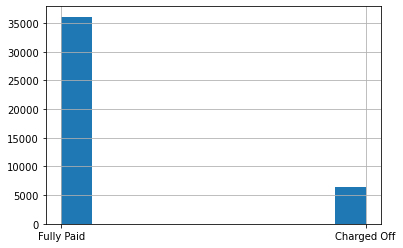

In [54]:
#sprawdzam dla zmiennej kategorycznej, których wartości jest najwięcej, by uzupełnić puste wartości
df.loan_status.hist()

In [55]:
df.loan_status.fillna('Fully Paid', inplace=True)

In [56]:
#sprawdzam ile jest pustych wartości w poszczególnych kolumnach
df.isna().sum()

addr_state                 0
annual_inc                 5
dti                        1
earliest_cr_line           0
emp_length              1113
fico_range_high            1
fico_range_low             1
funded_amnt                1
funded_amnt_inv            1
grade                      0
home_ownership             0
installment                1
int_rate                   1
issue_d                    0
last_fico_range_high       1
last_fico_range_low        1
loan_amnt                  1
open_acc                  30
purpose                    0
revol_bal                  1
revol_util                91
inq_last_6mths            30
sub_grade                  0
term                       0
total_acc                 30
verification_status        0
delinq_2yrs               30
loan_status                0
dtype: int64

In [57]:
#puste pola w zmiennych liczbowych uzupełniam średnią
df = df.fillna(df.mean())

df.isnull().any().any()

False

In [58]:
#zmieniam typ danych na INT
df.emp_length = df.emp_length.astype("int64")
df.open_acc = df.open_acc.astype("int64")
df.total_acc = df.total_acc.astype("int64")
df.inq_last_6mths = df.inq_last_6mths.astype("int64")

In [59]:
#metoda _describe _pozwala na szybkie policzenie statystyk na wartościach numerycznych w poszczególnych kolumnach
df.describe()

,annual_inc,dti,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,installment,int_rate,last_fico_range_high,last_fico_range_low,loan_amnt,open_acc,revol_bal,revol_util,inq_last_6mths,term,total_acc,delinq_2yrs
count,4.253600e+04,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000,4.253600e+04,42536.000000,42536.000000,42536.000000,42536.000000,42536.000000
mean,6.913656e+04,13.373043,4.898933,717.052545,713.052545,10821.585753,10139.938785,322.623063,12.165016,689.922511,676.952039,11089.722581,9.343709,1.429786e+04,49.117156,1.081366,42.207072,22.124318,0.152449
std,6.409258e+04,6.726236,3.524668,36.188013,36.188013,7146.830662,7131.514181,208.924761,3.707892,80.817149,119.646345,7410.851274,4.494697,2.201818e+04,28.333914,1.526918,10.509262,11.588723,0.512226
min,1.896000e+03,0.000000,0.000000,614.000000,610.000000,500.000000,0.000000,15.670000,5.420000,0.000000,0.000000,500.000000,1.000000,0.000000e+00,0.000000,0.000000,36.000000,1.000000,0.000000
25%,4.000000e+04,8.200000,2.000000,689.000000,685.000000,5000.000000,4950.000000,165.535000,9.630000,644.000000,640.000000,5200.000000,6.000000,3.635500e+03,25.800000,0.000000,36.000000,13.000000,0.000000
50%,5.900000e+04,13.470000,4.000000,714.000000,710.000000,9600.000000,8500.000000,277.695000,11.990000,699.000000,695.000000,9700.000000,9.000000,8.821500e+03,49.600000,1.000000,36.000000,20.000000,0.000000
75%,8.250000e+04,18.680000,9.000000,744.000000,740.000000,15000.000000,14000.000000,428.155000,14.720000,749.000000,745.000000,15000.000000,12.000000,1.725050e+04,72.600000,2.000000,60.000000,29.000000,0.000000
max,6.000000e+06,29.990000,10.000000,829.000000,825.000000,35000.000000,35000.000000,1305.190000,24.590000,850.000000,845.000000,35000.000000,47.000000,1.207359e+06,119.000000,33.000000,60.000000,90.000000,13.000000


In [60]:
#zaokrąglam do 2 miejsc po przecinku zmienne liczbowe
round(df.describe(),2)

,annual_inc,dti,emp_length,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,installment,int_rate,last_fico_range_high,last_fico_range_low,loan_amnt,open_acc,revol_bal,revol_util,inq_last_6mths,term,total_acc,delinq_2yrs
count,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00,42536.00
mean,69136.56,13.37,4.90,717.05,713.05,10821.59,10139.94,322.62,12.17,689.92,676.95,11089.72,9.34,14297.86,49.12,1.08,42.21,22.12,0.15
std,64092.58,6.73,3.52,36.19,36.19,7146.83,7131.51,208.92,3.71,80.82,119.65,7410.85,4.49,22018.18,28.33,1.53,10.51,11.59,0.51
min,1896.00,0.00,0.00,614.00,610.00,500.00,0.00,15.67,5.42,0.00,0.00,500.00,1.00,0.00,0.00,0.00,36.00,1.00,0.00
25%,40000.00,8.20,2.00,689.00,685.00,5000.00,4950.00,165.54,9.63,644.00,640.00,5200.00,6.00,3635.50,25.80,0.00,36.00,13.00,0.00
50%,59000.00,13.47,4.00,714.00,710.00,9600.00,8500.00,277.70,11.99,699.00,695.00,9700.00,9.00,8821.50,49.60,1.00,36.00,20.00,0.00
75%,82500.00,18.68,9.00,744.00,740.00,15000.00,14000.00,428.16,14.72,749.00,745.00,15000.00,12.00,17250.50,72.60,2.00,60.00,29.00,0.00
max,6000000.00,29.99,10.00,829.00,825.00,35000.00,35000.00,1305.19,24.59,850.00,845.00,35000.00,47.00,1207359.00,119.00,33.00,60.00,90.00,13.00


# Część 2 - Exploratory Data Analysis

Badania eksploracyjne to podejście obejmujące opis, wizualizację i badanie zebranych danych bez potrzeby zakładania z góry hipotez badawczych. Jest wstępnym etapem procesu naukowego. Skorzystam w nim z metody modelowania statystycznego t-test oraz Chi-squared i zweryfikuję hipotezy statystyczne. Wnioski pomogą mi w odnalezieniu idei problemu. EDA ma na celu wzbogacenie wiedzy naukowej o hipotezy, które mogą nasunąć nieukierunkowana obserwacja i analizy. Badania eksploracyjne obejmuje też wstępne sprawdzanie danych w celu skontrolowania założeń modeli statystycznych, lub występowania błędów w danych (np. brakujących odpowiedzi).

**Import potrzebnych bibliotek**

In [61]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import skew
from scipy.stats import ttest_ind


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207642C9910>,
      dtype=object)

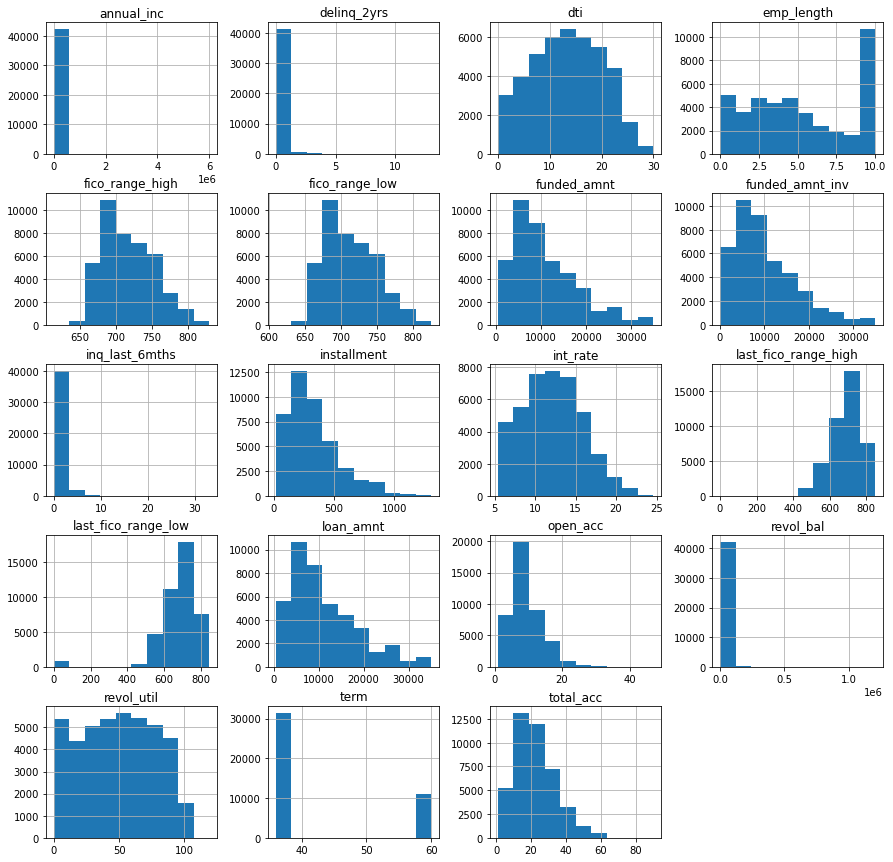

In [62]:
#tworzę histogram dla zmiennych
df.hist(figsize=(15,15))

**2.1 Loan status**  
Current status of the loan

Text(0.5, 0, 'Count')

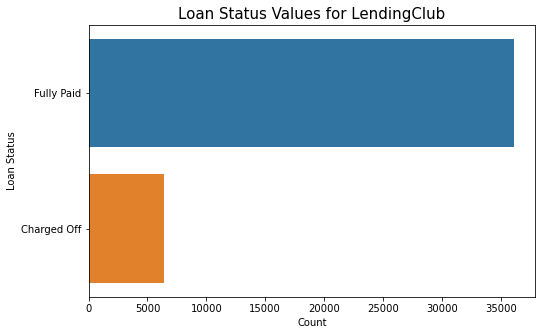

In [63]:
#ustawiam nową zmienną by wyświetlić liczbę wartości per status
loan_status_eda = df['loan_status'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(y=loan_status_eda.index, x=loan_status_eda)
plt.title('Loan Status Values for LendingClub', fontsize=15)
plt.ylabel('Loan Status', fontsize=10)
plt.xlabel('Count', fontsize=10)

Dwie kolumny, którym przyglądamy się w przyszłym modelu, to „Fully paid” i „Charged Off”. Na tym wykresie słupkowym widać, że większość rekordów zawiera pożyczki, które zostały w pełni spłacone.

**2.2 FICO score**  
The upper and lower boundary range the borrower’s FICO at loan origination belongs to.

In [64]:
round(df[['fico_range_low', 'fico_range_high']].describe(),2)

,fico_range_low,fico_range_high
count,42536.00,42536.00
mean,713.05,717.05
std,36.19,36.19
min,610.00,614.00
25%,685.00,689.00
50%,710.00,714.00
75%,740.00,744.00
max,825.00,829.00


In [65]:
#sprawdzam korelację między tymi 2 zmiennymi
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


Do modelu potrzebuję tylko 1 wynik FICO, dlatego wyliczę średnią i utworzę zmienną 'FICO_score_in' dla FICO wyliczonego w momencie udzielania pożyczki. W modelu nie potrzebuję też last FICO, ponieważ nie wiem z jakiego okresu jest wyliczone i nie nie będę miała tych danych dostępnych przy testach.

In [66]:
#tworzę zmienną, która jest średnią punktacją FICO przyznaną dla pożyczkobiorcy w momecie zaciągnięcia pożyczk
df['FICO_score_in'] = (df['fico_range_high'] + df['fico_range_low'])/ len([df['fico_range_high']] + [df['fico_range_low']] )

In [67]:
# usuwam zmienne wykorzystane do stworzenia średniej FICO oraz last_FICO, ponieważ nie wiemy z jakiego okresy jest to pomiar, a nie będzie on znany w momencie zaciągania pożyczki
df.drop(['fico_range_high', 'fico_range_low', 'last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)

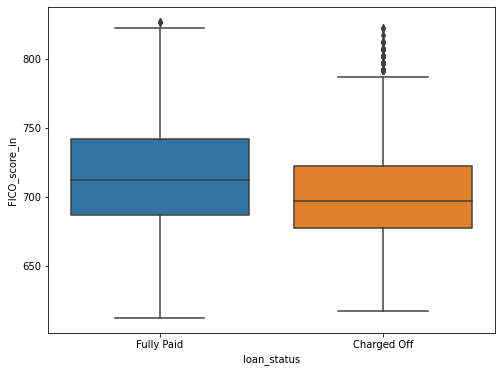

In [68]:
#sprawdzam korelację między targetem a wynikiem FICO 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='FICO_score_in')

Widać, że wystepuje korelacja między targetem a wynikiem FICO, który zostal określony w momencie ubiegania się o pożyczkę. Średni wynik FICO dla rekordów ze spłaconą pożyczką jest wyższy niż dla tych co pożyczki nie spłacili, co potwierdza założenia.

In [69]:
#tworzę zmienną ratingu FICO na podstawie średniej punktacji FICO przyznanej dla pożyczkobiorcy w momecie zaciągnięcia pożyczki
value = []

for row in df['FICO_score_in']:
    if row < 580:
        value.append('Poor')
    elif row>=580 and row <=669:
        value.append('Fair')
    elif row >=670 and row <=739:
        value.append('Good')
    elif row >=740 and row <=799:
        value.append('Very Good')
    else:
        value.append('Exceptional')
df['FICO_rating_in']=value

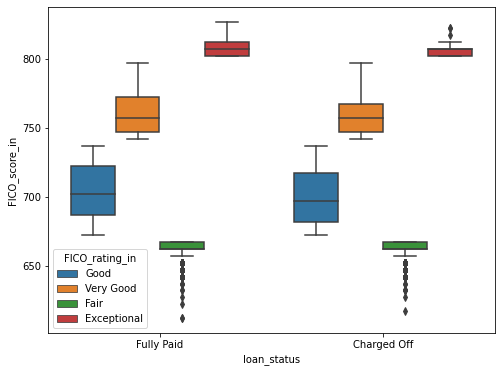

In [70]:
#sprawdzam korelację między FICO wejściowym a targetem
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='FICO_score_in', hue='FICO_rating_in')

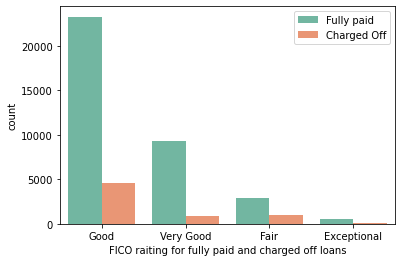

In [71]:
sns.countplot(data=df, x='FICO_rating_in', hue = 'loan_status', palette= 'Set2')
plt.xlabel('FICO raiting for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

Osoby z wyższymi wynikami FICO uważane są przez pożyczkodawców za bardziej pożądanych pożyczkobiorców, ponieważ zazwyczaj są oni narażeni na mniejsze ryzyko niespłacenia pożyczek. Rating okrelony jest za pomocą skali:
- 800+ Exceptional
- 740-799 Very Good
- 670-739 Good
- 580-669 Fair
- <580 Poor

**Testem statystycznym chi-squared sprawdzę zależność między ratingiem FICO a targetem**

- H0 - status pożyczki nie jest zależny od oceny FICO
- H1 - status pożyczki jest zależny od oceny FICO

In [72]:
# Contingency table
d_fico = pd.crosstab(df['FICO_rating_in'], df['loan_status'])
print(d_fico)
stat, p, dof, expected = chi2_contingency(d_fico)
print('dof=%d' % dof)
print(expected)

# First way to interpret the result, by test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# Second way to interpret the result, by  p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

loan_status     Charged Off  Fully Paid
FICO_rating_in                         
Exceptional              34         590
Fair                    964        2930
Good                   4550       23297
Very Good               883        9288
dof=3
[[   94.34229829   529.65770171]
 [  588.73222682  3305.26777318]
 [ 4210.17625071 23636.82374929]
 [ 1537.74922419  8633.25077581]]
probability=0.950, critical=7.815, stat=688.031
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


**2.3 Term**  
The number of payments on the loan. Values are in months and can be either 36 or 60.

In [73]:
# Sprawdzam rozkład ilości pożyczek w zależności od sługości spłaty
df['term'].value_counts(normalize=True)

36    0.741372
60    0.258628
Name: term, dtype: float64

In [74]:
df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.122911
60    0.232252
Name: loan_status, dtype: float64

Około 74% zaciągniętych pożyczek ma okresy trzyletnie, a pozostałe pięcioletnie. Pożyczki z pięcioletnimi okresami są prawie dwukrotnie bardziej narażone na niespłacenie niż pożyczki z trzyletnimi okresami. 

Text(0, 0.5, 'Loan Amount')

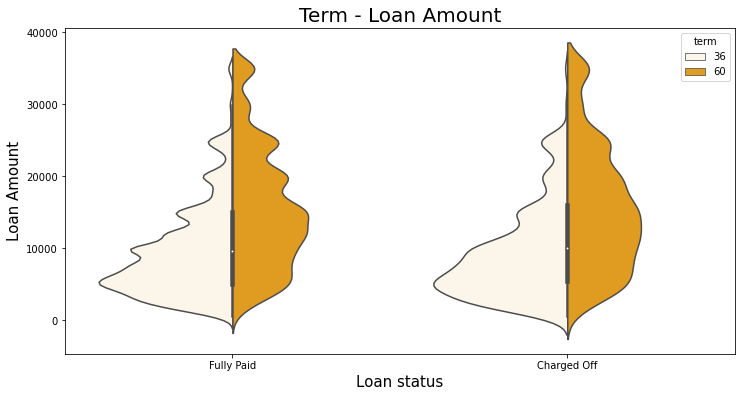

In [75]:
# Sprawdzam korelację między targetem a wysokością zaciągniętej pożyczki z uwzględnieniem długości kredytowania
fig = plt.figure(figsize=(12,6))
sns.violinplot(x='loan_status',y='loan_amnt',data=df, hue='term', split=True,color='orange')
plt.title('Term - Loan Amount', fontsize=20)
plt.xlabel('Loan status', fontsize=15)
plt.ylabel('Loan Amount', fontsize=15)

Średnia wysokość pożyczki jest podobna przy obu długościach terminu kredytowania.

**2.4 Home Ownership Type**  
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

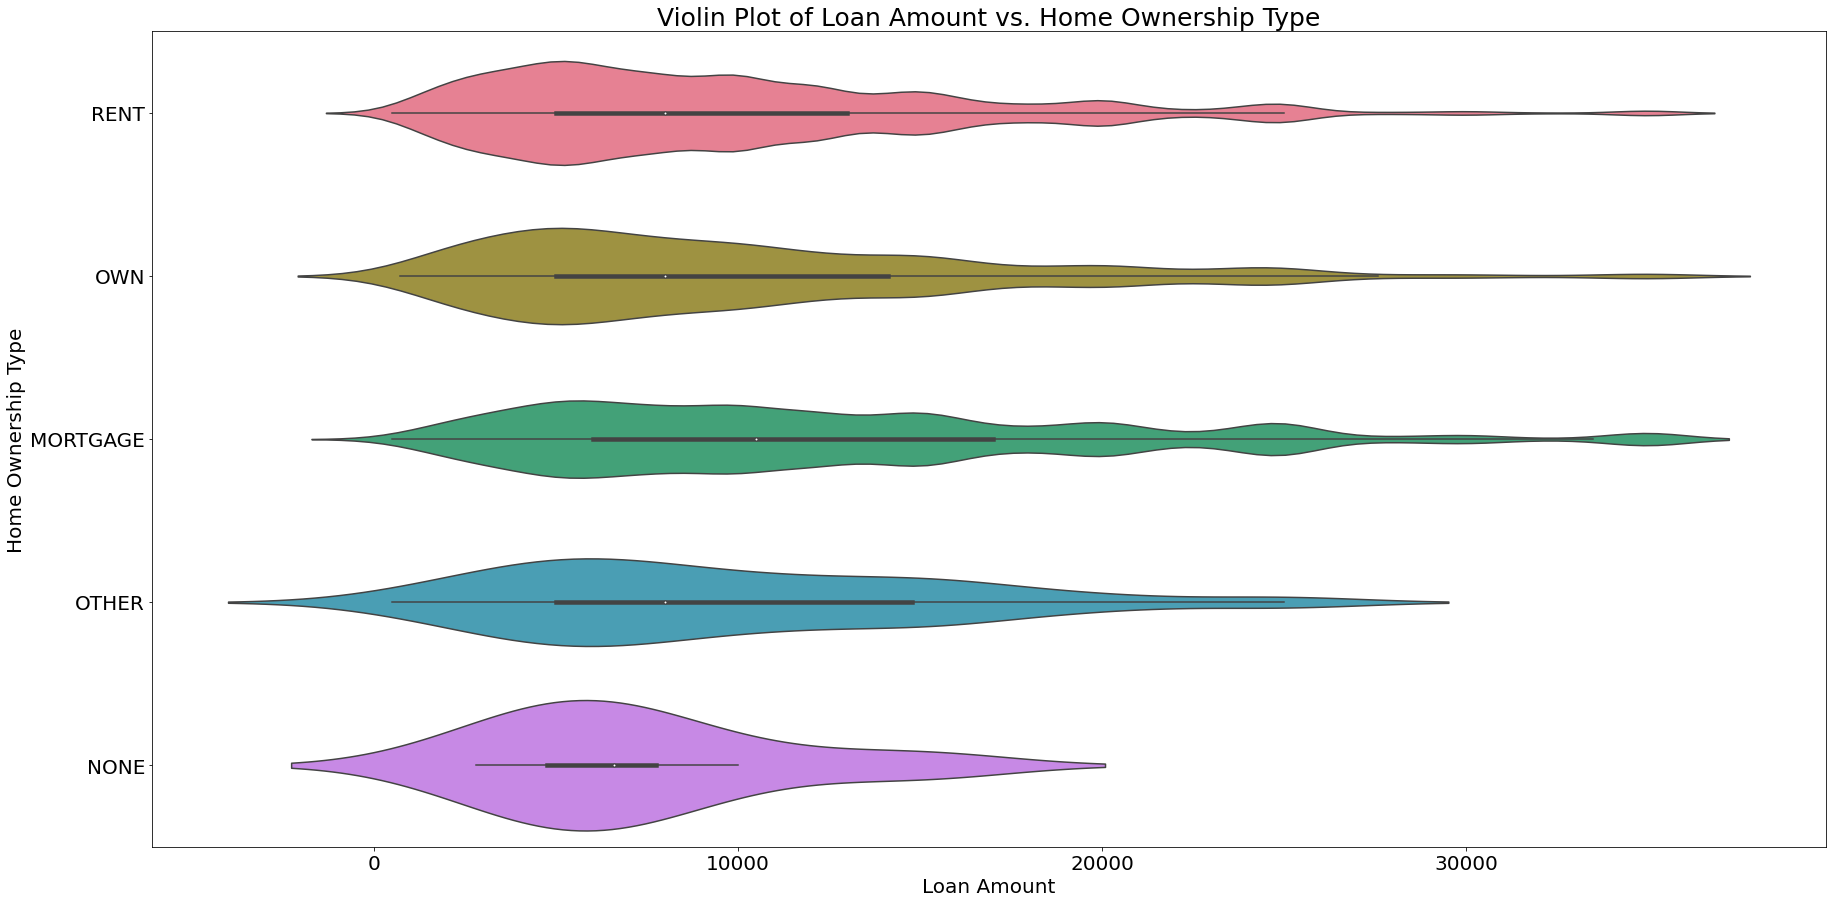

In [76]:
#sprawdzam korelację między wysokością zaciągnietej pożyczki a statusem własności domu
plt.figure(figsize=(30,15))
sns.violinplot(x='loan_amnt', y='home_ownership', data=df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Na tym wykresie określono średnią i rozkład gęstości kwot pożyczek według rodzaju własności domu. Pożyczkobiorców można podzielić na pięć typów własności. Kredytobiorcy posiadający kredyty hipoteczne mają najwyższą średnią kwotę kredytu, a wynajmujący i właściciele nieruchomości mają niższą kwotę kredytu, ale tej samej wysokości.

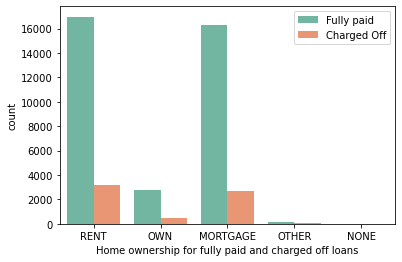

In [77]:
sns.countplot(data=df, x='home_ownership', hue = 'loan_status', palette= 'Set2')
plt.xlabel('Home ownership for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

In [78]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.142360
NONE        0.125000
OTHER       0.213235
OWN         0.152261
RENT        0.158904
Name: loan_status, dtype: float64

Zarówno pożyczkobiorcy z hipoteką, jak i wynajmujący mają spłacalność na zbliżonym poziomie. Ilość obserwacji ze statusem niespłaconej pożyczki u wynajmujących i tych z hipoteką również jest bardzo podobna, dlatego status własności nie wiąże się z prawdopodobieństwem niewypłacalności.

**2.5 Annual income**  
The self-reported annual income provided by the borrower during registration.

In [79]:
round(df['annual_inc'].describe(),2)

count      42536.00
mean       69136.56
std        64092.58
min         1896.00
25%        40000.00
50%        59000.00
75%        82500.00
max      6000000.00
Name: annual_inc, dtype: float64

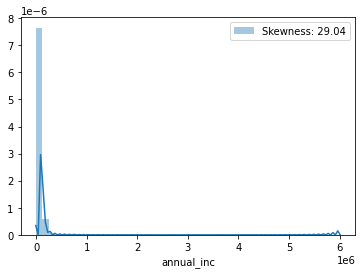

In [80]:
g = sns.distplot(df['annual_inc'], label="Skewness: %.2f"%(df['annual_inc'].skew()))
g = g.legend(loc="best")
plt.show()

Roczny dochód waha się między niecałe 2000\$ a 6000000.  
Ze względu na bardzo duży zakres dokonam transformacji logarytmicznej.

In [81]:
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: np.log10(x))

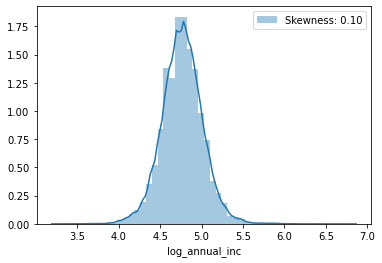

In [82]:
g = sns.distplot(df['log_annual_inc'], label="Skewness: %.2f"%(df['log_annual_inc'].skew()))
g = g.legend(loc="best")
plt.show()

In [83]:
df['log_annual_inc'].describe()

count    42536.000000
mean         4.764398
std          0.246607
min          3.277838
25%          4.602060
50%          4.770852
75%          4.916454
max          6.778151
Name: log_annual_inc, dtype: float64

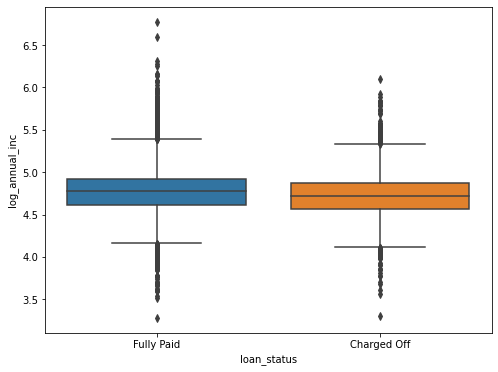

In [84]:
#sprawdzam korelację między targetem a rocznym dochodem
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='log_annual_inc')

Wydaje się, że pożyczkobiorcy z niższym rocznym dochodem są mniej wypłacalni.

In [85]:
df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,4.725536,0.250240,3.301030,4.568202,4.724276,4.875061,6.096910
Fully Paid,36105.0,4.771320,0.245313,3.277838,4.614855,4.778151,4.924279,6.778151


Różnica jest bardzo mała, dlatego roczny dochód nie wiąże się z prawdopodobieństwem niewykonania zobowiązania.

**1. Dochód po transformacji logarytymicznej - testem statystycznym t-test sprawdzę czy średni dochód dla fully paid jest podobny do średniego dochodu dla charged off**

In [86]:
d1 = df[df.loan_status == 'Fully Paid'].log_annual_inc
fp = np.array(d1)
fp

array([4.38021124, 4.08820699, 4.6919651 , ..., 5.04139269, 4.83970774,
       4.84509804])

In [87]:
d2 = df[df.loan_status == 'Charged Off'].log_annual_inc
ch_off = np.array(d2)
ch_off

array([4.47712125, 4.60205999, 4.17609126, ..., 3.81291336, 4.60205999,
       4.30103   ])

In [88]:
stat, p = ttest_ind(fp, ch_off)
print('stat=%.3f, p=%.100f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat=13.747, p=0.0000000000000000000000000000000000000000006536847234558488786109033137773757401908663749333205535282
Probably different mean


Test potwierdza, że różnica jest, ale nie jest ona istotna.

**2. Dochód przed transformacją logarytymiczną - testem statystycznym t-test sprawdzę czy średni dochód dla fully paid jest podobny do średniego dochodu dla charged off**

In [89]:
d3 = df[df.loan_status == 'Fully Paid'].annual_inc
f_p = np.array(d1)
f_p

array([4.38021124, 4.08820699, 4.6919651 , ..., 5.04139269, 4.83970774,
       4.84509804])

In [90]:
d4 = df[df.loan_status == 'Charged Off'].annual_inc
off = np.array(d2)
off

array([4.47712125, 4.60205999, 4.17609126, ..., 3.81291336, 4.60205999,
       4.30103   ])

In [91]:
stat, p = ttest_ind(f_p, off)
print('stat=%.3f, p=%.100f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat=13.747, p=0.0000000000000000000000000000000000000000006536847234558488786109033137773757401908663749333205535282
Probably different mean


Wynik testu jest taki sam

In [92]:
df.drop('annual_inc', axis=1, inplace=True)

**2.6 Loan amount**  
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [93]:
round(df['loan_amnt'].describe(),2)

count    42536.00
mean     11089.72
std       7410.85
min        500.00
25%       5200.00
50%       9700.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64

Wysokość pożyczek waha się między 500 a 35000, ze średnią 11000$.

Text(0.5, 1.0, 'Distribution of loan amount')

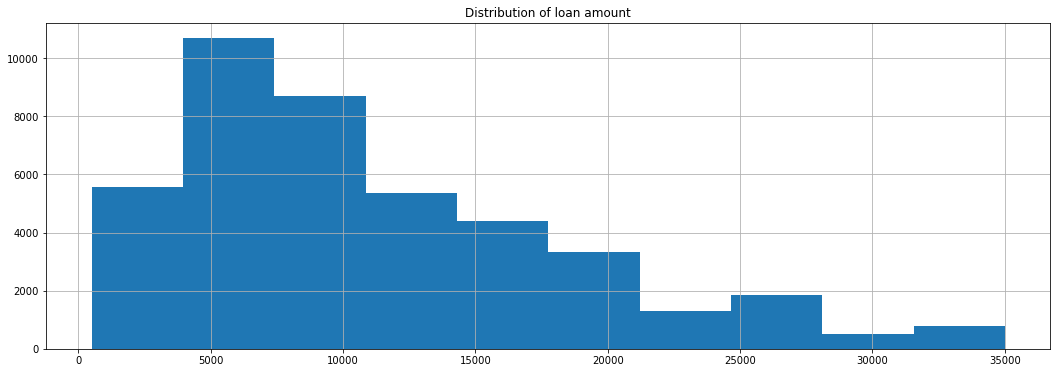

In [94]:
#sprawdzam rokład pożyczek wg wysokości pożyczki
plt.rc("figure", figsize=(18, 6))
df['loan_amnt'].hist()
plt.title('Distribution of loan amount')

In [95]:
round(df.groupby('loan_status')['loan_amnt'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,11837.43,7971.07,500.0,5475.0,10000.0,16000.0,35000.0
Fully Paid,36105.0,10956.54,7298.64,500.0,5100.0,9600.0,15000.0,35000.0


Text(0.5, 1.0, 'What kind of loan status have the largest amount?')

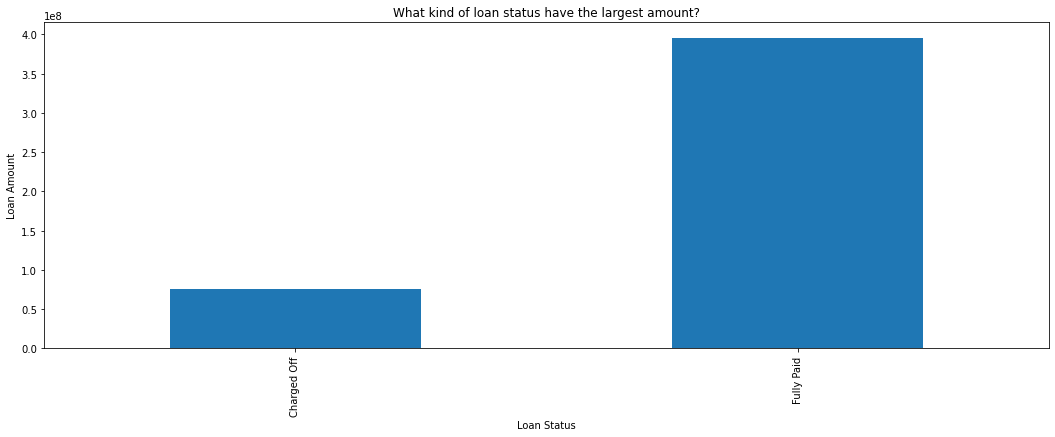

In [96]:
## sprawdzam jaka jest suma pożyczek w każdym statusie 
df.groupby('loan_status')['loan_amnt'].sum().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('What kind of loan status have the largest amount?')

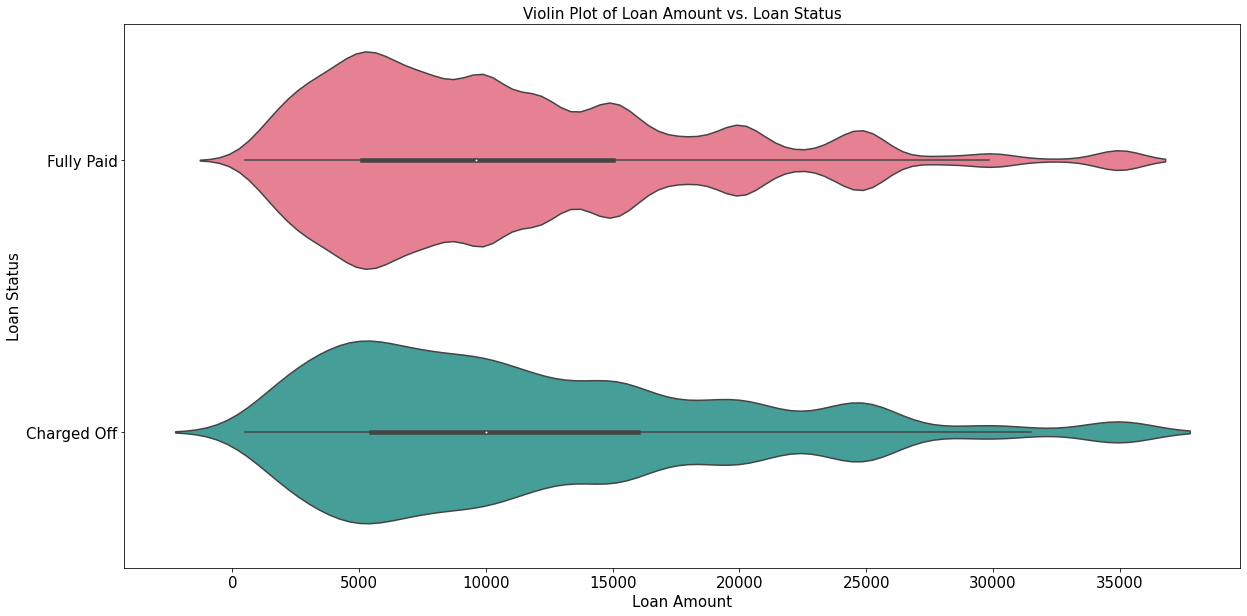

In [97]:
#sprawdzam korelację między targetem a wysokością zaciągniętej pożyczki
plt.figure(figsize=(20,10))
sns.violinplot(x='loan_amnt', y='loan_status', data=df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Loan Status', fontsize=15)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Loan Status', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [98]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,11837.428083,7971.073296,500.0,5475.0,10000.0,16000.0,35000.0
Fully Paid,36105.0,10956.541746,7298.644170,500.0,5100.0,9600.0,15000.0,35000.0


Różnica jest niewielka dlatego, status spłaty pożyczki nie jest powiązany z wielkością udzielonej pożyczki. 

**Testem statystycznym t-test sprawdzę czy średnia wysokość pożyczki dla fully paid jest równa średniej wysokości pożyczki dla charged off**

In [99]:
data1 = df[df.loan_status == 'Fully Paid'].loan_amnt
fully_paid = np.array(data1)
fully_paid

array([ 5000.,  2400., 10000., ...,  2525.,  6500.,  5000.])

In [100]:
data2 = df[df.loan_status == 'Charged Off'].loan_amnt
charged_off = np.array(data2)
charged_off

array([2500., 5600., 5375., ..., 2600., 1275., 6500.])

In [101]:
stat, p = ttest_ind(fully_paid, charged_off)
print('stat=%.3f, p=%.100f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat=-8.790, p=0.0000000000000000015513196397679952134913352589573977022054827842786331112967523893075849628075957298
Probably different mean


**2.7 Employment lenght**  
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

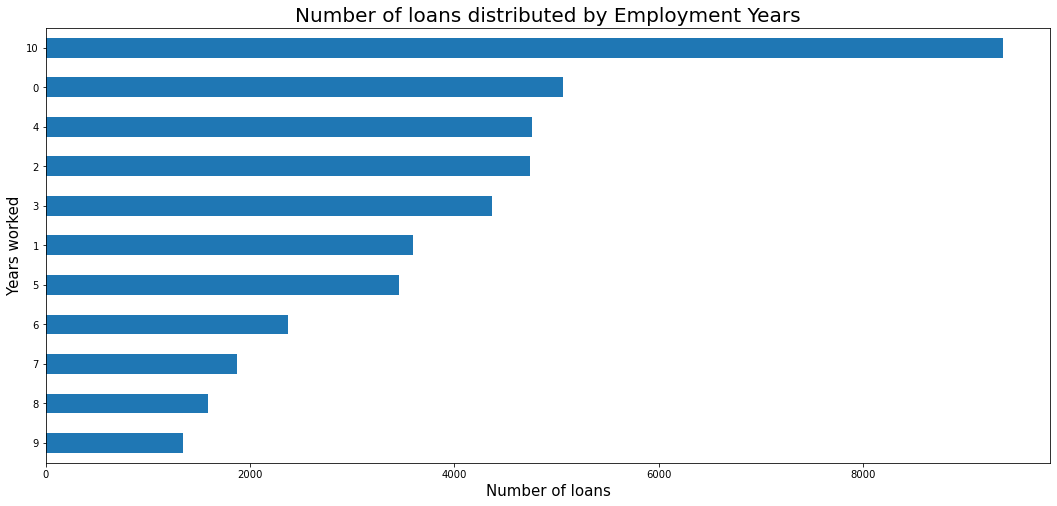

In [102]:
#sprawdzam osoby z jakim stażem pracy częściej biorą pożyczki
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

Na wykresie widać, że osoby, które pracowały przez 10 lub więcej lat najczęściej zaciągniągają pożyczki, ale ciekawe jest to, że zaraz za nimi są osoby z krótszym niż rok doświadczeniem zawodowym.

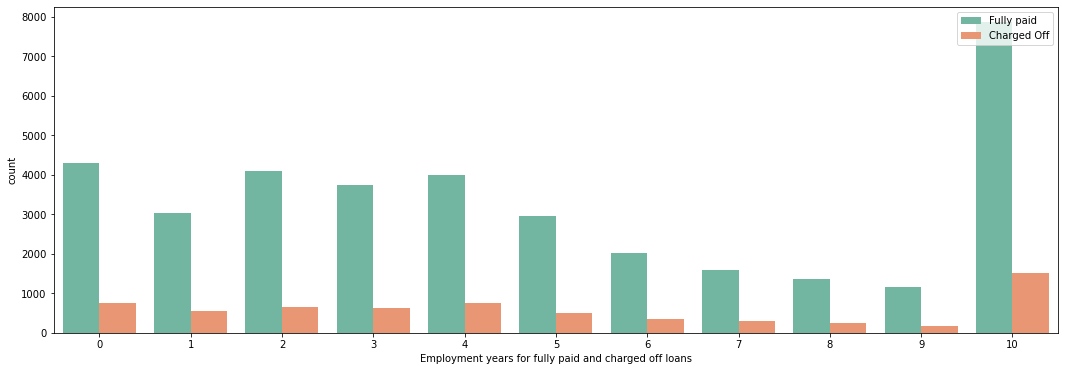

In [103]:
#sprawdzam korelację między targetem a długością zatrudnienia
sns.countplot(data=df, x='emp_length', hue = 'loan_status', palette= 'Set2')
plt.xlabel('Employment years for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

Historia zatrudnienia nie wiąże się z prawdopodobieństwem niewykonania zobowiązania.

**2.8 State**  
The state provided by the borrower in the loan application

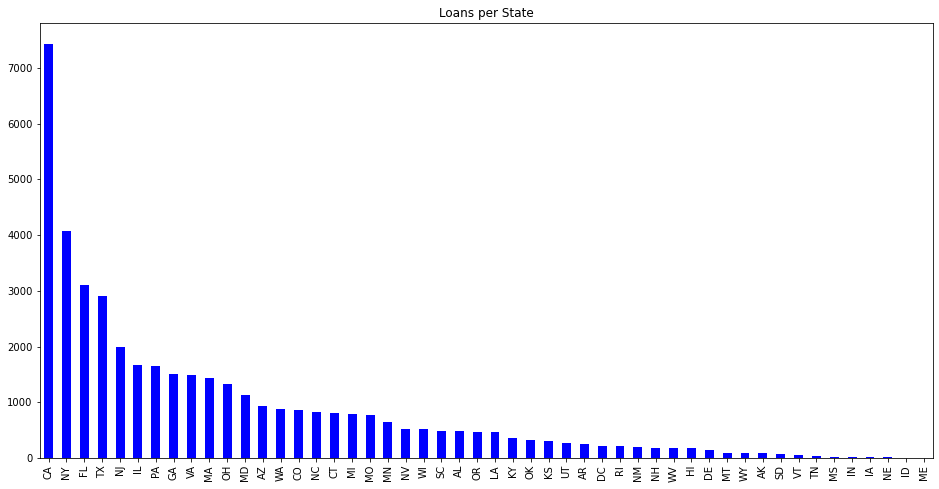

In [104]:
#sprawdzam ilość zaciągniętych pożyczek per stan
state_count = df.addr_state.value_counts()
state_count.plot(kind = 'bar',figsize=(16,8),color='blue', title = 'Loans per State')

Wykres pokazuje, że zdecydowanie najwięcej pożyczek zaciągają osoby z Kalifornii. Wynika to zapewne z tego, że LC ma tam siedzibę.

In [105]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
WY    0.045977
DC    0.075893
ID    0.111111
DE    0.117647
KS    0.120805
VT    0.122807
WV    0.122995
LA    0.125813
AL    0.128099
MA    0.128651
TX    0.129331
CO    0.129522
RI    0.129808
CT    0.129902
AR    0.130268
VA    0.130464
OH    0.130926
PA    0.136281
NY    0.137269
OK    0.138801
IL    0.139952
MN    0.141104
SC    0.143149
NH    0.143617
WI    0.149225
NC    0.151807
KY    0.153203
AZ    0.153269
MI    0.154523
NJ    0.154930
NM    0.160976
WA    0.161036
OR    0.164530
MD    0.165333
UT    0.165468
HI    0.165746
CA    0.165814
GA    0.166334
IA    0.166667
MT    0.177083
MO    0.183007
FL    0.187178
TN    0.187500
SD    0.194030
AK    0.197674
MS    0.230769
NV    0.237192
IN    0.368421
NE    0.545455
Name: loan_status, dtype: float64

Najwięcej niespłaconych pożyczek było udzielonych w stanie Nebraska, a najmniej w stanie Wyoming.

**2.9 Interest rate**  
Interest Rate on the loan

Text(0.5, 1.0, 'Distribution of interest rate')

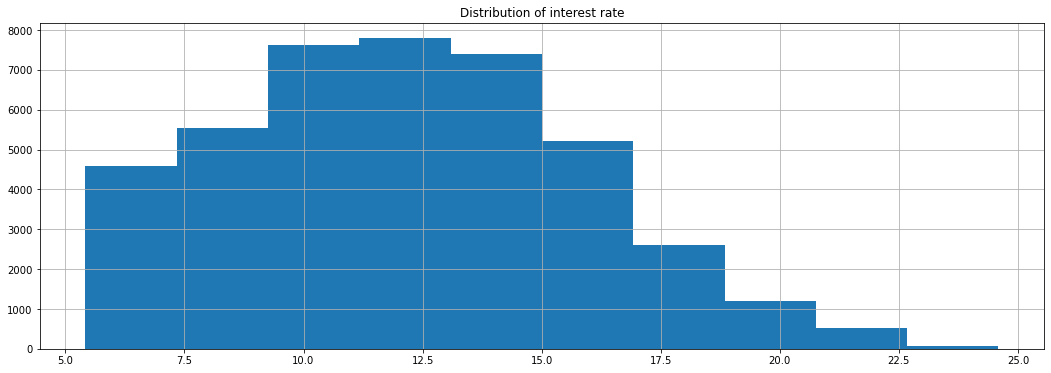

In [106]:
#sprawdzam jakie oprocentowanie miały udzielone pożyczki
plt.rc('figure', figsize=(18, 6))
df['int_rate'].hist()
plt.title('Distribution of interest rate')

In [107]:
round(df['int_rate'].describe(),1)

count    42536.0
mean        12.2
std          3.7
min          5.4
25%          9.6
50%         12.0
75%         14.7
max         24.6
Name: int_rate, dtype: float64

Pożyczki udzielone były z oprocentowaniem między 5.4% a 24.6%. Najwięcej było udzielonych pożyczek z oprocentowaniem ok 12%

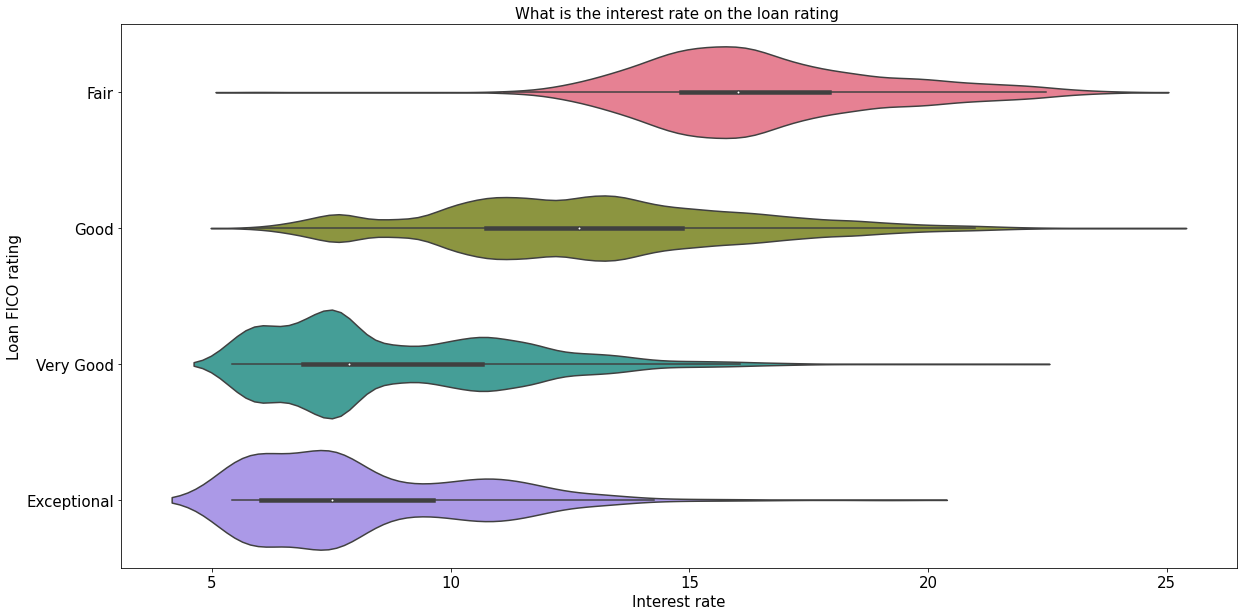

In [108]:
plt.figure(figsize=(20,10))
sns.violinplot(x='int_rate', y='FICO_rating_in', data=df, palette="husl", order=["Fair", "Good", "Very Good", "Exceptional"])
plt.title('What is the interest rate on the loan rating ', fontsize=15)
plt.xlabel('Interest rate', fontsize=15)
plt.ylabel('Loan FICO rating', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Wynik FICO jest również ważnym czynnikiem w określaniu stopy procentowej. Widać, że im niższa ocena w ratingu tym wyższe oprocentowanie.

In [109]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,13.927364,3.561208,5.42,11.49,13.80,16.40,24.40
Fully Paid,36105.0,11.851107,3.645129,5.42,8.90,11.71,14.27,24.59


Pożyczki niespłacone miały ok 2% wyższą stopę procentową.

**2.10 Issue date**  
The month which the loan was funded

In [110]:
#tworzę nową zmienną wiek kredytowy
df['credit_age'] = (df['issue_d']-df['earliest_cr_line']).dt.days
df[['credit_age', 'issue_d','earliest_cr_line']]

,credit_age,issue_d,earliest_cr_line
0,9830,2011-12-01,1985-01-01
1,4627,2011-12-01,1999-04-01
2,3682,2011-12-01,2001-11-01
3,5782,2011-12-01,1996-02-01
4,5813,2011-12-01,1996-01-01
...,...,...,...
42531,2800,2007-06-01,1999-10-01
42532,2800,2007-06-01,1999-10-01
42533,2800,2007-06-01,1999-10-01
42534,2800,2007-06-01,1999-10-01


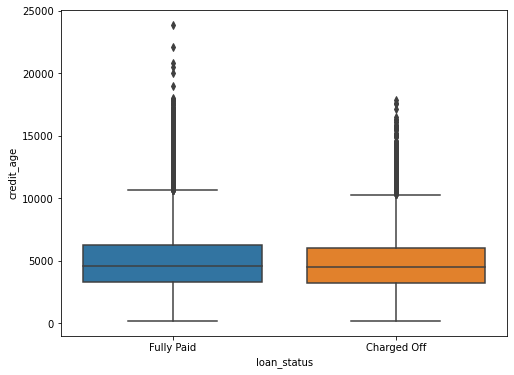

In [111]:
#sprawdzam korelację między targetem a wiekiem kredytowym
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='credit_age')

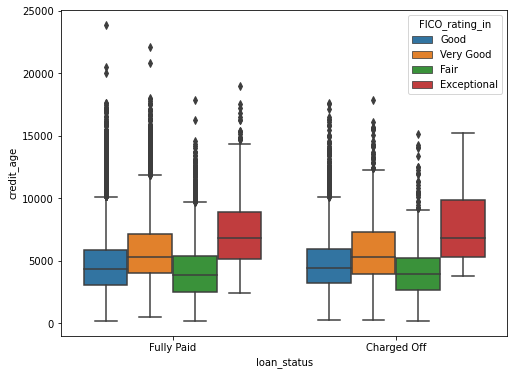

In [112]:
#sprawdzam związek między wynikiem FICO, a wiekiem kredytowym 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='credit_age', hue='FICO_rating_in')

Wiek kredytowy ma wpływ na wynik FICO, im dłuższy tym wyższy wynik.

In [113]:
df.groupby('loan_status')['credit_age'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,4860.772975,2491.509457,184.0,3226.0,4473.0,6056.0,17897.0
Fully Paid,36105.0,5015.081097,2519.516782,184.0,3287.0,4567.0,6239.0,23892.0


Średnia wieku kredytowego pożyczkobiorców, którzy nie spłacili pożyczki jest niższa o niecałe 0,5 roku od pożyczkobiorców, którzy spłacili zobowiązanie, dlatego wiek kredytowy nie wiąże się z prawdopodobieństwem niewykonania zobowiązania.

In [114]:
def add_datepart(dt):
    return {'year': dt.year,
            'month': dt.month,
            'weekofyear': dt.weekofyear,
            'quarter': dt.quarter}
date_features = pd.DataFrame(df.issue_d.apply(lambda x: add_datepart(x)).tolist())

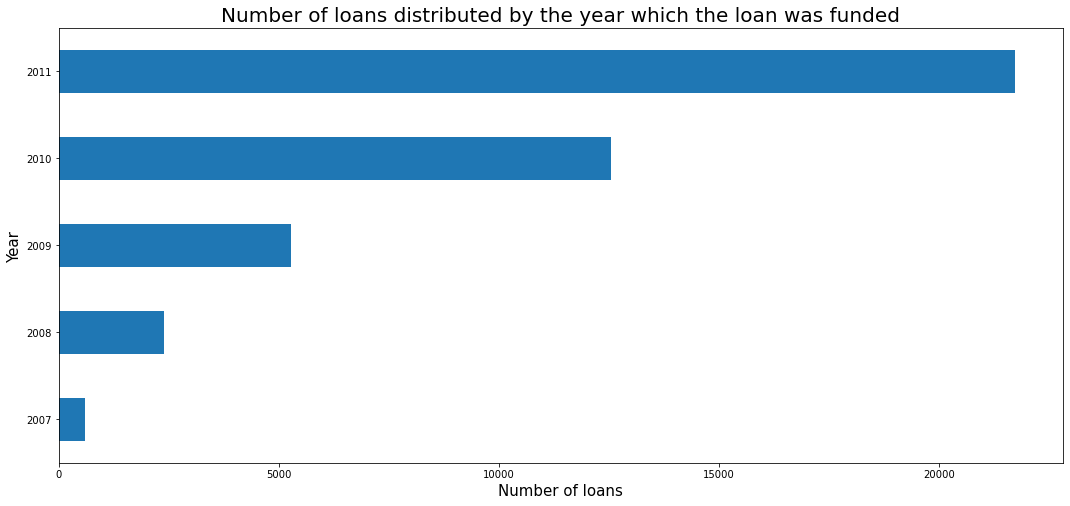

In [115]:
date_features['year'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by the year which the loan was funded',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Year',fontsize=15);

Trwający w latach 2007-2009 kryzys gospodarczy mógł mnieć wpływ na mniejszą ilość udzielanych pożyczek. Wzrost nastąpił w 2010, natomiast rok później ilość pożyczek wzrosła niemal dwukrotnie.

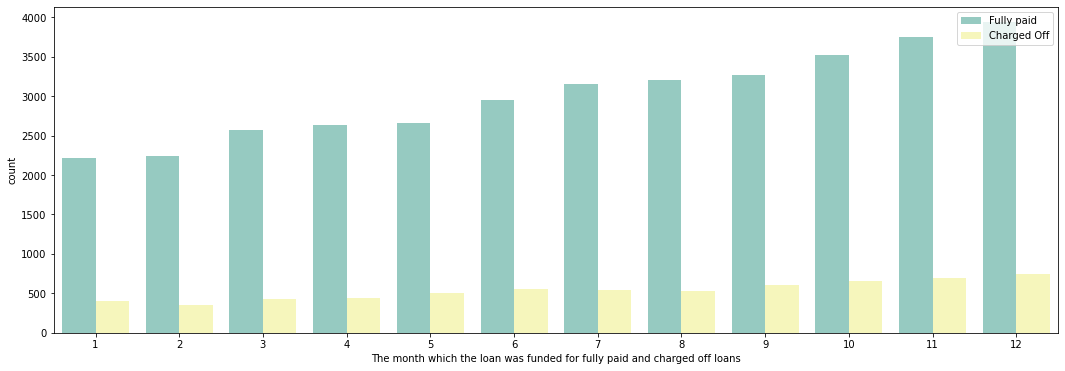

In [116]:
sns.countplot(data=df, x=date_features['month'], hue = 'loan_status', palette= 'Set3')
plt.xlabel('The month which the loan was funded for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

Najmniej pożyczek udzielanych jest w styczniu, najwięcej w grudniu. 

In [117]:
df.drop(['issue_d','earliest_cr_line'], axis=1, inplace=True)

**2.11 Purpose**  
A category provided by the borrower for the loan request. 

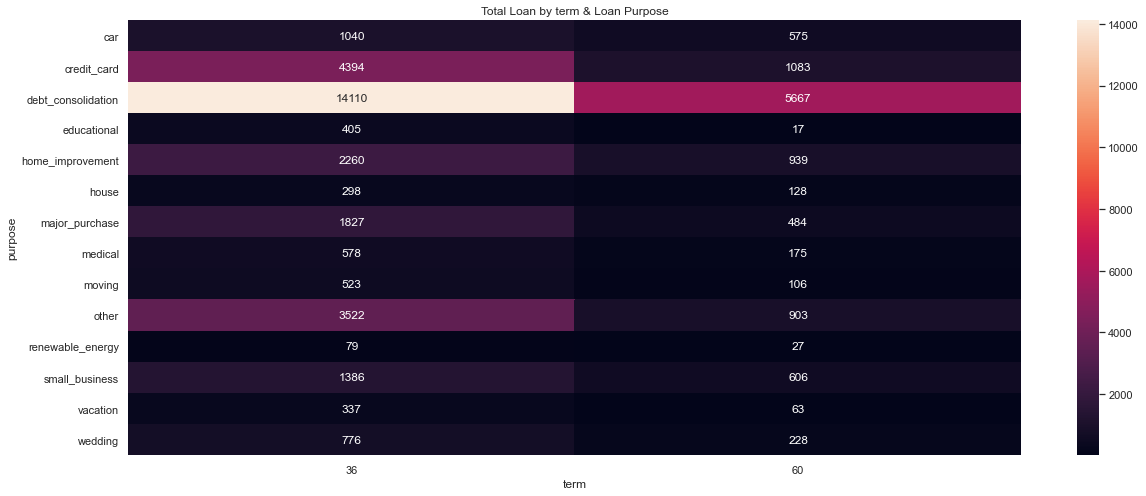

In [118]:
#sprawdzam rozkład pożyczek z uwzględnieniem powodu zaciągnięcia pożyczki i długości okresu jej spłaty
loanpurp = pd.DataFrame()
loanpurp = df.groupby(['term','purpose']).size().sort_values()
loanp = loanpurp.unstack()

sns.set(style='white')
plt.figure(figsize=(20, 8))
plt.title('Total Loan by term & Loan Purpose')
ax =sns.heatmap(loanp.T,mask= loanp.T.isnull(),annot=True,fmt='g');
ax

Najwięcej pożyczek udzielonych było na konsolidację zadłużenia. Większość tych pożyczek zaciągnięta była na 36 miesięcy. Z tego samego powodu zaciągniętych było najwięcej pożyczek z terminem 60 m-cy.

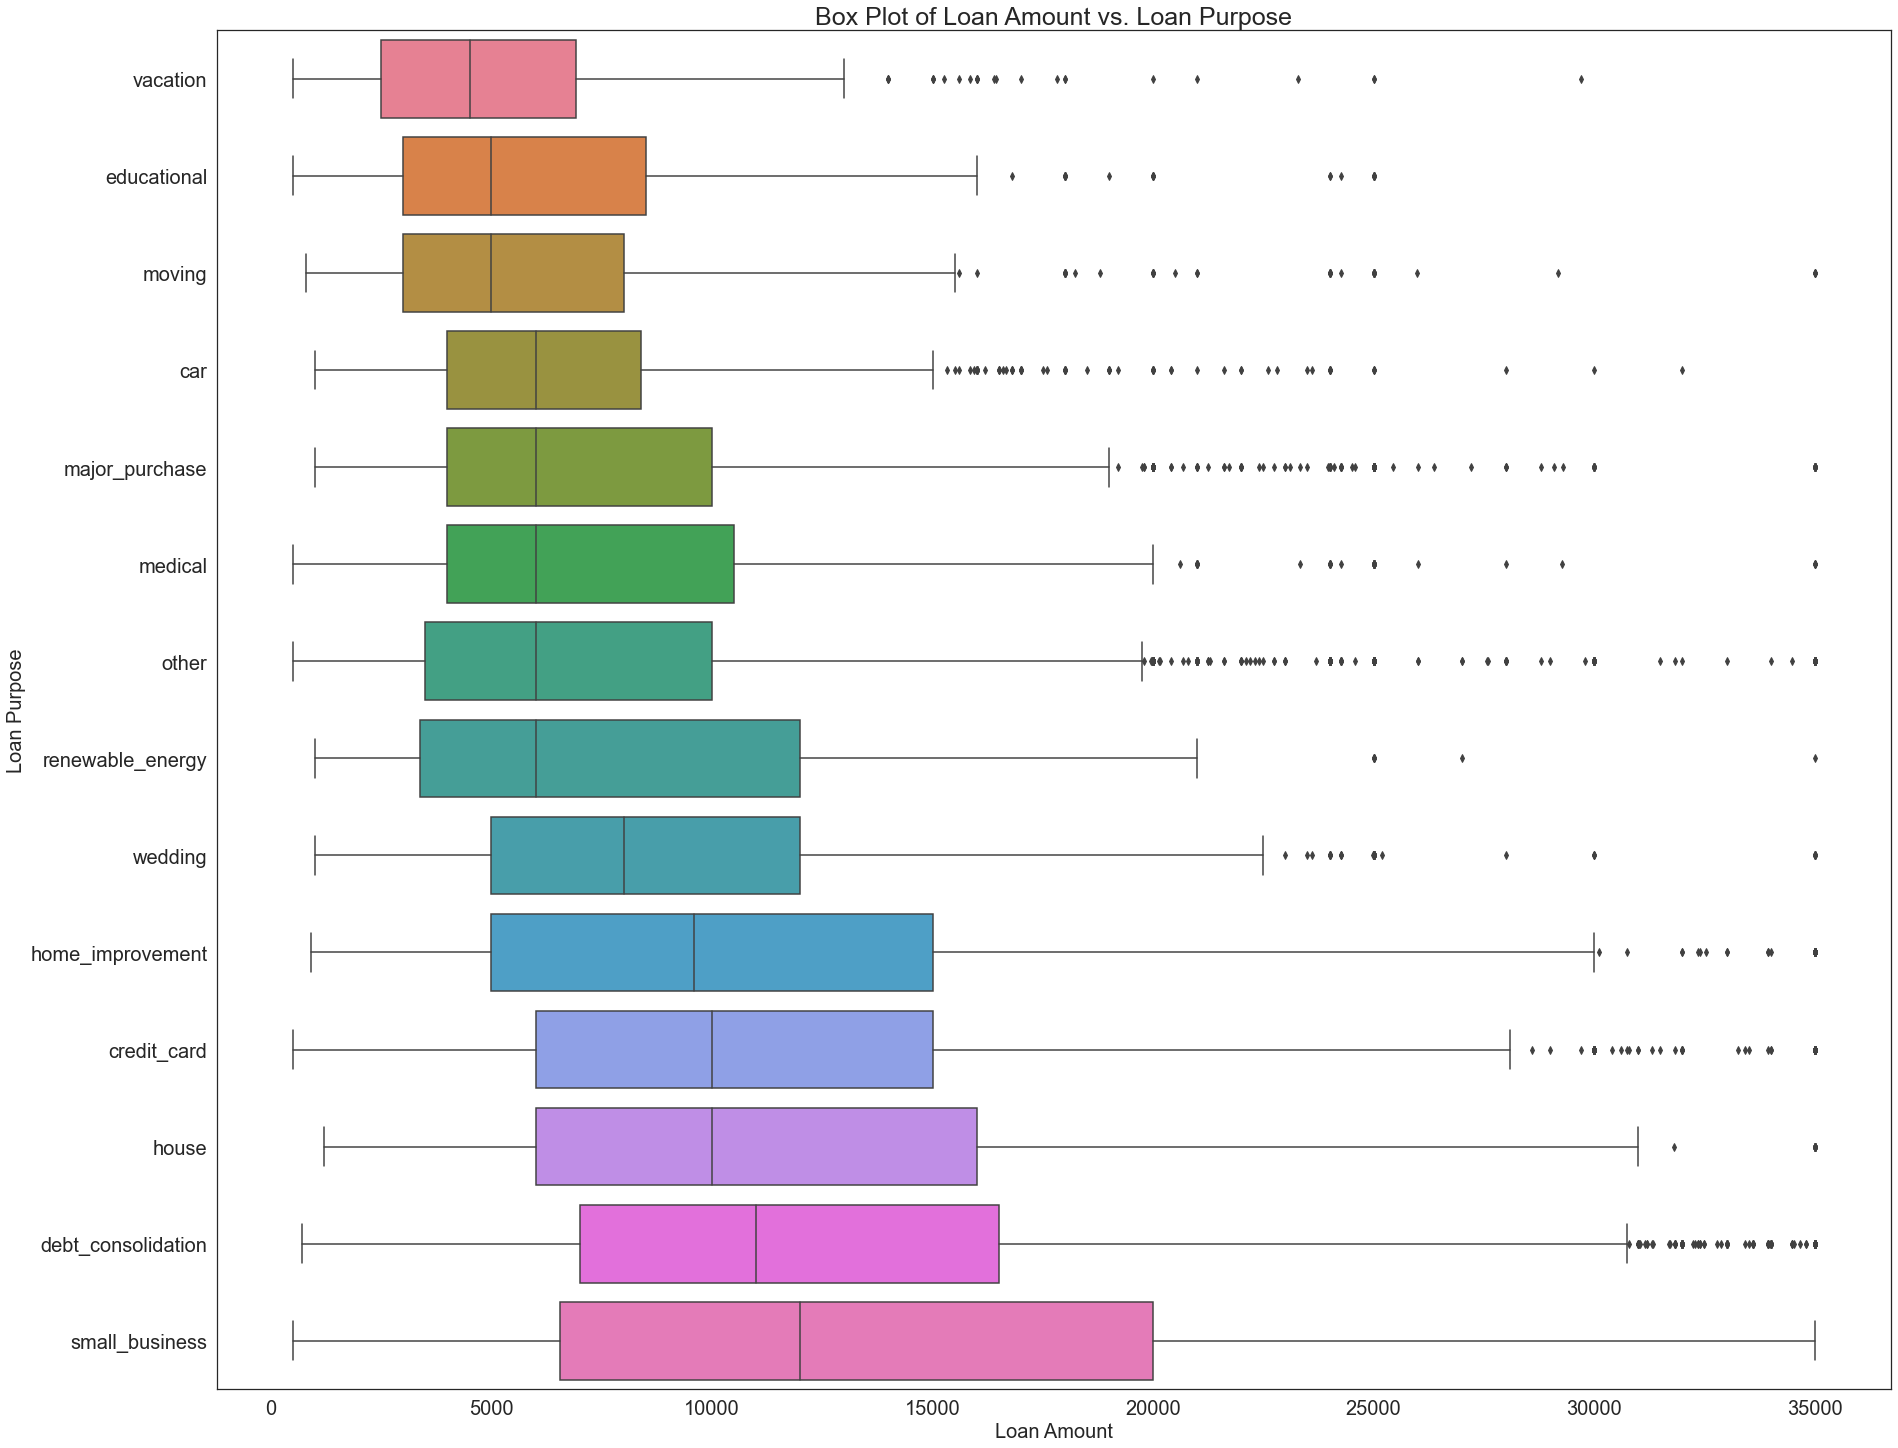

In [119]:
#sprawdzam kwotę pożyczki pożyczkobiorcy w porównaniu z celem pożyczki 
grouped = df.groupby('purpose')
loan_sorted_median = pd.DataFrame({col:vals['loan_amnt'] for col,vals in grouped}).median().sort_values(ascending=True)
plt.figure(figsize=(30,25))
sns.boxplot(x='loan_amnt', y='purpose', order=loan_sorted_median.index, data=df, palette="husl") #order
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Kolumna celu pożyczki jest podzielona na 14 wartości kategorycznych. Pożyczki dla małych firm i konsolidacja zadłużenia mają najwyższą średnią kwotę pożyczki w porównaniu z innymi kategoriami ze średnią około 12 000 dolarów. Zaskakujące jest, że pożyczki wakacyjne mają najmniejszą średnią kwotę pożyczki, wynoszącą średnio 5000, nieco mniej niż pożyczki edukacyjne i na przeprowadzkę. 

In [120]:
df.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
major_purchase        0.106015
car                   0.107121
wedding               0.108566
credit_card           0.112653
home_improvement      0.131916
vacation              0.147500
debt_consolidation    0.155939
house                 0.164319
medical               0.169987
moving                0.170111
other                 0.171299
renewable_energy      0.188679
educational           0.208531
small_business        0.276606
Name: loan_status, dtype: float64

Pożyczki dla małych firm stanowią największą część wśród pożyczek niespłaconych.

**2.12 Grade, Sub Grade**  
LC assigned loan grade/subgrade

In [121]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [122]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [123]:
#grade wynika z subgrade, dlatego kolumnę grade można usunąć
df.drop('grade', axis=1, inplace=True)

Text(0.5, 0, 'Count')

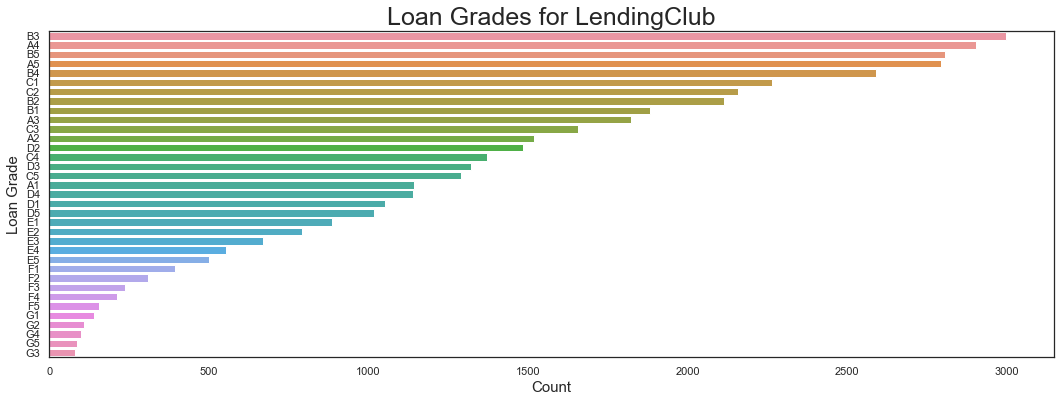

In [124]:
#sprawdzam rozkład pożyczek udzielonych wg ratingu kredytowego
grade_eda = df['sub_grade'].value_counts()
sns.barplot(y=grade_eda.index, x=grade_eda)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

Rating kredytowy jest wypadkową formuły uwzględniającej nie tylko zdolność kredytową, ale także kombinację kilku wskaźników ryzyka kredytowego z raportu kredytowego i wniosku kredytowego. LC klasyfikuje pożyczkobiorców wg skali A-G, gdzie A to najlepsza ocena, a G - najgorsza.

Text(0.5, 1.0, 'Charge-off Rate by sub grade')

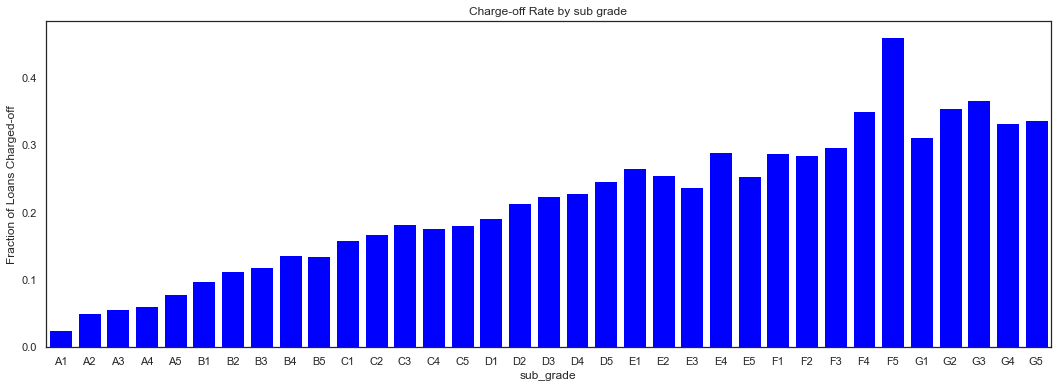

In [125]:
#sprawdzam ilość niespłaconych pożyczek w podziale na sub grade
charge_off_rates = df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='blue', saturation=1)
plt.ylabel('Fraction of Loans Charged-off')
plt.title('Charge-off Rate by sub grade')

Widać z wykresu, że ilość niespałconych pożyczek rośnie wraz z pogarszającą się oceną ratingu kredytowego.

**2.13 DTI**  
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [126]:
round(df['dti'].describe(),2)

count    42536.00
mean        13.37
std          6.73
min          0.00
25%          8.20
50%         13.47
75%         18.68
max         29.99
Name: dti, dtype: float64

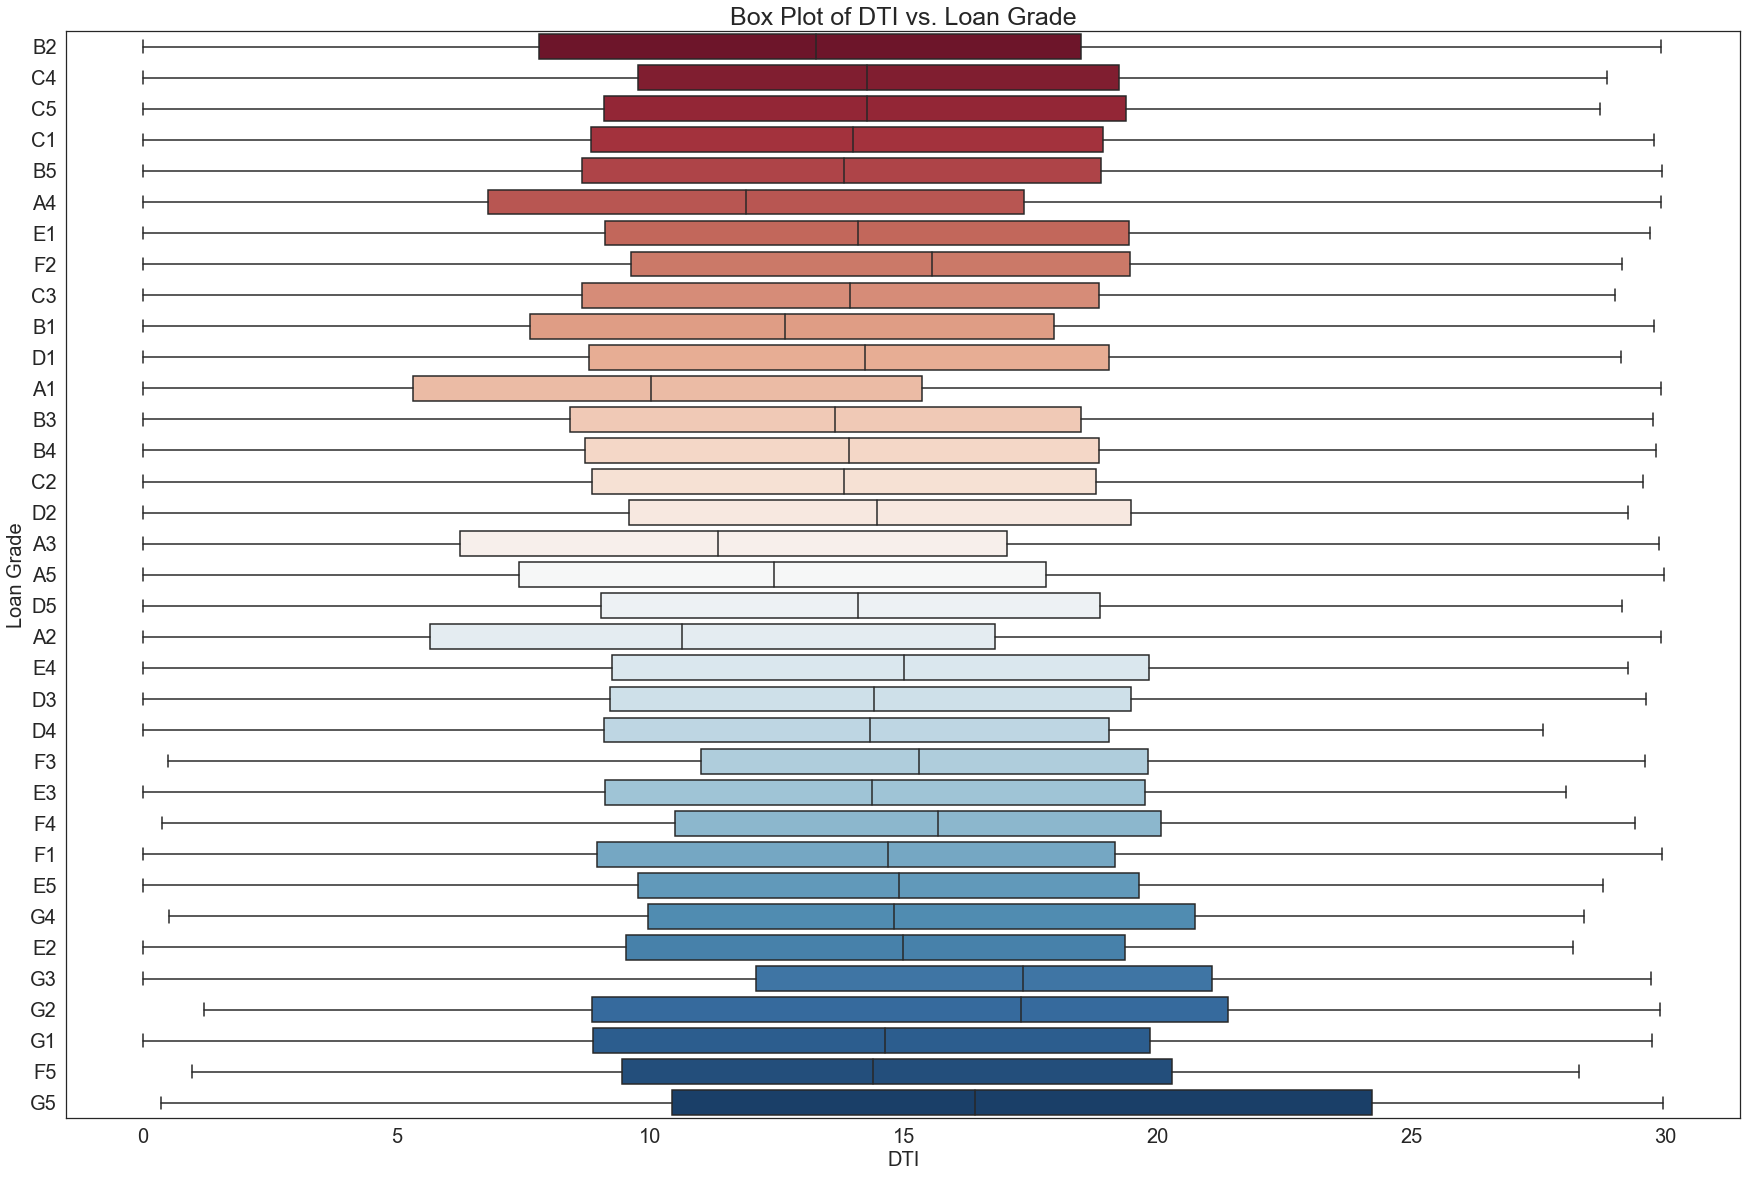

In [127]:
#sprawdzam wartość DTI pożyczkobiorcy w porównaniu z klasyfikacją kredytową
plt.figure(figsize=(30,20))
sns.boxplot(x='dti', y='sub_grade', data=df, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Współczynnik DTI można obliczyć, biorąc miesięczne spłaty wszystkich zobowiązań dłużnych, z wyłączeniem kredytu hipotecznego, podzielone przez deklarowany przez siebie miesięczny dochód. Posiadanie niższego DTI skutkuje lepszą oceną kredytu. Co potwierdzają obserwacje. Patrząc na ten wykres pudełkowy, pożyczkobiorcy posiadający pożyczki kategorii „A” mają najniższy średni DTI. 

In [128]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,14.045559,6.655208,0.0,9.065,14.34,19.36,29.96
Fully Paid,36105.0,13.253255,6.731854,0.0,8.050,13.31,18.56,29.99


Różnica DTI dla obu statusów jest niewielka.

**2.14 Verification status**  
Indicates if income was verified by LC, not verified, or if the income source was verified

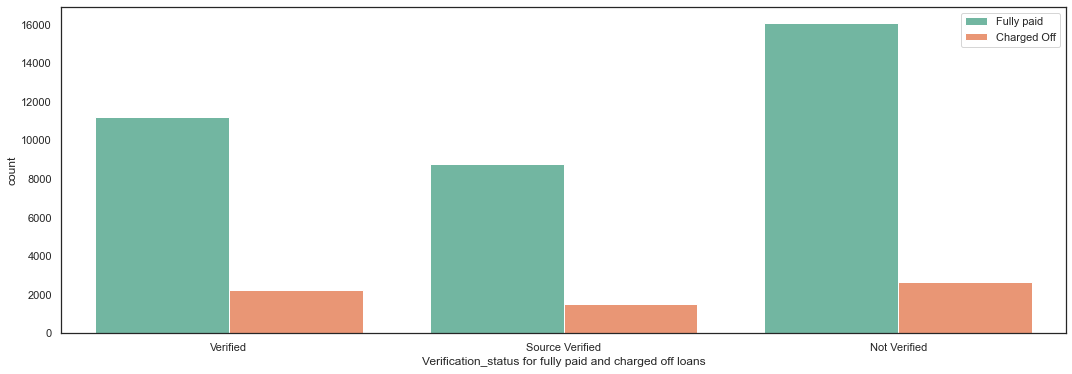

In [129]:
#sprawdzam korelację między targetem a statusem weryfikacji źródła dochodu prze LC
sns.countplot(data=df, x='verification_status', hue = 'loan_status', palette= 'Set2')
plt.xlabel('Verification_status for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

Status weryfikacji źródła dochodu nie wiąże się z prawdopodobieństwem wykonania/niewykonania zobowiązania.

**2.15 Revol bal, Revol util**  
Total credit revolving balance.  
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [130]:
round(df['revol_bal'].describe(),2)

count      42536.00
mean       14297.86
std        22018.18
min            0.00
25%         3635.50
50%         8821.50
75%        17250.50
max      1207359.00
Name: revol_bal, dtype: float64

In [131]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,15194.459182,27942.810425,0.0,3888.0,9071.0,17775.0,1207359.0
Fully Paid,36105.0,14138.159392,20782.887810,0.0,3604.0,8786.0,17137.0,952013.0


Nie ma dużej różnicy w saldzie w zależności od statusu.

In [132]:
round(df['revol_util'].describe(),2)

count    42536.00
mean        49.12
std         28.33
min          0.00
25%         25.80
50%         49.60
75%         72.60
max        119.00
Name: revol_util, dtype: float64

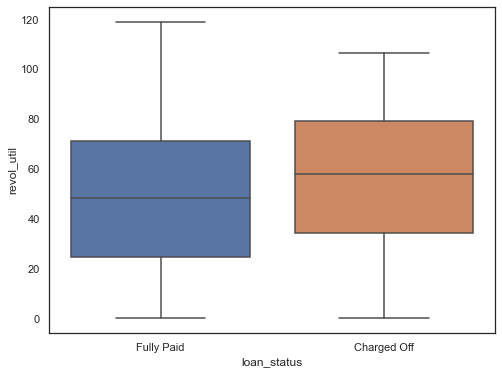

In [133]:
#sprawdzam korelację między targetem a stopą wykorzystania linii odnawialnej 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='revol_util')

In [134]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,55.515669,27.980458,0.0,34.4,58.1,79.2,106.5
Fully Paid,36105.0,47.977456,28.245112,0.0,24.5,48.2,71.2,119.0


Im wyższa stopa to większe prawdopodobieństwo niewykonania zobowiązania.

**2.16 Open acc, Total acc**  
The number of open credit lines in the borrower's credit file.  
The total number of credit lines currently in the borrower's credit file.

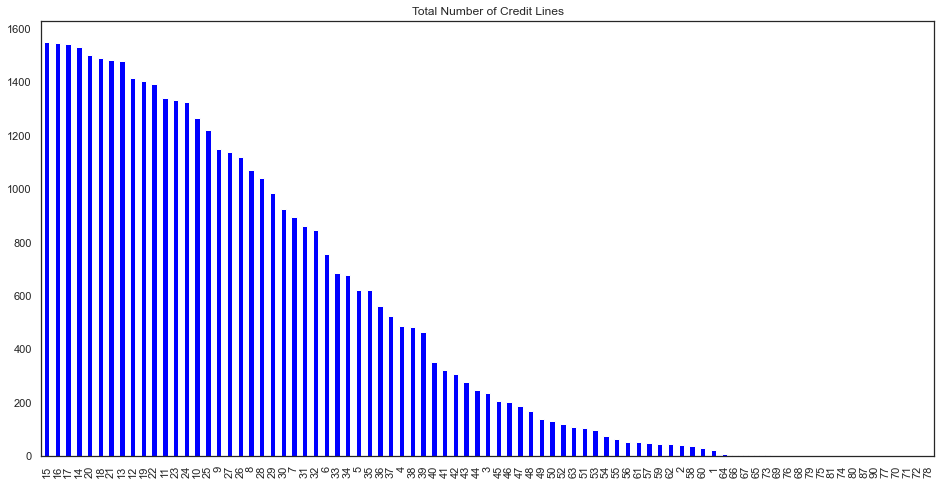

In [135]:
#sprawdzam ilość wszystkich lini kredytowych
Total = df.total_acc.value_counts()
Total.plot(kind = 'bar',figsize=(16,8),color='blue', title = 'Total Number of Credit Lines')

In [136]:
round(df.groupby('loan_status')['total_acc'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,21.54,11.80,1.0,13.0,20.0,29.0,74.0
Fully Paid,36105.0,22.23,11.55,1.0,14.0,21.0,29.0,90.0


Mała różnica wyników między statusami

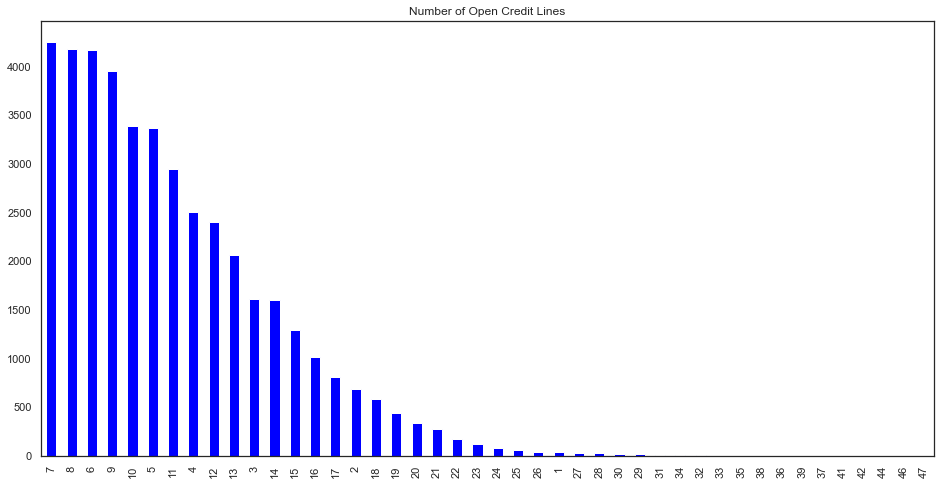

In [137]:
#sprawdzam ilość otwartych lini kredytowych
Open = df.open_acc.value_counts()
Open.plot(kind = 'bar',figsize=(16,8),color='blue', title = 'Number of Open Credit Lines')

In [138]:
round(df.groupby('loan_status')['open_acc'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,9.28,4.70,1.0,6.0,9.0,12.0,47.0
Fully Paid,36105.0,9.36,4.46,1.0,6.0,9.0,12.0,46.0


Mała różnica wyników między statusami

**2.17 Installment**  
The monthly payment owed by the borrower if the loan originates.

In [139]:
round(df['installment'].describe(),2)

count    42536.00
mean       322.62
std        208.92
min         15.67
25%        165.54
50%        277.70
75%        428.16
max       1305.19
Name: installment, dtype: float64

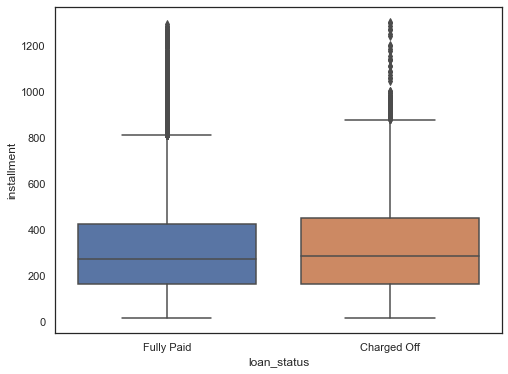

In [140]:
#sprawdzam korelację między targetem a wysokością miesięcznej raty
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='installment')

Wysokość miesięcznej raty dla niespłaconych pożyczek wydaje się być nieco wyższa.

In [141]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,333.065170,216.947734,15.91,167.75,287.41,452.98,1305.19
Fully Paid,36105.0,320.763121,207.411111,15.67,164.91,276.06,424.53,1295.21


Pożyczki, które nie zostały spłacone mają ratę o ok 13 $ wyższą niż pożyczki spłacone.

**2.18 Inq last 6mths**  
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

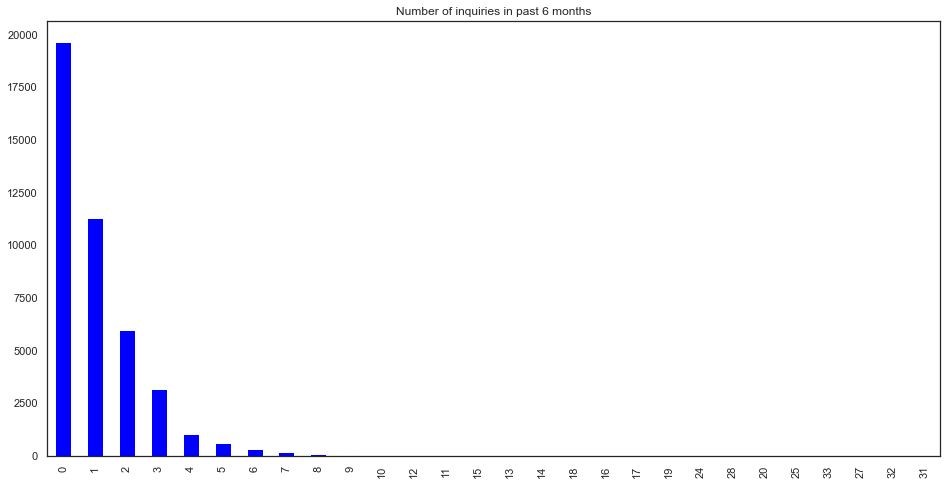

In [142]:
#sprawdzam ilość innych zapytań kredytowych w ciągu ostatnich 6 miesięcy
credit_activity = df.inq_last_6mths.value_counts()
credit_activity.plot(kind = 'bar',figsize=(16,8),color='blue', title = 'Number of inquiries in past 6 months')

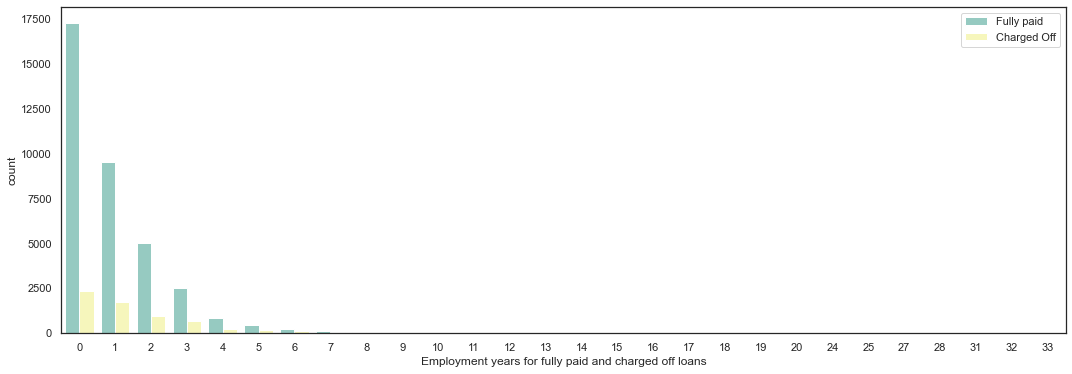

In [143]:
#sprawdzam korelację między targetem a ilością innych zapytań
sns.countplot(data=df, x='inq_last_6mths', hue = 'loan_status', palette= 'Set3')
plt.xlabel('Employment years for fully paid and charged off loans')
plt.legend( loc='upper right', labels=['Fully paid', 'Charged Off'])

In [144]:
df.groupby('loan_status')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6431.0,1.482507,1.958821,0.0,0.0,1.0,2.0,33.0
Fully Paid,36105.0,1.009916,1.424658,0.0,0.0,1.0,2.0,31.0


Niewielka jednak wyższa ilość zapytań o pożyczkę występuje u pożyczkobiorców, którzy niewywiązali się z zobowiązania.

# Część 3 - Feature Engineering 

**Import potrzebnych bibliotek**

In [145]:
from sklearn.preprocessing import LabelEncoder

Nowe zmienne już utworzone:
- FICO_score_in
- FICO_rating_in
- credit_age
- date_features
- log_annual_inc

In [146]:
df_model = pd.concat([df, date_features], axis=1)

In [147]:
#tworzę zmienną 'credit_hist_length' dla długości wieku kredytowego
x = []

for row in df_model['credit_age']:
    if row < 3200:
        x.append('Low')
    elif row>=3200 and row <6200:
        x.append('Medium')
    else:
        x.append('High')
df_model['credit_hist_length']=x
df_model['credit_hist_length']

0          High
1        Medium
2        Medium
3        Medium
4        Medium
          ...  
42531       Low
42532       Low
42533       Low
42534       Low
42535       Low
Name: credit_hist_length, Length: 42536, dtype: object

In [148]:
#tworzę zmienną 'home_ownership_category'
y = []

for row in df_model['home_ownership']:
    if row == 'OWN' or row == 'MORTGAGE':
        y.append('home_positive')
    elif row in ['RENT', 'OTHER', 'NONE']:
        y.append('home_negative')
    else:
        y.append('unknown')
df_model['home_ownership_category']=y
df_model['home_ownership_category']

0        home_negative
1        home_negative
2        home_negative
3        home_negative
4        home_negative
             ...      
42531    home_negative
42532    home_negative
42533    home_negative
42534    home_negative
42535    home_positive
Name: home_ownership_category, Length: 42536, dtype: object

In [149]:
df_model['home_ownership_category'].value_counts()

home_positive    22210
home_negative    20326
Name: home_ownership_category, dtype: int64

In [150]:
# Uzyskuję procent dla każdego stanu , tam gdzie pożyczki nie zostały spłacone
states_pct = df_model.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()
# tworzę funkcję
def labeling_func(pct):
    if pct <= 0.1:
        return 'low'
    elif pct <= 0.2:
        return 'medium'
    else:
        return 'high'
# tworzę słownik
states_labels = dict(states_pct.map(labeling_func))
# Stany gdzie 100% pożyczek zostało spłąconych nie są wliczone
states_perfect = [state for state in df_model['addr_state'].unique() if state not in states_labels]
# Te stany trafiają do kategorii "niskie ryzyko"
for state in states_perfect:
    if pd.isna(state):
        states_labels[state] = 'medium'
    else:
        states_labels[state] = 'low'
# tworzę nową zmienną
df_model['state_label'] = df_model['addr_state'].map(lambda x: states_labels[x])

In [151]:
df_model.head()

,addr_state,dti,emp_length,funded_amnt,funded_amnt_inv,home_ownership,installment,int_rate,loan_amnt,open_acc,...,FICO_rating_in,log_annual_inc,credit_age,year,month,weekofyear,quarter,credit_hist_length,home_ownership_category,state_label
0,AZ,27.65,10,5000.0,4975.0,RENT,162.87,10.65,5000.0,3,...,Good,4.380211,9830,2011,12,48,4,High,home_negative,medium
1,GA,1.00,0,2500.0,2500.0,RENT,59.83,15.27,2500.0,3,...,Very Good,4.477121,4627,2011,12,48,4,Medium,home_negative,medium
2,IL,8.72,10,2400.0,2400.0,RENT,84.33,15.96,2400.0,2,...,Good,4.088207,3682,2011,12,48,4,Medium,home_negative,medium
3,CA,20.00,10,10000.0,10000.0,RENT,339.31,13.49,10000.0,10,...,Good,4.691965,5782,2011,12,48,4,Medium,home_negative,medium
4,OR,17.94,1,3000.0,3000.0,RENT,67.79,12.69,3000.0,15,...,Good,4.903090,5813,2011,12,48,4,Medium,home_negative,medium


**Kodowanie**

In [152]:
df_model.shape

(42536, 31)

In [153]:
df_model.dtypes

addr_state                  object
dti                        float64
emp_length                   int64
funded_amnt                float64
funded_amnt_inv            float64
home_ownership              object
installment                float64
int_rate                   float64
loan_amnt                  float64
open_acc                     int64
purpose                     object
revol_bal                  float64
revol_util                 float64
inq_last_6mths               int64
sub_grade                   object
term                         int64
total_acc                    int64
verification_status         object
delinq_2yrs                float64
loan_status                 object
FICO_score_in              float64
FICO_rating_in              object
log_annual_inc             float64
credit_age                   int64
year                         int64
month                        int64
weekofyear                   int64
quarter                      int64
credit_hist_length  

In [154]:
#koduję target
df_model.loan_status=df_model.loan_status.astype('category').cat.codes
df_model.head()
df_model['loan_status'].value_counts()

1    36105
0     6431
Name: loan_status, dtype: int64

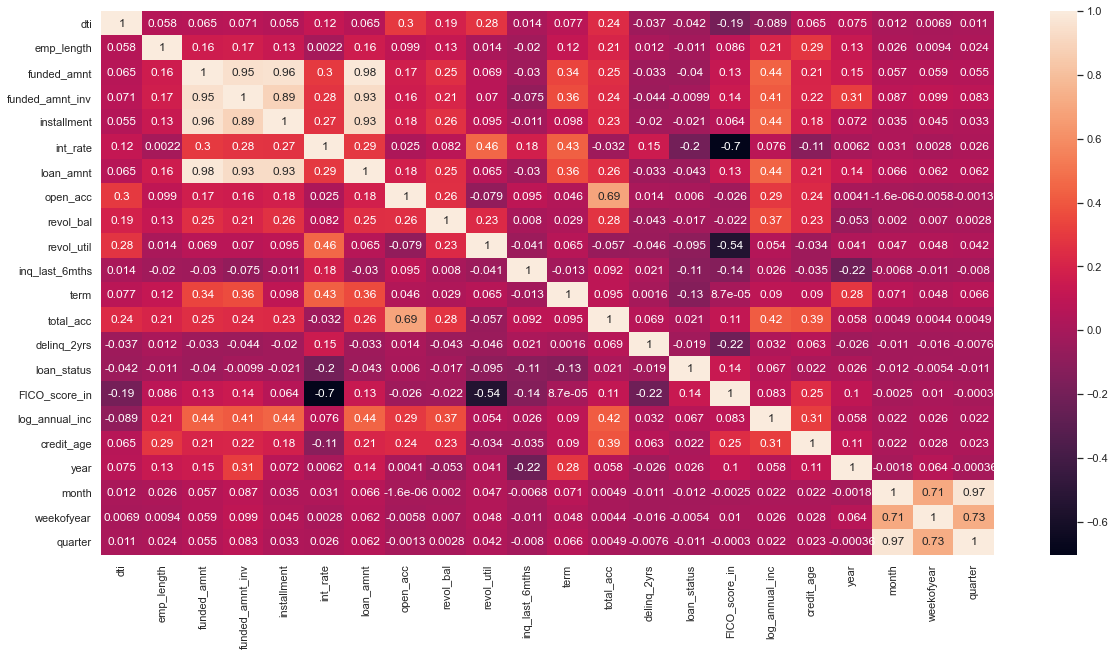

In [155]:
#sprawdzam korelację między zmiennymi. Chciałam sprawdzić, które zmienne liczbowe są najbardziej skorelowane, by sprawdzić i usunąć ouliersy.
plt.figure(figsize = (20,10))       
sns.heatmap(df_model.corr(),annot = True)

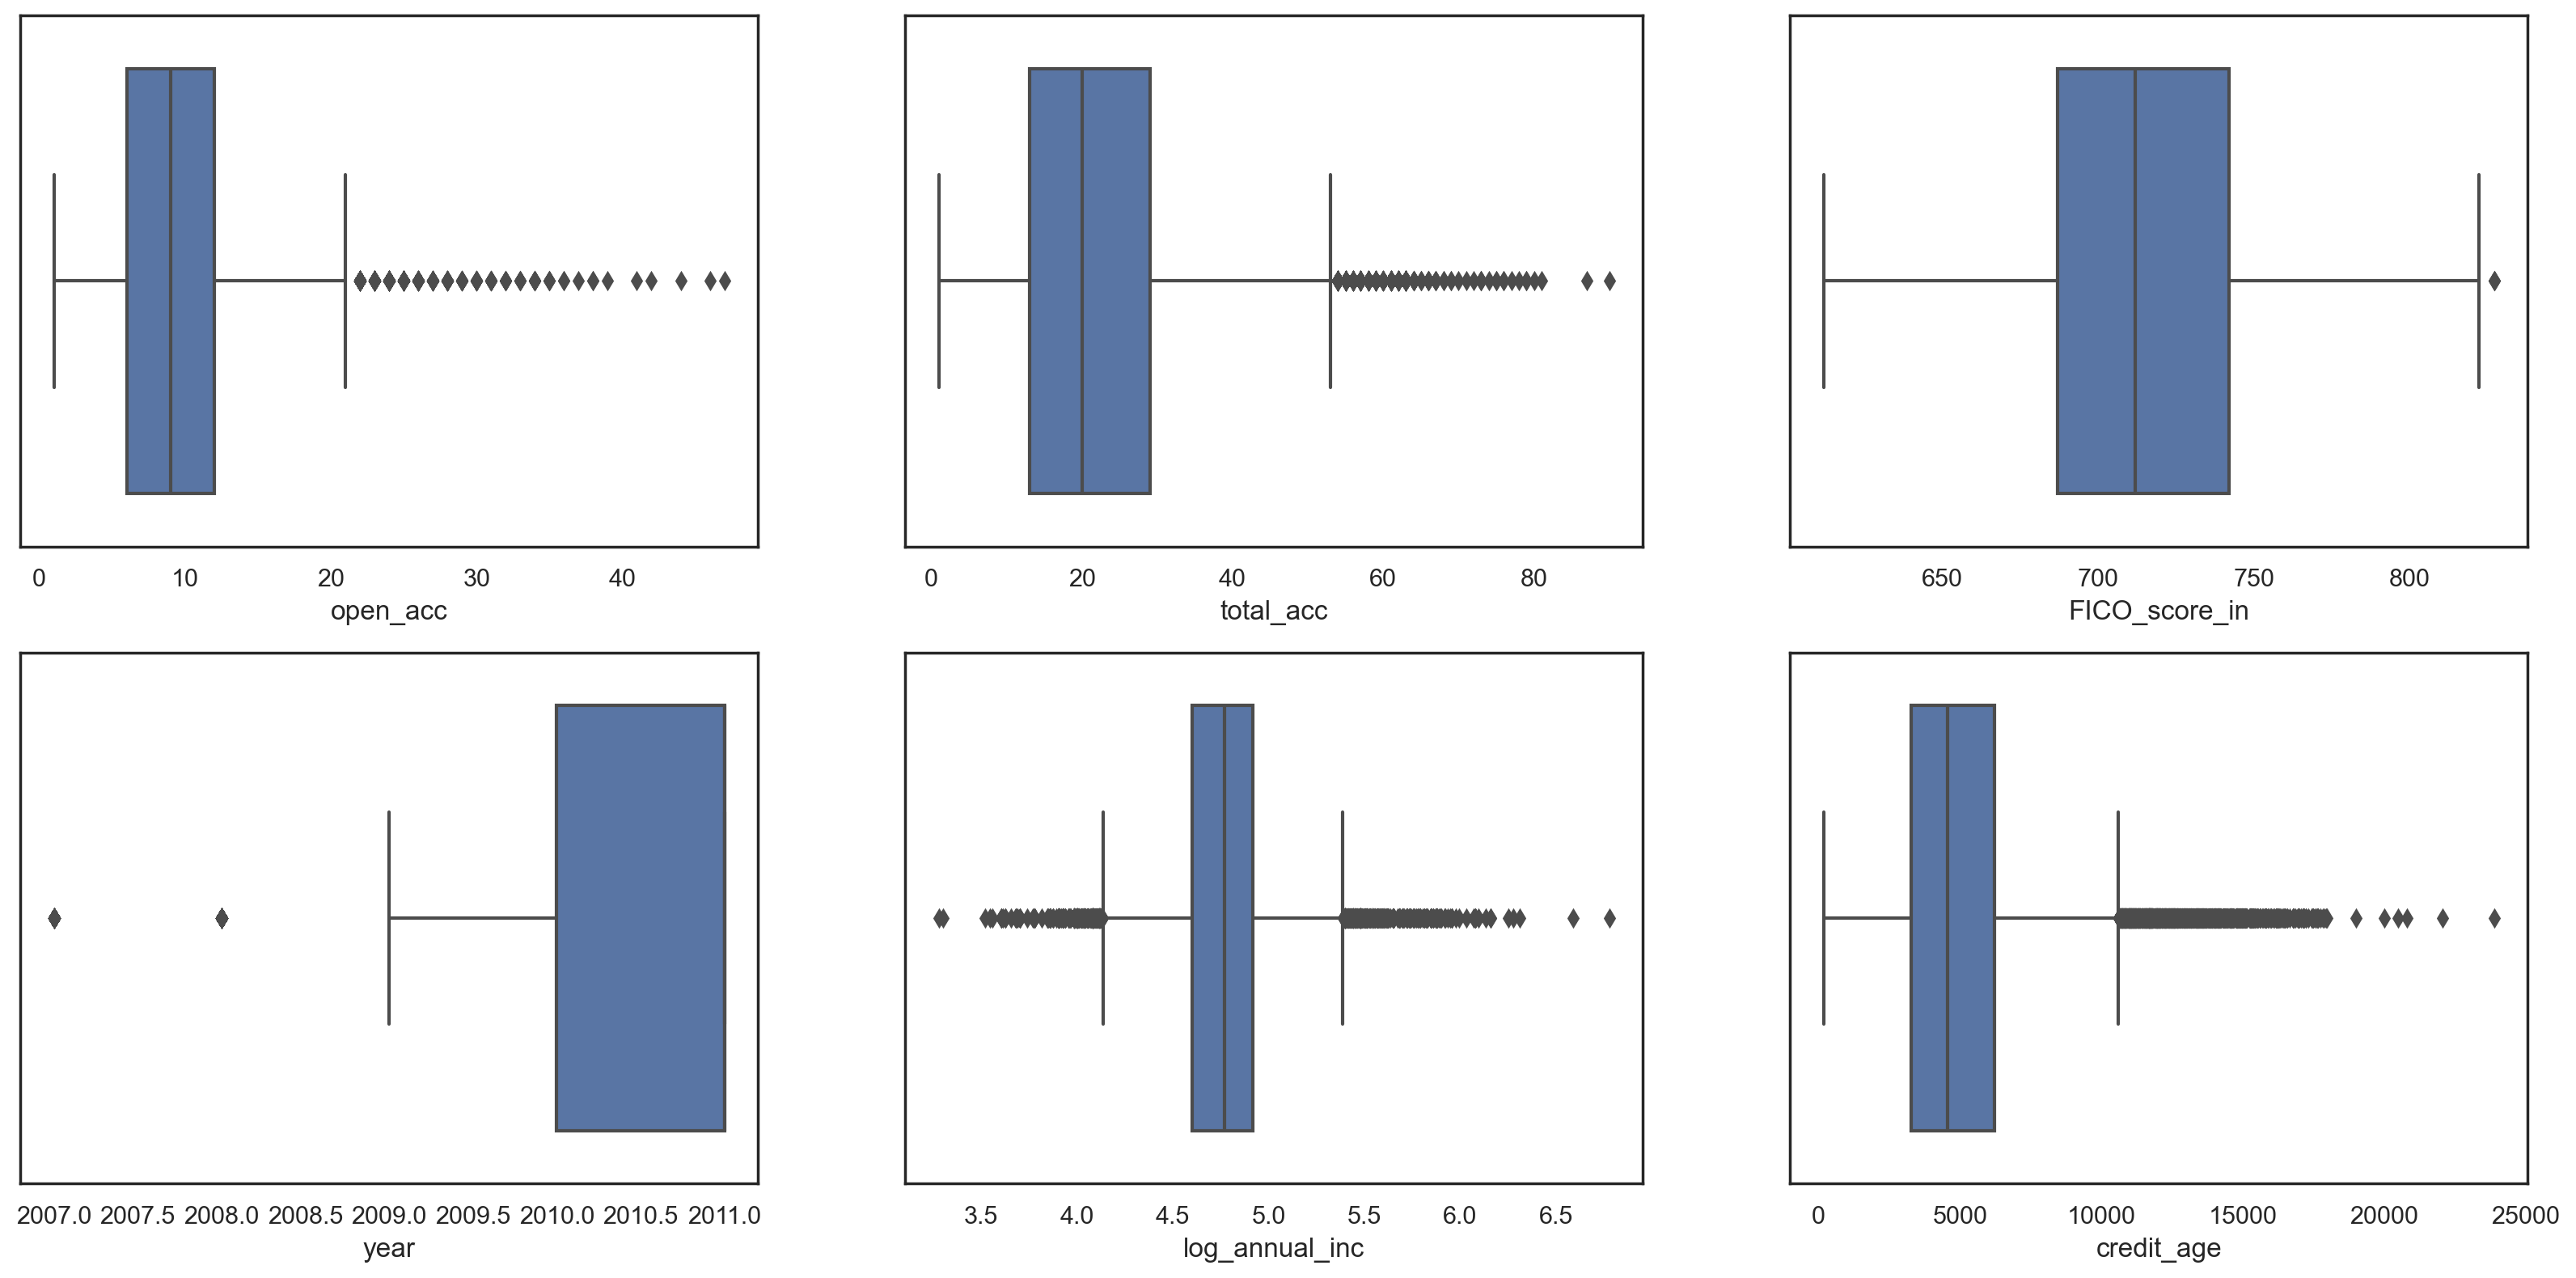

In [156]:
# sprawdzamy outliersy dla zmiennych z dodatnią korelacją

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'open_acc', data = df_model)

plt.subplot(4,3,2)
sns.boxplot(x = 'total_acc', data = df_model)

plt.subplot(4,3,3)
sns.boxplot(x = 'FICO_score_in', data = df_model)

plt.subplot(4,3,4)
sns.boxplot(x = 'year', data = df_model)

plt.subplot(4,3,5)
sns.boxplot(x = 'log_annual_inc', data = df_model)

plt.subplot(4,3,6)
sns.boxplot(x = 'credit_age', data = df_model)

In [157]:
df_model.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

addr_state                 50
home_ownership              5
purpose                    14
sub_grade                  35
verification_status         3
FICO_rating_in              4
credit_hist_length          3
home_ownership_category     2
state_label                 3
dtype: int64

In [158]:
# mapuję rating FICO
df_model['FICO_rating_in'] = df_model['FICO_rating_in'].map({'Fair' : 0, 'Good' : 1, 'Very Good' : 2, 'Exceptional' : 3})

In [159]:
#koduję zmianną kategoryczną za pomocą LabelEncoder
labelencoder = LabelEncoder()

df_model['sub_grade'] = labelencoder.fit_transform(df_model['sub_grade'])
df_model['sub_grade']

0         6
1        13
2        14
3        10
4         9
         ..
42531    10
42532     8
42533     7
42534     4
42535     2
Name: sub_grade, Length: 42536, dtype: int32

In [160]:
#koduję pozostałe zmienne kategoryczne za pomocą get.dummies
df_model = pd.get_dummies(df_model, columns=['home_ownership', 'verification_status', 'purpose', 'addr_state', 'home_ownership_category', 'credit_hist_length', 'state_label'], drop_first=True)

In [161]:
df_model.head()

,dti,emp_length,funded_amnt,funded_amnt_inv,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_category_home_positive,credit_hist_length_Low,credit_hist_length_Medium,state_label_low,state_label_medium
0,27.65,10,5000.0,4975.0,162.87,10.65,5000.0,3,13648.0,83.7,...,0,0,0,0,0,0,0,0,0,1
1,1.00,0,2500.0,2500.0,59.83,15.27,2500.0,3,1687.0,9.4,...,0,0,0,0,0,0,0,1,0,1
2,8.72,10,2400.0,2400.0,84.33,15.96,2400.0,2,2956.0,98.5,...,0,0,0,0,0,0,0,1,0,1
3,20.00,10,10000.0,10000.0,339.31,13.49,10000.0,10,5598.0,21.0,...,0,0,0,0,0,0,0,1,0,1
4,17.94,1,3000.0,3000.0,67.79,12.69,3000.0,15,27783.0,53.9,...,0,0,0,0,0,0,0,1,0,1


In [162]:
df_model.shape

(42536, 97)

In [163]:
#sprawdzam, czy są puste pola
df_model.isnull().any().any()

False

In [164]:
# Zmieniam outliers na medianę
for col_name in df_model.drop(axis = 1, columns = 'loan_status').columns:
    q1 = df_model[col_name].quantile(0.25)
    q3 = df_model[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_model.loc[(df_model[col_name] < low) | (df_model[col_name] > high), col_name] = df_model[col_name].median()

In [165]:
df_model.sample(5)

,dti,emp_length,funded_amnt,funded_amnt_inv,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_category_home_positive,credit_hist_length_Low,credit_hist_length_Medium,state_label_low,state_label_medium
17030,20.87,10.0,4500.0,4500.000000,154.99,14.54,4500.0,6.0,9580.0,31.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
10327,29.92,6.0,6375.0,6375.000000,193.92,5.99,6375.0,17.0,10183.0,12.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
13358,11.53,4.0,10000.0,10000.000000,336.90,12.99,10000.0,9.0,9994.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7949,19.66,10.0,14775.0,13200.000000,324.87,11.49,20000.0,16.0,19542.0,20.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7634,4.08,10.0,15000.0,14495.317756,303.43,7.90,15000.0,6.0,1023.0,15.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Część 4 - Modelowanie

**Import potrzebnych bibliotek**

In [166]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import pipeline
from sklearn import model_selection
from sklearn import preprocessing
!pip install imblearn
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [167]:
df_model.shape

(42536, 97)

In [168]:
X = df_model.drop('loan_status',axis=1)
y = df_model['loan_status']

**Klasteryzacja**

**Hierarchical clustering**

In [169]:
df_model.shape

(42536, 97)

In [170]:
'''By zobrazować proces grupowania, będę wizualizować obserwacje, wraz z informacją o grupie, do której zostały przypisane.
Problematyczne byłoby użycie 94-wymiarowej przestrzeni, dlatego używając PCA zmniejszę liczbę wymiarów do 2'''

pca2 = PCA(n_components=2)
df_pca = pca2.fit_transform(X)
df_hc = pd.DataFrame(df_pca, columns=['c1', 'c2'], index=df_model.index)

In [171]:
df_hc.head()

,c1,c2
0,-6023.513484,7391.570418
1,-15574.132118,-1419.039369
2,-15194.446220,-243.024563
3,-2197.761279,-3865.787881
4,-2829.623175,21397.872350


In [172]:
# Sprawdzam podstawowe statystyki zbioru
df_hc.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

,c1,c2
mean,-0.00,0.00
median,-1864.87,-823.57
std,11271.68,7346.83
min,-19817.64,-22890.30
max,38963.80,31491.01


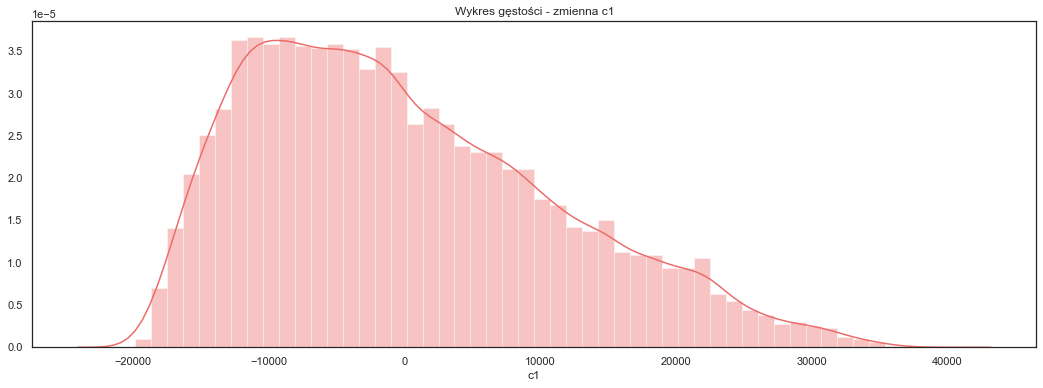

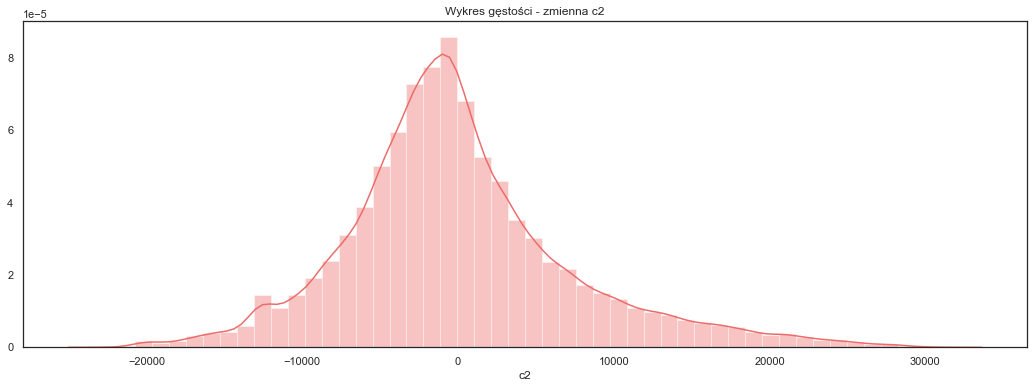

In [173]:
sns.distplot(df_hc.c1, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
sns.distplot(df_hc.c2, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

In [174]:
# Usuwam wartości ujemne
for col in df_hc:
    if df_hc[col].min() <= 0:
        df_hc[col] = df_hc[col] + np.abs(df_hc[col].min()) + 1

In [175]:
# Usuwam skośność zmiennych
df_hc = np.log(df_hc)

In [176]:
# Usuwam wartości odstające
q1 = df_hc.quantile(0.25)
q3 = df_hc.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df_hc[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df_hc[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [177]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,7.910011,11.590983,599,0
c2,9.316601,10.688680,1804,602


In [178]:
# W pętli usuwam wszystkie obserwacje, które nie spełniają dwóch warunków
for row in outliers.iterrows():
    df_hc = df_hc[(df_hc[row[0]] >= row[1]['lower_boundary']) & (df_hc[row[0]] <= row[1]['upper_boundary'])]

In [179]:
# Wykonuję standaryzację zmiennych
scaler = StandardScaler()
scaler.fit(df_hc)
df_st = scaler.transform(df_hc)
df_hc = pd.DataFrame(data=df_st, index=df_hc.index, columns=df_hc.columns)

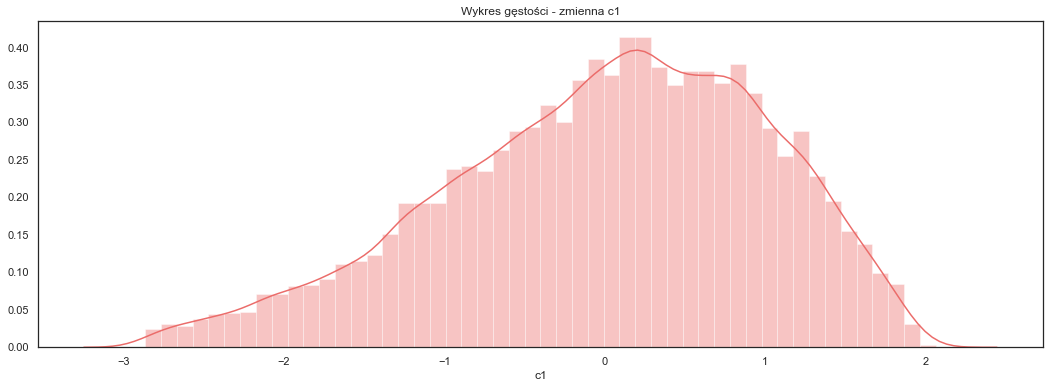

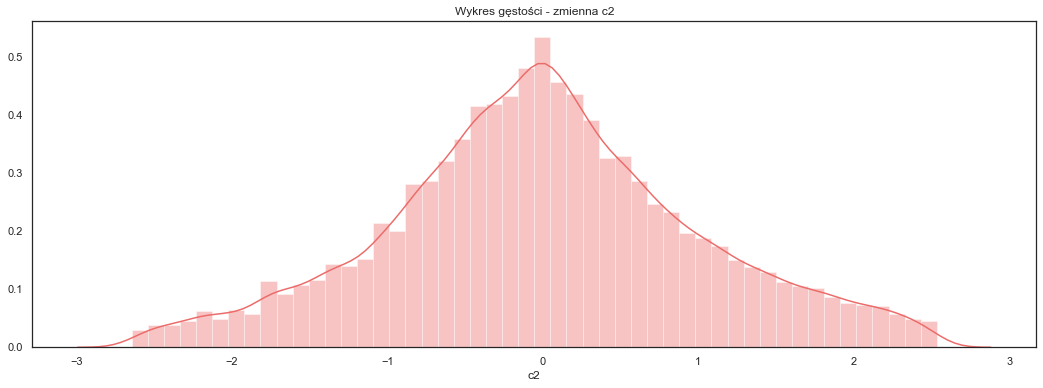

,c1,c2
mean,-0.00,0.00
std,1.00,1.00
max,2.06,2.54
min,-2.86,-2.64


In [180]:
# Ponownie sprawdzam rozkłady zmiennych i podstawowe statystyki zbioru
sns.distplot(df_hc.c1, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
sns.distplot(df_hc.c2, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna c2')
plt.show()
df_hc.agg(['mean', 'std', 'max', 'min']).round(2)

In [181]:
# Zbyt duża liczba obserwacji nieco utrudni obserwację klastrów na wykresie. Pozostawię zatem 1000 obserwacji
df_hc = df_hc.sample(1000, random_state=1)

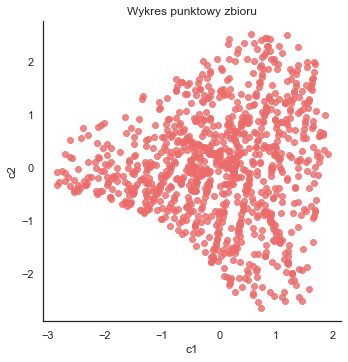

In [182]:
# Sprawdzam jak prezentują się wylosowane obserwacje na płaszczyźnie dwuwymiarowej
sns.lmplot('c1', 'c2', data = df_hc, scatter_kws={"color": "#eb6c6a"}, fit_reg=False).set(title = 'Wykres punktowy zbioru')
plt.show()

**Grupowanie z użyciem biblioteki sklearn**

Wykonam grupowanie, w którym miarą odległości będzie **odległość euklidesowa**, natomiast jako metodę łączenia grup obiorę **kryterium Warda**.

In [183]:
# Po sprawdzeniu na wykresie liczby grup od 3 do 6, najlepszy parametr to 3
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3).fit(df_hc)

In [184]:
# Nowa zmienna oznacza grupę, do jakiej przypisano daną obserwację
df_hc['HR_label_1'] = model_1.labels_

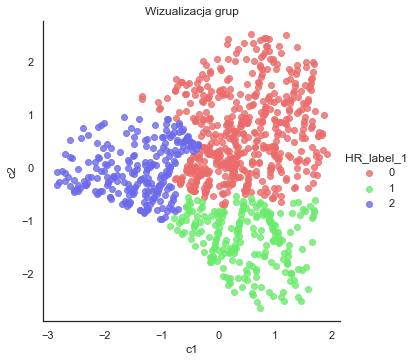

In [185]:
sns.lmplot('c1', 'c2', data = df_hc, hue = 'HR_label_1', fit_reg=False, palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb']).set(title='Wizualizacja grup')
plt.show()

**Grupowanie z użyciem biblioteki SciPy**

ta metoda względem sklearn ma kilka plusów:
- Podziału na grupy można dokonać, korzystając z innego kryterium niż maksymalna liczba grup.
- Umożliwia ona wizualizację drzewa budowanego w procesie grupowania. Dzięki temu możemy zobaczyć, jak przebiegało grupowanie (możliwa jest ocena jakości grupowania po kształcie drzewa) oraz zdecydować, po jakim dystansie dzielącym obserwację od grupy będziemy budować nową grupę, zamiast łączyć je w jedną.


In [186]:
model_2 = linkage(df_hc.iloc[:,0:2], method = 'ward', metric = 'euclidean')

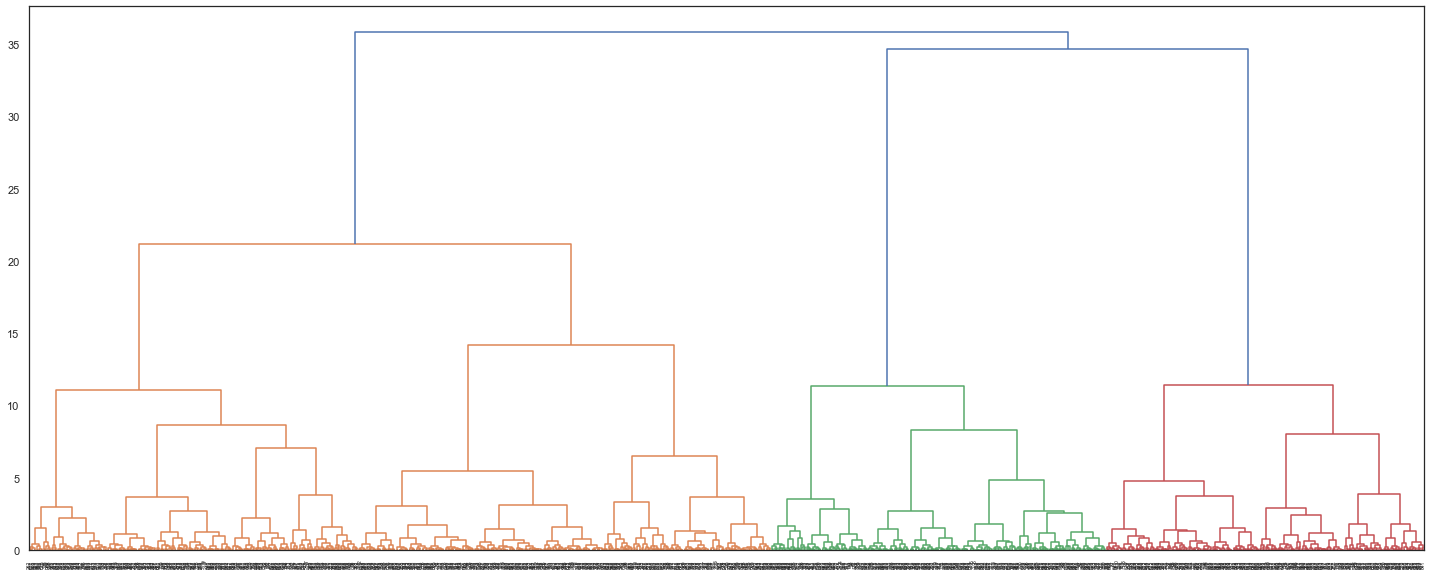

In [187]:
# dendrogram zobrazuje działanie algorytmu
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(model_2)
plt.show()

In [188]:
# Dzielę obserwacje na grupy według wybranego kryterium (maksymalnej liczby grup). Nowa zmienna oznacza grupę, do jakiej przypisano daną obserwację
clusters = fcluster(model_2, 3, criterion='maxclust')
df_hc['HR_label_2'] = clusters

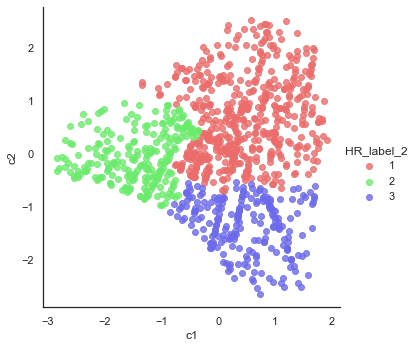

In [189]:
sns.lmplot('c1', 'c2', data = df_hc, fit_reg=False, hue = 'HR_label_2', palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb'])
plt.show()

W przypadku obu modeli otrzymałam identyczne wyniki, co może potwierdzać, że w obu bibliotekach algorytm został zaimplementowany poprawnie.

**K-Means**  
Metoda K-Means tworzy k klastrów, zaczynając od przypadkowego przypisania obserwacji do k klastrów, 
czyli rozrzucenia k punktów w przestrzeni danych wejściowych.

For n_clusters = 2 The average silhouette_score is : 0.43236205182355686
For n_clusters = 3 The average silhouette_score is : 0.4123694132646544
For n_clusters = 4 The average silhouette_score is : 0.354109627682291
For n_clusters = 5 The average silhouette_score is : 0.3508175655440974
For n_clusters = 6 The average silhouette_score is : 0.30451990591910694


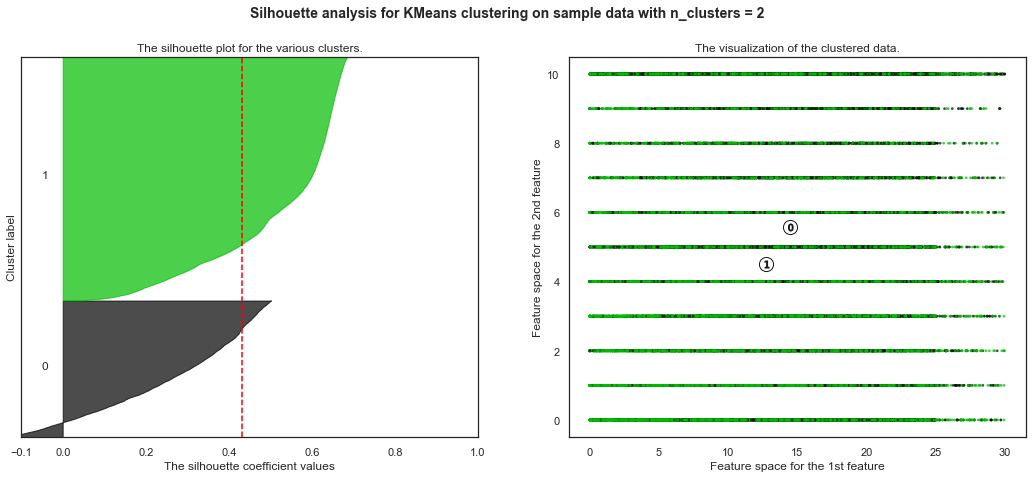

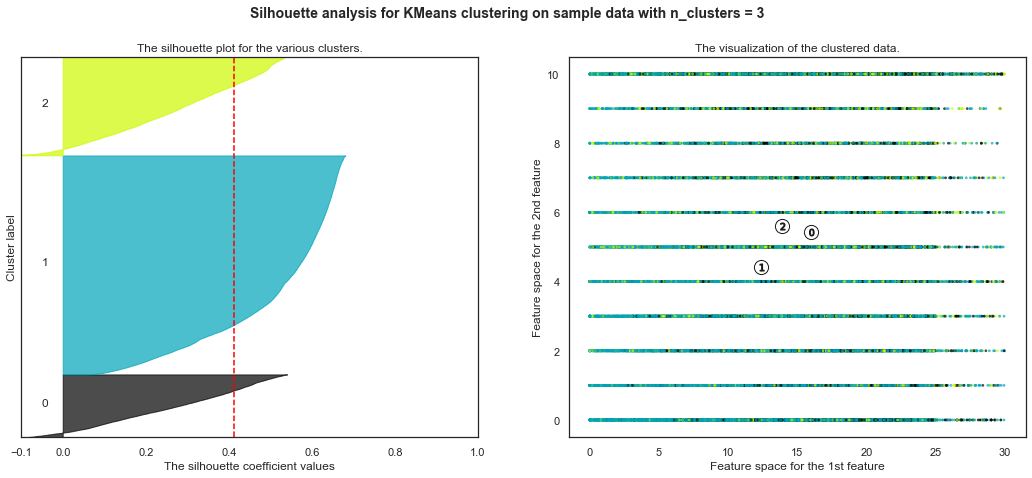

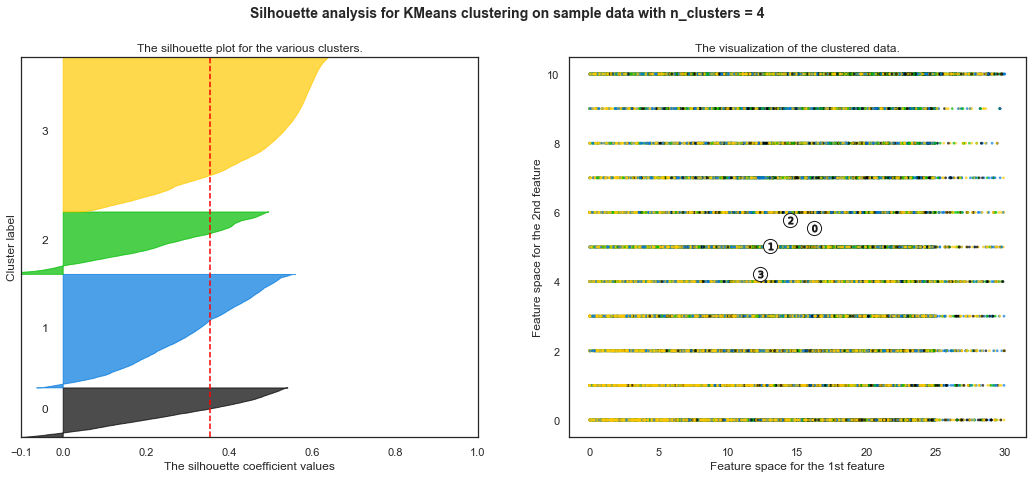

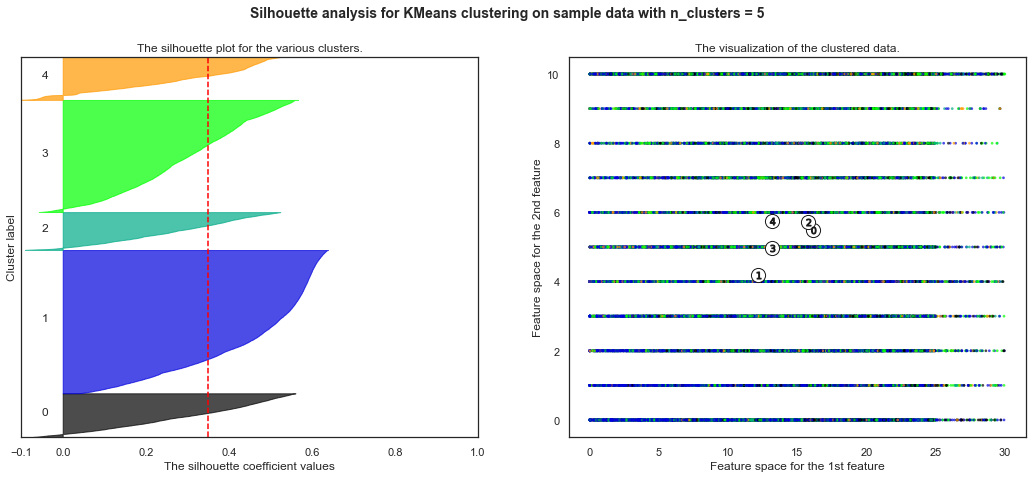

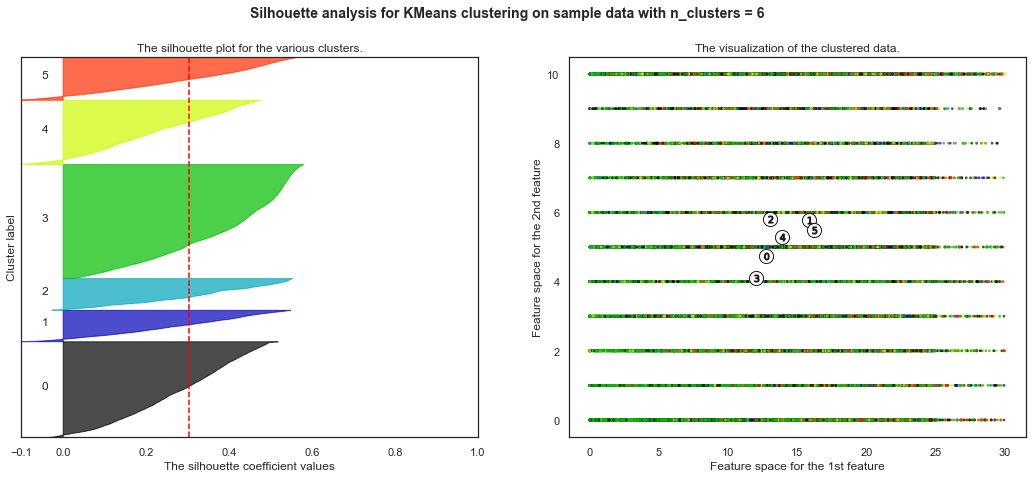

In [190]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

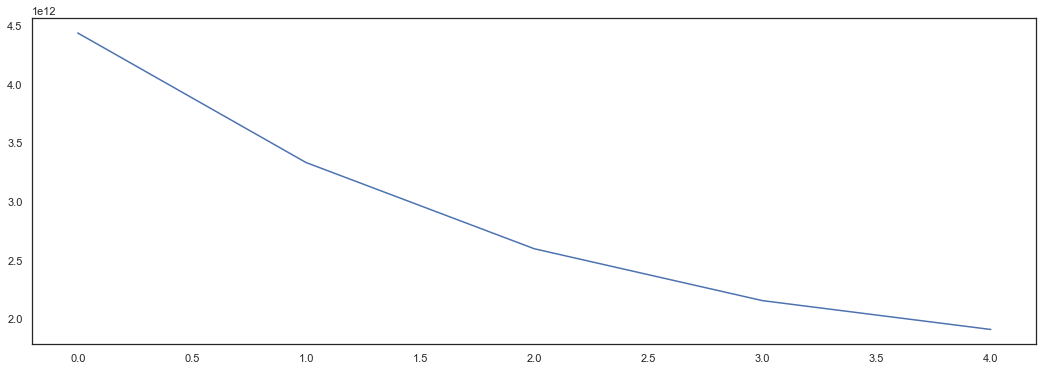

In [191]:
# drugą metodą oceny ile klastrów powinnam zastosować wybieram metodę łokcia - elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6] #sprawdzamy dla danej ilosci klastrów
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
plt.plot(ssd)
# należy wziąć liczbe po ktorej spadek był największy a póxniej juz niewiele zyskamy

In [192]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(df_hc)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [193]:
df_hc['KMeans_labels']=kmeans.labels_

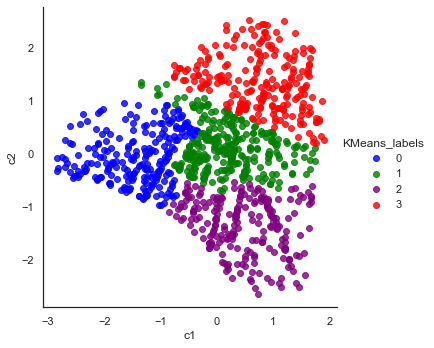

In [194]:
# Plotting resulting clusters

sns.lmplot('c1', 'c2', data = df_hc, fit_reg=False, hue = 'KMeans_labels', palette = ['blue', 'green', 'purple', 'red'])
plt.show()

In [195]:
# zastosowane metody wskazały 4 jako najlepszą liczbę klastrów
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [196]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [197]:
# przypisuję do danych pierwotnych jako nową kolumnę
df_model['K-Means_Cluster_ID'] = kmeans.labels_

In [198]:
df_model.head()

,dti,emp_length,funded_amnt,funded_amnt_inv,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_category_home_positive,credit_hist_length_Low,credit_hist_length_Medium,state_label_low,state_label_medium,K-Means_Cluster_ID
0,27.65,10.0,5000.0,4975.0,162.87,10.65,5000.0,3.0,13648.0,83.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.00,0.0,2500.0,2500.0,59.83,15.27,2500.0,3.0,1687.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
2,8.72,10.0,2400.0,2400.0,84.33,15.96,2400.0,2.0,2956.0,98.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,20.00,10.0,10000.0,10000.0,339.31,13.49,10000.0,10.0,5598.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
4,17.94,1.0,3000.0,3000.0,67.79,12.69,3000.0,15.0,27783.0,53.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


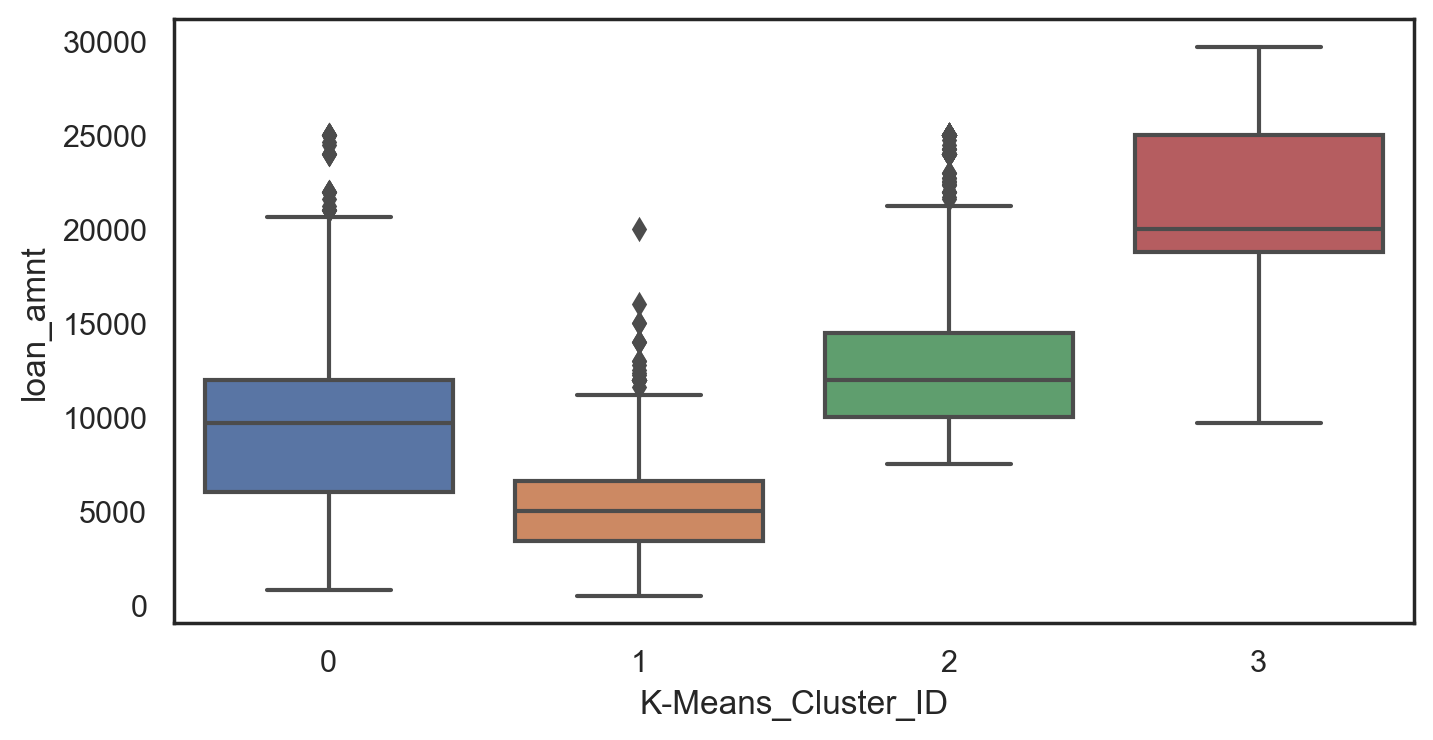

In [199]:
# sprawdzam jak poszczególne obserwacje z danego klastra róźnią sie ze względu na wybrane zmienne
plt.figure(figsize=(8,4),dpi=200) 
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_model)

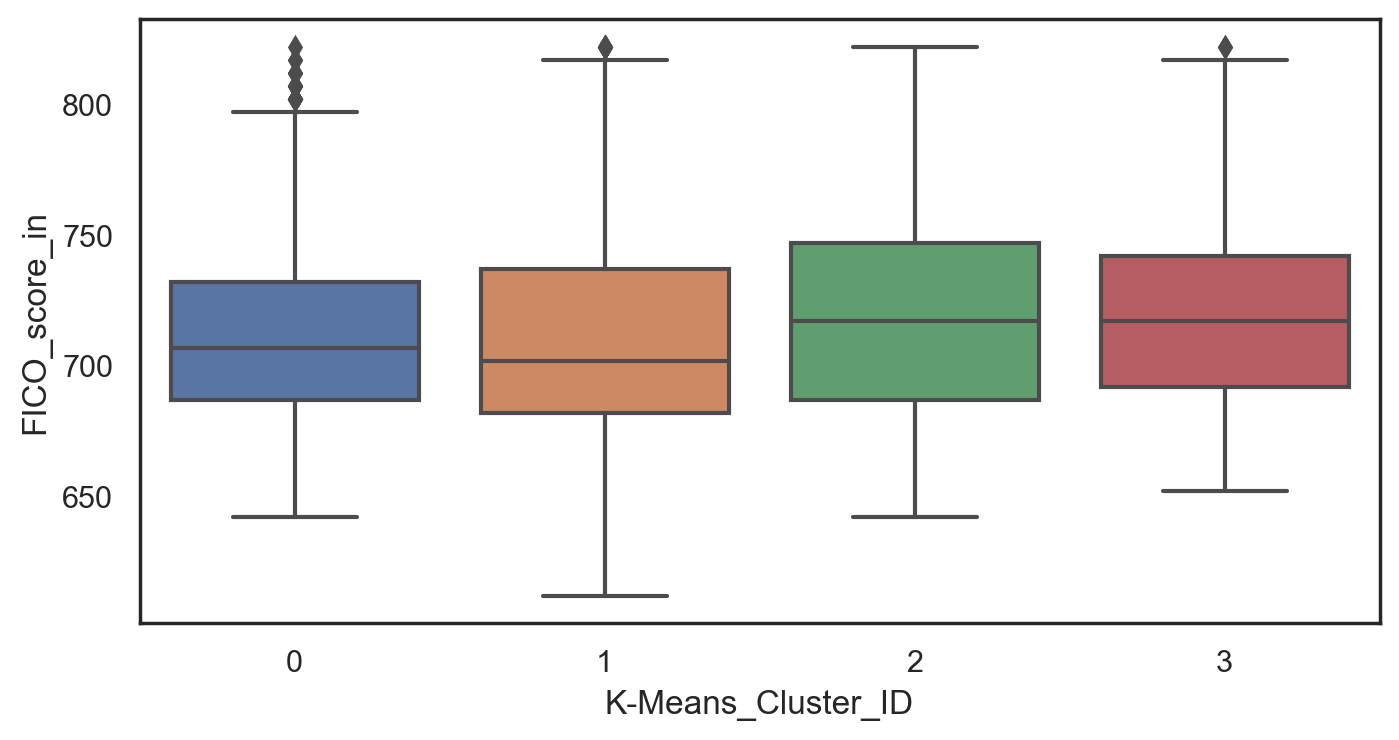

In [200]:
plt.figure(figsize=(8,4),dpi=200) 
sns.boxplot(x='K-Means_Cluster_ID', y='FICO_score_in', data=df_model)

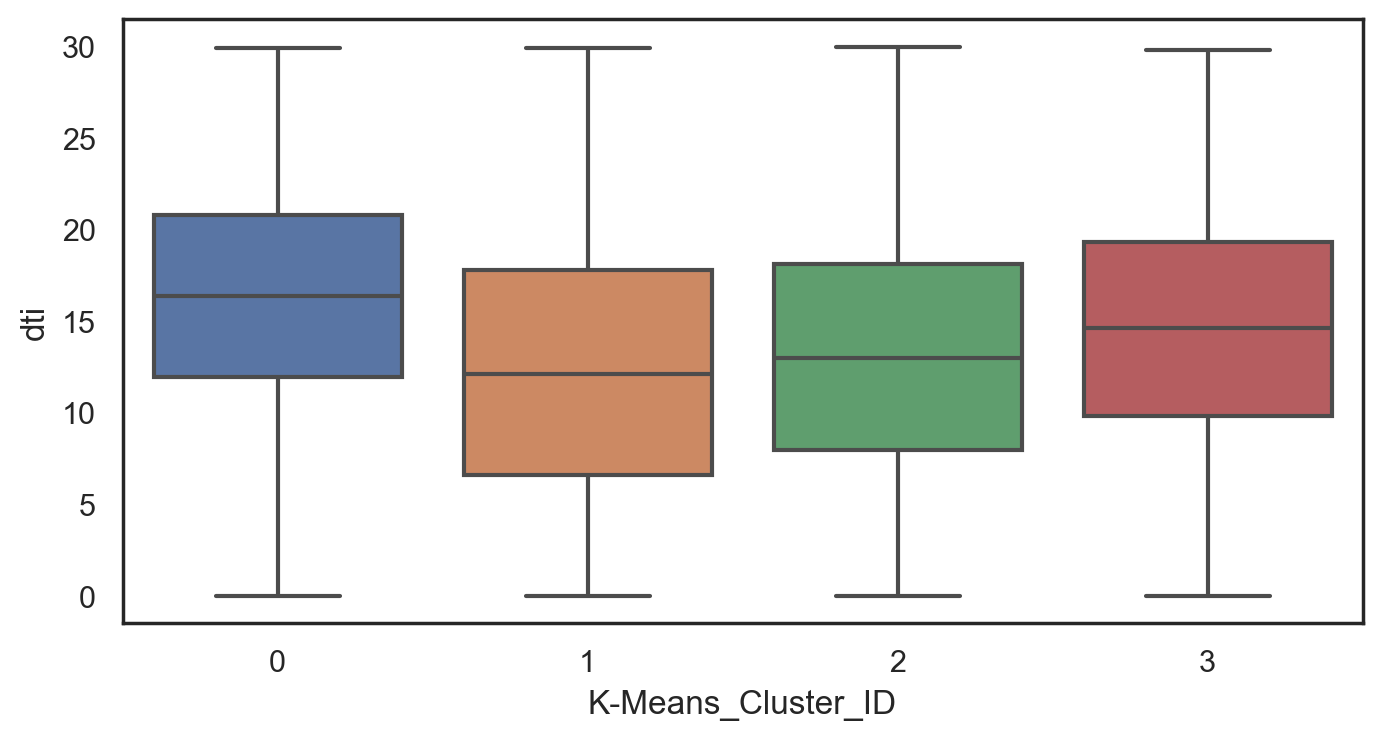

In [201]:
plt.figure(figsize=(8,4),dpi=200) 
sns.boxplot(x='K-Means_Cluster_ID', y='dti', data=df_model)

**Macierze do modelowania**

In [202]:
df_model.shape

(42536, 98)

In [203]:
X = df_model.drop('loan_status',axis=1)
y = df_model['loan_status']

In [204]:
# Implementacja oversamplingu by zbalansować klasy
smk = SMOTETomek(random_state=0)
X_res, y_res = smk.fit_sample(X, y)

In [205]:
print("Wielkość datasetu bazowego {}".format(Counter(y)))
print("Wielkość datasetu po oversamplingu {}".format(Counter(y_res)))

Wielkość datasetu bazowego Counter({1: 36105, 0: 6431})
Wielkość datasetu po oversamplingu Counter({1: 34271, 0: 34271})


In [206]:
# dzielę dane na testowe i treningowe(70/30) 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0)

In [207]:
# Feature scaling - skalowanie danych - sprowadzam atrybuty do wspólnej skali 
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
# tworzę dataframe do x_train, bo teraz był to wektor
X_train = pd.DataFrame(X_train, columns=[cols])

In [209]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [210]:
X_train.describe()

,dti,emp_length,funded_amnt,funded_amnt_inv,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_category_home_positive,credit_hist_length_Low,credit_hist_length_Medium,state_label_low,state_label_medium,K-Means_Cluster_ID
count,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,4.797900e+04,...,47979.0,47979.0,47979.0,47979.0,4.797900e+04,47979.0,4.797900e+04,47979.0,47979.0,4.797900e+04
mean,-1.872007e-17,-2.135963e-16,-2.269734e-16,-2.459758e-17,-1.518640e-16,1.488986e-16,-2.398437e-17,-2.277208e-16,3.481656e-16,1.601272e-16,...,0.0,0.0,0.0,0.0,-7.435410e-16,0.0,-1.568451e-15,0.0,0.0,-6.133103e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,0.0,0.0,0.0,0.0,1.000010e+00,0.0,1.000010e+00,0.0,0.0,1.000010e+00
min,-2.164801e+00,-1.491076e+00,-1.536950e+00,-1.524694e+00,-1.642819e+00,-2.119135e+00,-1.559365e+00,-2.090599e+00,-1.218887e+00,-1.925183e+00,...,0.0,0.0,0.0,0.0,-1.089350e+00,0.0,-1.065002e+00,0.0,0.0,-1.627819e+00
25%,-7.369482e-01,-8.870106e-01,-8.334903e-01,-7.535022e-01,-7.820708e-01,-6.447536e-01,-8.287201e-01,-7.971848e-01,-7.667688e-01,-7.658964e-01,...,0.0,0.0,0.0,0.0,-1.089350e+00,0.0,-1.065002e+00,0.0,0.0,-5.452614e-01
50%,3.280423e-02,-2.272472e-01,-1.506422e-01,-1.690937e-01,-1.446435e-01,2.209814e-02,-1.376235e-01,-6.072330e-02,-1.640642e-01,8.220684e-02,...,0.0,0.0,0.0,0.0,1.121898e-01,0.0,4.430313e-01,0.0,0.0,-5.452614e-01
75%,7.702298e-01,9.251869e-01,6.720018e-01,6.402656e-01,5.847020e-01,6.913980e-01,6.814231e-01,5.856392e-01,4.949317e-01,8.125695e-01,...,0.0,0.0,0.0,0.0,1.039840e+00,0.0,9.907919e-01,0.0,0.0,5.372966e-01
max,2.593122e+00,1.529253e+00,2.957124e+00,2.905640e+00,2.965411e+00,2.708964e+00,2.953118e+00,3.083057e+00,3.292585e+00,2.491949e+00,...,0.0,0.0,0.0,0.0,1.039840e+00,0.0,9.907919e-01,0.0,0.0,1.619854e+00


**Budowa klasyfikatorów**

In [211]:
# funkcja 'evaluate' przygotuje mi raport klasyfikacji
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    precision = result['1']['precision']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2),
                      'precision':round(precision,2)}
    return performance_data

**Decision Tree**

In [212]:
# jako pierwszy klasyfikator wybrałam drzewo decyzyjne
model1_name = 'Decision Tree'

In [213]:
# tworzę instancję klasy
dtree = DecisionTreeClassifier(random_state=1)

In [214]:
# dopasowuję cechy testowe i etykiety testowe
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [215]:
# do zmiennej przypisuję przewidywania
dt_prediction = dtree.predict(X_test)

In [216]:
confusion_matrix(y_test, dt_prediction)

array([[8859, 1494],
       [1774, 8436]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 17295
- liczba błędnych klasyfikacji 3268
- poziom błędu 16%

In [217]:
# przygotowuję raport klasyfikacji dla prawdziwych i przewidywanych etykiet
print(classification_report(y_test,dt_prediction))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     10353
           1       0.85      0.83      0.84     10210

    accuracy                           0.84     20563
   macro avg       0.84      0.84      0.84     20563
weighted avg       0.84      0.84      0.84     20563



{'f1-score': 0.84, 'accuracy': 0.84, 'precision': 0.85}

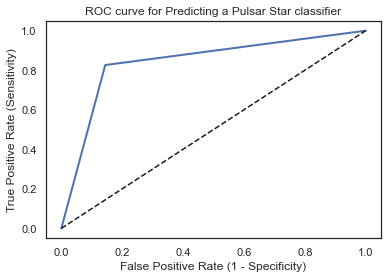

ROC AUC : 0.8410


In [218]:
# tworzę wykres krzywej ROC 
fpr, tpr, thresholds = roc_curve(y_test, dt_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

dt_auc = roc_auc_score(y_test, dt_prediction)
print('ROC AUC : {:.4f}'.format(dt_auc))

Krzywa ROC ilustruje związek miedzy czułością a specyficznością dla modelu. Punkt o współrzędnych (0,1) to punkt o czułości równej 1 (wszystkie obiekty wybranej klasy wykryto) i swoistości równej 1 (nie uznano błędnie żadnego obiektu za obiekt  wyróżnionej klasy).
AUC to pole pod wykresem krzywej ROC (ang. area under curve), traktowane jest jako miara dobroci i trafności modelu. Wartość  wskaźnika AUC przyjmuje wartości z przedziału [0,1]; im większa, tym lepszy model.

In [219]:
model1_summary = evaluate(y_test, dt_prediction)
model1_summary['model'] = model1_name
model1_summary['auroc'] = dt_auc
pd.DataFrame([model1_summary])

,f1-score,accuracy,precision,model,auroc
0,0.84,0.84,0.83,Decision Tree,0.840971


**Random Forest**

In [220]:
# drugim klasyfikatorem, ktory wybrałam jest las losowy (z liczbą drzew 100)
model2_name = 'Random Forest'
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [221]:
# do zmiennej przypisuję prognozy
rf_prediction = rf.predict(X_test)

In [222]:
confusion_matrix(y_test, rf_prediction)

array([[ 8652,  1701],
       [   88, 10122]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 18764
- liczba błędnych klasyfikacji 1799
- poziom błędu 9%

In [223]:
# tworzę raport klasyfikacyjny dla zbioru testowego
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10353
           1       0.86      0.99      0.92     10210

    accuracy                           0.91     20563
   macro avg       0.92      0.91      0.91     20563
weighted avg       0.92      0.91      0.91     20563

{'f1-score': 0.92, 'accuracy': 0.91, 'precision': 0.86}


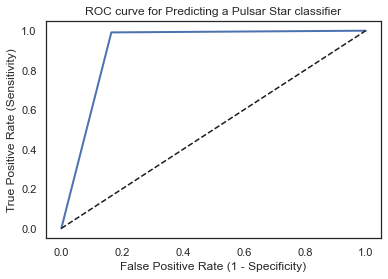

ROC AUC : 0.9135


In [224]:
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

rf_auc = roc_auc_score(y_test, rf_prediction)
print('ROC AUC : {:.4f}'.format(rf_auc))

In [225]:
model2_summary = evaluate(y_test, rf_prediction)
model2_summary['model'] = model2_name
model2_summary['auroc'] = rf_auc
pd.DataFrame([model2_summary])

,f1-score,accuracy,precision,model,auroc
0,0.92,0.91,0.99,Random Forest,0.91354


**K Nearest Neighbors (KNN)**

In [226]:
# kolejnym klasyfikatorej jaki wybrałam jest K najbliższych sąsiadów, z paramterem k = 5
model3_name = 'K Nearest Neighbors'
knn = KNeighborsClassifier(n_neighbors=5)

In [227]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [228]:
knn_prediction = knn.predict(X_test)

In [229]:
confusion_matrix(y_test, knn_prediction)

array([[9717,  636],
       [3760, 6450]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 16167
- liczba błędnych klasyfikacji 4396
- poziom błędu 21%

In [230]:
print(classification_report(knn_prediction,y_test))
knn_pr = evaluate(knn_prediction,y_test)
knn_pr

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     13477
           1       0.63      0.91      0.75      7086

    accuracy                           0.79     20563
   macro avg       0.79      0.82      0.78     20563
weighted avg       0.83      0.79      0.79     20563



{'f1-score': 0.75, 'accuracy': 0.79, 'precision': 0.91}

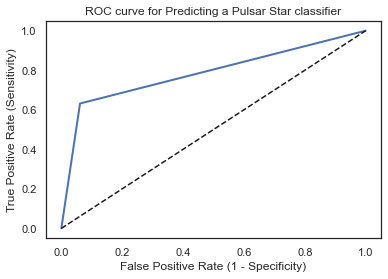

ROC AUC : 0.7852


In [231]:
fpr, tpr, thresholds = roc_curve(y_test, knn_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

knn_auc = roc_auc_score(y_test, knn_prediction)
print('ROC AUC : {:.4f}'.format(knn_auc))

In [232]:
model3_summary = evaluate(y_test, knn_prediction)
model3_summary['model'] = model3_name
model3_summary['auroc'] = knn_auc
pd.DataFrame([model3_summary])

,f1-score,accuracy,precision,model,auroc
0,0.75,0.79,0.63,K Nearest Neighbors,0.785151


**Logistic Regression**

In [233]:
# czwartym klasyfikatorem jaki wybrałam jest regresja logistyczna
model4_name = 'Logistic Regression'
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [234]:
log_reg.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1], dtype=int8)

In [235]:
log_reg.predict_proba(X_test)

array([[0.27095247, 0.72904753],
       [0.50281831, 0.49718169],
       [0.79581509, 0.20418491],
       ...,
       [0.28105   , 0.71895   ],
       [0.495702  , 0.504298  ],
       [0.38721452, 0.61278548]])

In [236]:
y_pred = log_reg.predict(X_test)

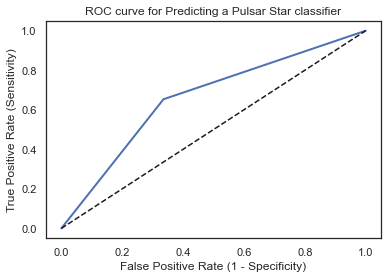

ROC AUC : 0.6588


In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

lr_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(lr_auc))

In [238]:
confusion_matrix(y_test, y_pred)

array([[6879, 3474],
       [3542, 6668]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 13547
- liczba błędnych klasyfikacji 7016
- poziom błędu 34%

In [239]:
print(classification_report(y_test,y_pred))
lg_pr = evaluate(y_pred,y_test)
print(lg_pr)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     10353
           1       0.66      0.65      0.66     10210

    accuracy                           0.66     20563
   macro avg       0.66      0.66      0.66     20563
weighted avg       0.66      0.66      0.66     20563

{'f1-score': 0.66, 'accuracy': 0.66, 'precision': 0.66}


In [240]:
model4_summary = evaluate(y_test, y_pred)
model4_summary['model'] = model4_name
model4_summary['auroc'] = lr_auc
pd.DataFrame([model4_summary])

,f1-score,accuracy,precision,model,auroc
0,0.66,0.66,0.65,Logistic Regression,0.658765


**AdaBoost**

In [241]:
# ostatnim modelem jaki wybrałam jest AdaBoost
model5_name = 'AdaBoost'
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [242]:
ab_prediction = ab.predict(X_test)

In [243]:
confusion_matrix(y_test, ab_prediction)

array([[ 8292,  2061],
       [   62, 10148]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 18440
- liczba błędnych klasyfikacji 2123
- poziom błędu 10%

In [244]:
print(classification_report(y_test,ab_prediction))

ab_pr= evaluate(ab_prediction,y_test)
ab_pr

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     10353
           1       0.83      0.99      0.91     10210

    accuracy                           0.90     20563
   macro avg       0.91      0.90      0.90     20563
weighted avg       0.91      0.90      0.90     20563



{'f1-score': 0.91, 'accuracy': 0.9, 'precision': 0.83}

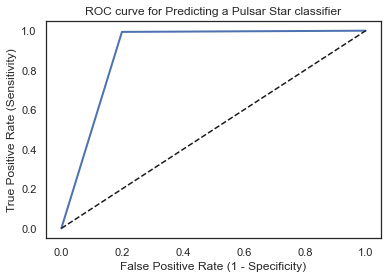

ROC AUC : 0.8974


In [245]:
fpr, tpr, thresholds = roc_curve(y_test, ab_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ab_auc = roc_auc_score(y_test, ab_prediction)
print('ROC AUC : {:.4f}'.format(ab_auc))

In [246]:
model5_summary = evaluate(y_test, ab_prediction)
model5_summary['model'] = model5_name
model5_summary['auroc'] = ab_auc
pd.DataFrame([model5_summary])

,f1-score,accuracy,precision,model,auroc
0,0.91,0.9,0.99,AdaBoost,0.897427


In [247]:
# tworzę obiekt, który pokaże mi wyniki jakie uzyskałam w wybranych przeze mnie klasyfikatorach
prediction_data={'Model':['Decision Tree',
                          'Random Forest',
                          'KNN',
                          'Logistic Regression',
                          'AdaBoost'
                         ],
                   'F1-score':[dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              knn_pr['f1-score'],
                              lg_pr['f1-score'],
                              ab_pr['f1-score']],
                 
                   'Precision':[dtree_pr['precision'],
                              rf_pr['precision'],
                              knn_pr['precision'],
                              lg_pr['precision'],
                              ab_pr['precision']],
                 
                   'Accuracy':[dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              knn_pr['accuracy'],
                              lg_pr['accuracy'],
                              ab_pr['accuracy']],
                 
                   'AUROC': [model1_summary['auroc'],
                             model2_summary['auroc'],
                             model3_summary['auroc'],
                             model4_summary['auroc'],
                             model5_summary['auroc']]
                    }
 

prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Precision,Accuracy,AUROC
0,Decision Tree,0.84,0.85,0.84,0.840971
1,Random Forest,0.92,0.86,0.91,0.913540
2,KNN,0.75,0.91,0.79,0.785151
3,Logistic Regression,0.66,0.66,0.66,0.658765
4,AdaBoost,0.91,0.83,0.90,0.897427


**PCA**

In [248]:
pca_test = PCA(random_state=42)
pca_test.fit(X_train)

PCA(random_state=42)

In [249]:
#sprawdzam głowne składowe- komponenty
pca_test.components_[0]

array([ 8.27965760e-02,  1.31438034e-01,  3.76876933e-01,  3.59087343e-01,
        3.43676948e-01,  1.47849163e-01,  3.71473493e-01,  1.57644536e-01,
        1.92682729e-01,  6.93618128e-02, -2.42170902e-03,  1.29029103e-01,
        1.81033460e-01,  2.00253493e-01,  8.07793567e-28,  3.12139218e-02,
        2.45116827e-02,  2.35123559e-01,  1.62282483e-01,  3.45530429e-02,
        5.14717788e-02,  5.35602026e-02,  4.90396618e-02,  3.80924106e-33,
       -6.72290988e-33, -6.68209991e-34, -1.49177009e-01, -2.40932605e-34,
        2.06644859e-01,  0.00000000e+00,  1.00321903e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [250]:
# ta metoda pokazuje w jakim stopniu każdy z komponentów wyjaśnia wariancje danych
pca_test.explained_variance_ratio_

array([2.04278015e-01, 1.34587698e-01, 9.45308999e-02, 8.84505727e-02,
       5.95180265e-02, 4.55882421e-02, 4.04616828e-02, 3.68117412e-02,
       3.57494585e-02, 3.20666902e-02, 3.08826274e-02, 2.86534273e-02,
       2.72465648e-02, 2.64613764e-02, 2.18198286e-02, 1.64238843e-02,
       1.46932328e-02, 1.23324041e-02, 1.15782334e-02, 1.01346475e-02,
       7.55047831e-03, 6.05514710e-03, 4.67138208e-03, 3.63293492e-03,
       2.41569981e-03, 2.11464267e-03, 1.02730137e-03, 2.63160445e-04,
       1.36807797e-32, 6.15306870e-33, 2.46708820e-33, 9.35726567e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
       9.20638549e-34, 9.20638549e-34, 9.20638549e-34, 9.20638549e-34,
      

In [251]:
# pozbywam się szumu
var_cumu = np.cumsum(pca_test.explained_variance_ratio_)
var_cumu

array([0.20427802, 0.33886571, 0.43339661, 0.52184719, 0.58136521,
       0.62695345, 0.66741514, 0.70422688, 0.73997634, 0.77204303,
       0.80292565, 0.83157908, 0.85882565, 0.88528702, 0.90710685,
       0.92353074, 0.93822397, 0.95055637, 0.96213461, 0.97226925,
       0.97981973, 0.98587488, 0.99054626, 0.9941792 , 0.9965949 ,
       0.99870954, 0.99973684, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

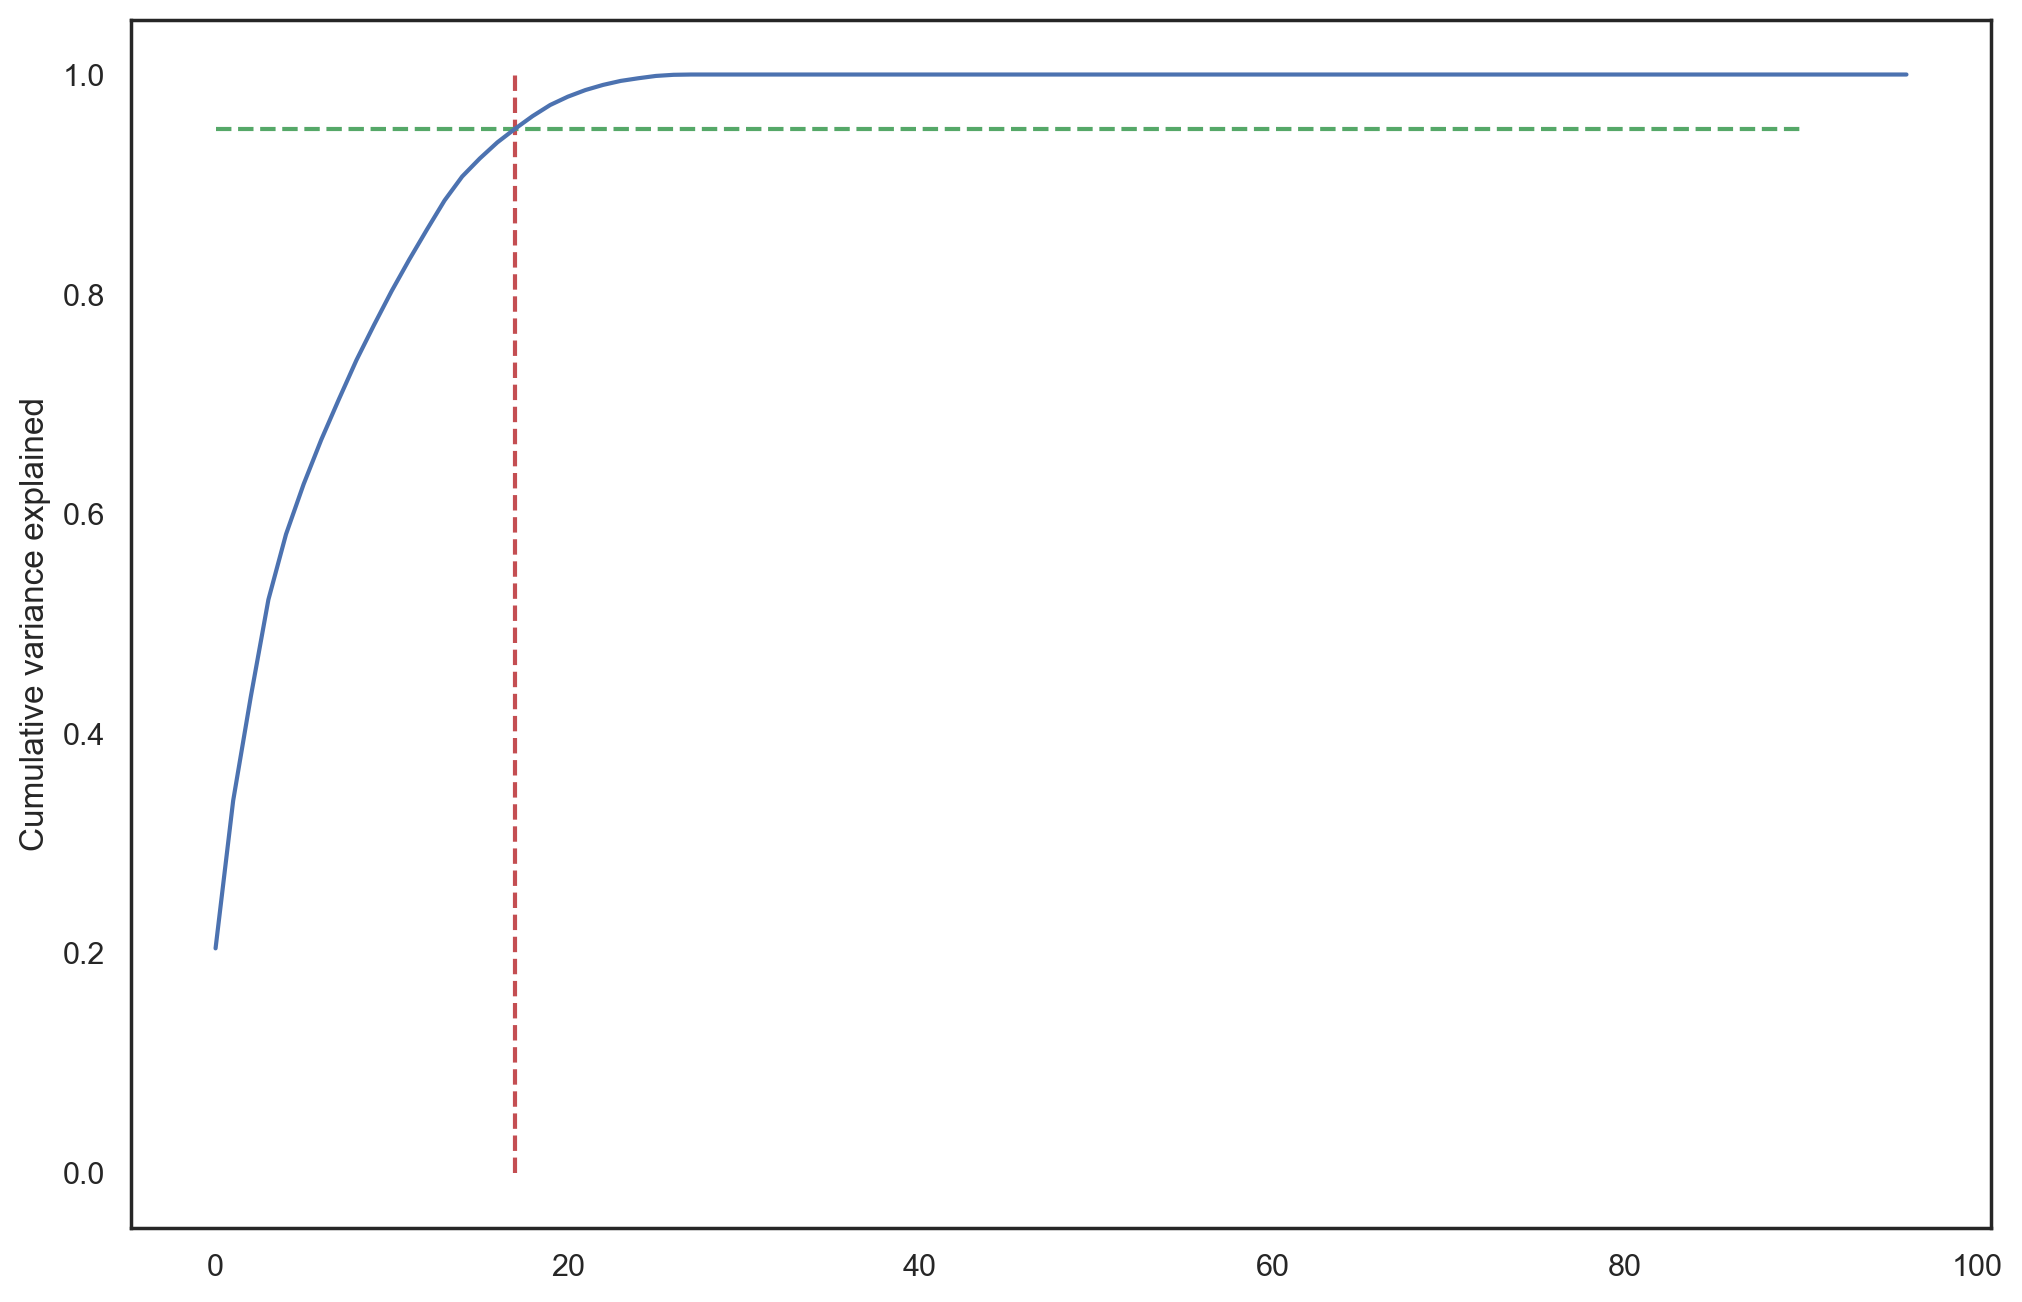

In [252]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [253]:
pca = PCA(n_components=17)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

**Modelowanie po PCA**

In [254]:
def evaluate(prediction,y_pca_test): 
    result_pca = classification_report(y_pca_test,prediction,output_dict=True)
    f1 = result_pca['1']['f1-score']
    accuracy = result_pca['accuracy']
    precision = result_pca['1']['precision']
    performance_data_pca= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2),
                      'precision':round(precision,2)}
    return performance_data_pca

**Decision Tree - PCA**

In [255]:
pca_model1_name = 'Decision Tree PCA'

In [256]:
pca_dtree = DecisionTreeClassifier(random_state=1)

In [257]:
pca_dtree.fit(X_pca_train,y_train)

DecisionTreeClassifier(random_state=1)

In [258]:
pca_dt_prediction = pca_dtree.predict(X_pca_test)

In [259]:
confusion_matrix(y_test, pca_dt_prediction)

array([[7766, 2587],
       [3265, 6945]], dtype=int64)

In [260]:
print(classification_report(y_test,pca_dt_prediction))

pca_dtree_pr= evaluate(pca_dt_prediction,y_test)
pca_dtree_pr

              precision    recall  f1-score   support

           0       0.70      0.75      0.73     10353
           1       0.73      0.68      0.70     10210

    accuracy                           0.72     20563
   macro avg       0.72      0.72      0.71     20563
weighted avg       0.72      0.72      0.72     20563



{'f1-score': 0.7, 'accuracy': 0.72, 'precision': 0.73}

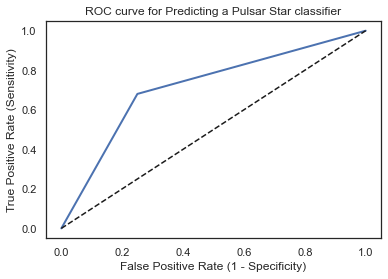

ROC AUC : 0.7152


In [261]:
fpr, tpr, thresholds = roc_curve(y_test, pca_dt_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

pca_dt_auc = roc_auc_score(y_test, pca_dt_prediction)
print('ROC AUC : {:.4f}'.format(pca_dt_auc))

In [262]:
pca_model1_summary = evaluate(y_test, pca_dt_prediction)
pca_model1_summary['model'] = pca_model1_name
pca_model1_summary['auroc'] = pca_dt_auc
pd.DataFrame([pca_model1_summary] + [model1_summary])

,f1-score,accuracy,precision,model,auroc
0,0.70,0.72,0.68,Decision Tree PCA,0.715168
1,0.84,0.84,0.83,Decision Tree,0.840971


**Random forest - PCA**

In [263]:
pca_model2_name = 'Random Forest PCA'
pca_rf = RandomForestClassifier(n_estimators=100)
pca_rf.fit(X_pca_train, y_train)

RandomForestClassifier()

In [264]:
pca_rf_prediction = pca_rf.predict(X_pca_test)

In [265]:
confusion_matrix(y_test, pca_rf_prediction)

array([[9085, 1268],
       [1915, 8295]], dtype=int64)

In [266]:
print(classification_report(y_test,pca_rf_prediction))
pca_rf_pr = evaluate(pca_rf_prediction,y_test)
print(pca_rf_pr)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10353
           1       0.87      0.81      0.84     10210

    accuracy                           0.85     20563
   macro avg       0.85      0.84      0.84     20563
weighted avg       0.85      0.85      0.85     20563

{'f1-score': 0.84, 'accuracy': 0.85, 'precision': 0.87}


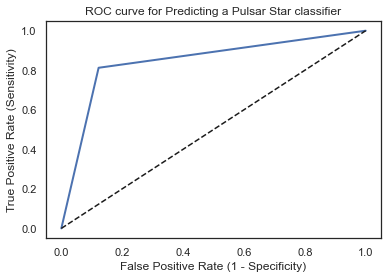

ROC AUC : 0.8450


In [267]:
fpr, tpr, thresholds = roc_curve(y_test, pca_rf_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

pca_rf_auc = roc_auc_score(y_test, pca_rf_prediction)
print('ROC AUC : {:.4f}'.format(pca_rf_auc))

In [268]:
pca_model2_summary = evaluate(y_test, pca_rf_prediction)
pca_model2_summary['model'] = pca_model2_name
pca_model2_summary['auroc'] = pca_rf_auc
pd.DataFrame([pca_model2_summary] + [model2_summary])

,f1-score,accuracy,precision,model,auroc
0,0.84,0.85,0.81,Random Forest PCA,0.844981
1,0.92,0.91,0.99,Random Forest,0.913540


**K Nearest Neighbors (KNN) - PCA**

In [269]:
pca_model3_name = 'K Nearest Neighbors PCA'
pca_knn = KNeighborsClassifier(n_neighbors=5)

In [270]:
pca_knn.fit(X_pca_train,y_train) 

KNeighborsClassifier()

In [271]:
pca_knn_prediction = pca_knn.predict(X_pca_test)

In [272]:
confusion_matrix(y_test, pca_knn_prediction)

array([[9587,  766],
       [3697, 6513]], dtype=int64)

In [273]:
print(classification_report(pca_knn_prediction,y_test))
pca_knn_pr = evaluate(pca_knn_prediction,y_test)
pca_knn_pr

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     13284
           1       0.64      0.89      0.74      7279

    accuracy                           0.78     20563
   macro avg       0.78      0.81      0.78     20563
weighted avg       0.82      0.78      0.79     20563



{'f1-score': 0.74, 'accuracy': 0.78, 'precision': 0.89}

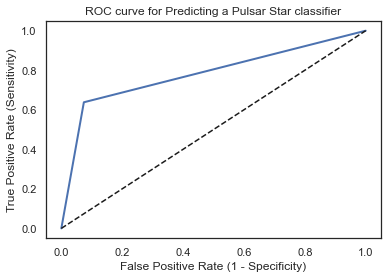

ROC AUC : 0.7820


In [274]:
fpr, tpr, thresholds = roc_curve(y_test, pca_knn_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

pca_knn_auc = roc_auc_score(y_test, pca_knn_prediction)
print('ROC AUC : {:.4f}'.format(pca_knn_auc))

In [275]:
pca_model3_summary = evaluate(y_test, pca_knn_prediction)
pca_model3_summary['model'] = pca_model3_name
pca_model3_summary['auroc'] = pca_knn_auc
pd.DataFrame([pca_model3_summary] + [model3_summary])

,f1-score,accuracy,precision,model,auroc
0,0.74,0.78,0.64,K Nearest Neighbors PCA,0.781958
1,0.75,0.79,0.63,K Nearest Neighbors,0.785151


**Logistic Regression - PCA**

In [276]:
pca_model4_name = 'Logistic Regression PCA'
pca_log_reg = LogisticRegression(random_state=1)
pca_log_reg.fit(X_pca_train, y_train)

LogisticRegression(random_state=1)

In [277]:
pca_log_reg.predict(X_pca_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int8)

In [278]:
pca_log_reg.predict_proba(X_pca_test)

array([[0.30581071, 0.69418929],
       [0.32364306, 0.67635694],
       [0.80627621, 0.19372379],
       ...,
       [0.29479715, 0.70520285],
       [0.56493526, 0.43506474],
       [0.37639132, 0.62360868]])

In [279]:
pca_y_pred = pca_log_reg.predict(X_pca_test)
confusion_matrix(y_test, pca_y_pred)

array([[6713, 3640],
       [3519, 6691]], dtype=int64)

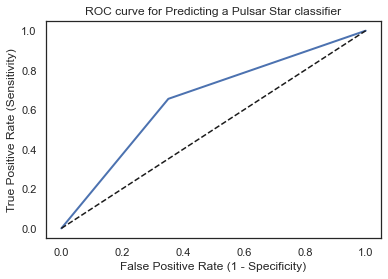

ROC AUC : 0.6519


In [280]:
fpr, tpr, thresholds = roc_curve(y_test, pca_y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

pca_lr_auc = roc_auc_score(y_test, pca_y_pred)
print('ROC AUC : {:.4f}'.format(pca_lr_auc))

In [281]:
print(classification_report(y_test,pca_y_pred))
pca_lg_pr = evaluate(pca_y_pred,y_test)
print(pca_lg_pr)

              precision    recall  f1-score   support

           0       0.66      0.65      0.65     10353
           1       0.65      0.66      0.65     10210

    accuracy                           0.65     20563
   macro avg       0.65      0.65      0.65     20563
weighted avg       0.65      0.65      0.65     20563

{'f1-score': 0.65, 'accuracy': 0.65, 'precision': 0.65}


In [282]:
pca_model4_summary = evaluate(y_test, pca_y_pred)
pca_model4_summary['model'] = pca_model4_name
pca_model4_summary['auroc'] = pca_lr_auc
pd.DataFrame([pca_model4_summary] + [model4_summary])

,f1-score,accuracy,precision,model,auroc
0,0.65,0.65,0.66,Logistic Regression PCA,0.651874
1,0.66,0.66,0.65,Logistic Regression,0.658765


**AdaBoost - PCA**

In [283]:
pca_model5_name = 'AdaBoost PCA'
pca_ab = AdaBoostClassifier(random_state=1)
pca_ab.fit(X_pca_train, y_train)

AdaBoostClassifier(random_state=1)

In [284]:
pca_ab_prediction = pca_ab.predict(X_pca_test)

In [285]:
confusion_matrix(y_test, pca_ab_prediction)

array([[7561, 2792],
       [3490, 6720]], dtype=int64)

In [286]:
print(classification_report(y_test,pca_ab_prediction))

pca_ab_pr= evaluate(pca_ab_prediction,y_test)
pca_ab_pr

              precision    recall  f1-score   support

           0       0.68      0.73      0.71     10353
           1       0.71      0.66      0.68     10210

    accuracy                           0.69     20563
   macro avg       0.70      0.69      0.69     20563
weighted avg       0.70      0.69      0.69     20563



{'f1-score': 0.68, 'accuracy': 0.69, 'precision': 0.71}

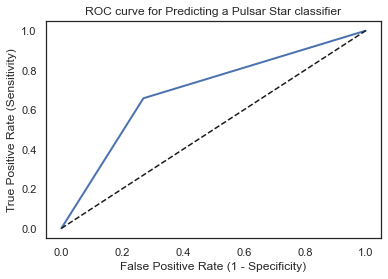

ROC AUC : 0.6942


In [287]:
fpr, tpr, thresholds = roc_curve(y_test, pca_ab_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

pca_ab_auc = roc_auc_score(y_test, pca_ab_prediction )
print('ROC AUC : {:.4f}'.format(pca_ab_auc))

In [288]:
pca_model5_summary = evaluate(y_test, pca_ab_prediction)
pca_model5_summary['model'] = pca_model5_name
pca_model5_summary['auroc'] = pca_ab_auc
pd.DataFrame([pca_model5_summary] + [model5_summary])

,f1-score,accuracy,precision,model,auroc
0,0.68,0.69,0.66,AdaBoost PCA,0.694249
1,0.91,0.90,0.99,AdaBoost,0.897427


Skuteczność i AUROC modeli po PCA pogorszyła się, w różnym stopniu w zależności od modelu.

**Budowa ostatecznego modelu**

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [290]:
df_model.shape

(42536, 98)

In [291]:
X_fin = df_model.drop('loan_status',axis=1)
y_fin = df_model['loan_status']

In [292]:
# Implementuję oversampling by zbalansować klasy
smk = SMOTETomek(random_state=0)
X_res2, y_res2 = smk.fit_sample(X_fin, y_fin)

In [293]:
print("Wielkość datasetu bazowego {}".format(Counter(y_fin)))
print("Wielkość datasetu po oversamplingu {}".format(Counter(y_res2)))

Wielkość datasetu bazowego Counter({1: 36105, 0: 6431})
Wielkość datasetu po oversamplingu Counter({1: 34271, 0: 34271})


In [294]:
# przeprowadzam kroswalidację
scaler = StandardScaler()
rfc = RandomForestClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', rfc)])
cv = KFold(n_splits=5, shuffle = True, random_state=0)
scores = cross_val_score(pipeline, X_res2, y_res2, cv = cv)

In [295]:
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
print('Accuracies from each of the 5 folds using kfold:',scores)
print("Variance of kfold accuracies:",scores.var())

Accuracy: Final mean:91.308%, Final standard deviation:(0.219%)
Accuracies from each of the 5 folds using kfold: [0.91472755 0.90940258 0.91194923 0.91377298 0.91552378]
Variance of kfold accuracies: 4.793730008132727e-06


In [296]:
# model będę budować na danych podzielonych przez split 70/30
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_res2, y_res2, test_size=0.30, random_state=0)

In [297]:
scaler = StandardScaler()
classifier = RandomForestClassifier()
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

In [298]:
# tworzę siatkę parametrów
grid_param = [{      "n_estimators": [20, 50, 100],
                     "min_samples_split": [2, 5, 20, 50],
                     "max_depth": [3, 10, None]
               },
               {     "bootstrap": [False, True],
                     "n_estimators": [10, 100, 300, 500, 1000],
                     "min_samples_leaf": [1, 3, 5],
                     "max_features": ["auto", "sqrt"]
              }]

In [299]:
# GridSearch pomoże mi ustalić najlepsze parametry do budowy modelu
grid_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=5,
                     n_jobs=-1)

In [300]:
# grid_sr.fit(X_train_rf, y_train_rf) #zakomentowany bo b.długo się robi

In [301]:
# print(" Results from Grid Search " ) 
# print("\n The best estimator across ALL searched params:\n",
#       grid_sr.best_estimator_)
# print("\n The best score across ALL searched params:\n",
#       grid_sr.best_score_)
# print("\n The best parameters across ALL searched params:\n",
#       grid_sr.best_params_)

In [302]:
model_name = 'Random forest'
rf_fin = RandomForestClassifier(bootstrap= False, max_features= 'auto', min_samples_leaf= 1, n_estimators= 1000) #parametry z gridsearch
rf_fin.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=False, n_estimators=1000)

In [303]:
rf_fin_prediction = rf_fin.predict(X_test_rf)

In [304]:
print(classification_report(y_test_rf,rf_fin_prediction))
rf_fin_pr = evaluate(rf_fin_prediction,y_test_rf)
print(rf_fin_pr)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10353
           1       0.86      0.99      0.92     10210

    accuracy                           0.91     20563
   macro avg       0.93      0.92      0.91     20563
weighted avg       0.93      0.91      0.91     20563

{'f1-score': 0.92, 'accuracy': 0.91, 'precision': 0.86}


In [305]:
confusion_matrix(y_test_rf, rf_fin_prediction)

array([[ 8661,  1692],
       [   57, 10153]], dtype=int64)

- liczba pożyczkobiorców 20563 (baza, na której dokonano oceny)
- liczba poprawnych klasyfikacji 18803
- liczba błędnych klasyfikacji 1760
- poziom błędu 9%

(0.0, 2.0, 2.0, 0.0)

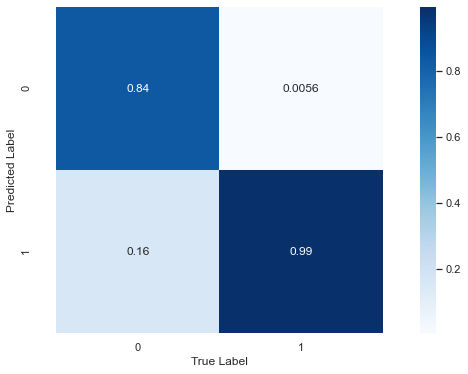

In [306]:
rf_fin_prediction = rf_fin.predict(X_test_rf)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test_rf, rf_fin_prediction).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

- True-Positive: przewidywanie pozytywne, faktycznie zaobserwowana klasa pozytywna, wynik 99%
- True-Negative: przewidywanie negatywne, faktycznie zaobserwowana klasa negatywna, wynik 84%
- False-Positive: przewidywanie pozytywne, faktycznie zaobserwowana klasa negatywna, wynik 16%
- False-Negative: przewidywanie negatywne, faktycznie zaobserwowana klasa pozytywna, wynik 0%

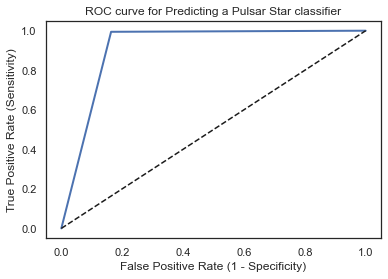

ROC AUC : 0.9155


In [307]:
fpr, tpr, thresholds = roc_curve(y_test_rf, rf_fin_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test_rf, rf_fin_prediction)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [308]:
model_fin_summary = evaluate(y_test_rf, rf_fin_prediction)
model_fin_summary['model'] = model_name
model_fin_summary['auroc'] = ROC_AUC
pd.DataFrame([model_fin_summary])

,f1-score,accuracy,precision,model,auroc
0,0.92,0.91,0.99,Random forest,0.915493


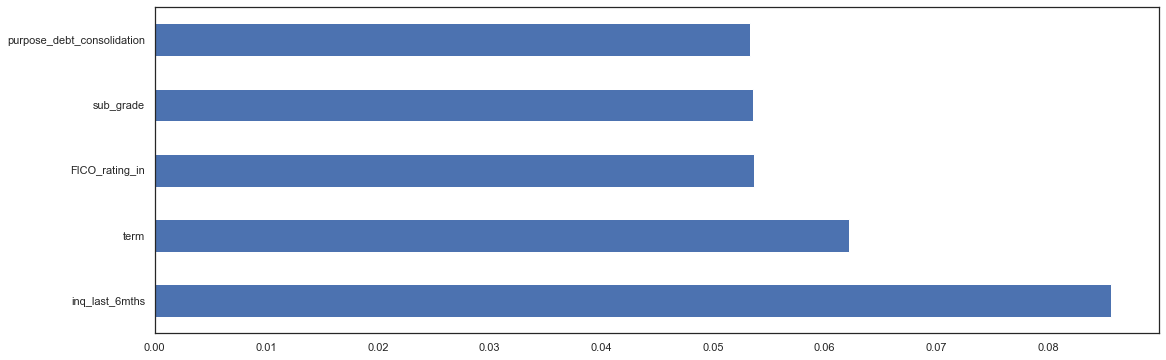

In [309]:
# sprawdzam istotność cech wykorzystanych do modelowania
feat_importances = pd.Series(rf_fin.feature_importances_, index=X_fin.columns)
feat_importances.nlargest(5).plot(kind='barh')

# Wnioski

Celem tego projektu było zbadanie, przeanalizowanie i zbudowanie algorytmu uczenia maszynowego w celu prawidłowego określenia, czy dana osoba, przy określonych cechach, ma wysokie prawdopodobieństwo spłacenia lub niespłacenia pożyczki. Ten typ modelu mógłby zostać wykorzystany przez LendingClub do zidentyfikowania pewnych cech finansowych przyszłych pożyczkobiorców, którzy mogą potencjalnie spłacić pożyczki lub nie spłacić zaciągnięte pożyczki.
Przeszkolone zostało pięć różnych modeli (drzewo decyzyjne, losowy las i k-najbliższych sąsiadów, regresja logistyczna, adaboost), nie wszystkie działały podobnie. Najsłabszy wynik otrzymała regresja logistyczna, natomiast do budowy ostatecznego modelu został wybrany las losowy z najwyższym wynikiem AUROC 0,91.

Najlepszymi metrykami oceny dla modelu była roc_auc_score, a także macierz pomyłki. Krzywe charakterystyki operacyjnej odbiornika (ROC) i wartości AUC są często używane do oceny binarnych modeli klasyfikacyjnych. AUC nie jest bezpośrednio porównywalne z dokładnością, precyzją, recall, czy F1-score. Patrząc na macierz pomyłek, prawdziwy dodatni wskaźnik wynosi 84%, a prawdziwie ujemny współczynnik to 99%. Wskaźnik fałszywie ujemny, to wskaźnik, który przewiduje, czy pożyczkobiorca nie będzie spłacał kredytu, podczas gdy w rzeczywistości to zrobi, jest zminimalizowany do 16%.

Zgodnie z wykresem istotności cech najważniejszymi zmiennymi służącymi do przewidywania spłaty są liczba innych zapytań kredytowych wszczętych w ciągu ostatnich sześciu miesięcy i czas spłaty pożyczki, a także wynik FICO pożyczkobiorcy i rating kredytowy. 
W okresie 2007-2011 najwięcej pożyczek udzielonych było na konsolidację zadłużenia. Większość tych pożyczek zaciągnięta była na 36 miesięcy. Z tego samego powodu zaciągniętych było najwięcej pożyczek z terminem 60 m-cy. Należy wziąć pod uwagę, że pożyczki z pięcioletnimi okresami są prawie dwukrotnie bardziej narażone na niespłacenie niż pożyczki z trzyletnimi okresami.  
Istotność tych wskazanych cech potwierdza też to, że Lending Club swój model oceny ryzyka opiera na ratingu kredytowym, który jest wypadkową formuły uwzględniającej nie tylko zdolność kredytową, ale także kombinację kilku wskaźników ryzyka kredytowego z raportu kredytowego i wniosku kredytowego. Jeśli wniosek spełnia wstępne kryteria oceny zdolności kredytowej, cechy wniosku są oceniane przez modele punktacji Lending Club, które mogą odrzucić lub zatwierdzić wnioskodawcę.

Przygotowany w tym projekcie model może dostarczyć nieco przemyślanej prognozy prawdopodobieństwa spłaty pożyczki, wykorzystując jedynie dane dostępne potencjalnym inwestorom przed całkowitym sfinansowaniem pożyczki.